In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [17]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' # ÏòàÏãú: ÎßëÏùÄ Í≥†ÎîïÏúºÎ°ú ÏÑ§Ï†ï (Windows ÌôòÍ≤Ω Ïãú)
plt.rcParams['axes.unicode_minus'] = False

In [8]:
data = pd.read_csv("C:/Í±¥Í∞ïÍ≤ÄÏßÑ/health_checkup/JDM/2012ÎÖÑ~2023ÎÖÑ/Í±¥Í∞ïÏ°∞ÏÇ¨_2012~2022_ÌÜµÌï©.csv") # ÎãπÎá® ÏπòÎ£å

Í≥†ÌòàÏïïÏù∏Îç∞ Í≥†ÌòàÏïï Í¥ÄÎ¶¨ Ïïà Ìïú ÏÇ¨Îûå ÌäπÏßï ÌôïÏù∏

In [16]:
# Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ ÎòêÎäî Í≥†ÌòàÏïïÏù¥Î©¥ÏÑú ÏπòÎ£å Ïïà Ìïú ÏÇ¨ÎûåÎßå ÎÇ®ÍπÄ
data = data[(data['HE_HP'].isin([3, 4])) & (data['DI1_pt'] == 0)]

In [ ]:
# Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ ÎòêÎäî Í≥†ÌòàÏïïÏù¥Î©¥ÏÑú ÏπòÎ£å Ïïà Ìïú ÏÇ¨ÎûåÎßå ÎÇ®ÍπÄ
#data = data[(data['HE_DM_HbA1c'].isin([2, 3])) & (data['DE1_3'] == 2)]

In [10]:
data.info

<bound method DataFrame.info of                 mod_d             id       ID_fam    year  region  town_t  \
117     b'2022.03.08'  b'A110963502'  b'A1109635'  2012.0     1.0     1.0   
124     b'2022.03.08'  b'A110967702'  b'A1109677'  2012.0     1.0     1.0   
239     b'2022.03.08'  b'A112980901'  b'A1129809'  2012.0     1.0     1.0   
358     b'2022.03.08'  b'A115980303'  b'A1159803'  2012.0     1.0     1.0   
406     b'2022.03.08'  b'A117966901'  b'A1179669'  2012.0     1.0     1.0   
...               ...            ...          ...     ...     ...     ...   
83849  b'2024.01.11.'            NaN  b'YP015742'  2022.0    17.0     2.0   
83867  b'2024.01.11.'            NaN  b'YP132325'  2022.0    17.0     1.0   
83965  b'2024.01.11.'            NaN  b'YP384225'  2022.0    17.0     1.0   
84004  b'2024.01.11.'            NaN  b'YR133942'  2022.0     8.0     2.0   
84031  b'2024.01.11.'            NaN  b'YR137036'  2022.0     8.0     2.0   

       apt_t      psu  sex   age  age_month

In [17]:
import pandas as pd

# ÎÇ®Í∏∞Í≥† Ïã∂ÏùÄ Ïª¨Îüº Î¶¨Ïä§Ìä∏
columns_to_keep = [
    'ID','year','age','sex','HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt',
    # 'L_OUT_FQ', 
    # 'BP1','BD1_11', 'BS3_2', 'BE5_1', 
    'HE_obe', 'HE_HP', 'HE_DM_HbA1c',
    'DE1_dg', 'DI1_dg',
    'DI1_pt'
]

# ÏõêÎûò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ dfÏùº Îïå
data = data[columns_to_keep]


In [18]:
def iqr_clip(series, lower_quantile=0.25, upper_quantile=0.75, clip_range=1.5):
    q1 = series.quantile(lower_quantile)
    q3 = series.quantile(upper_quantile)
    iqr = q3 - q1
    lower_bound = q1 - clip_range * iqr
    upper_bound = q3 + clip_range * iqr
    return series.clip(lower=lower_bound, upper=upper_bound)

# Ï†ÅÏö©
data['HE_glu'] = iqr_clip(data['HE_glu'])
data['HE_alt'] = iqr_clip(data['HE_alt'])

In [20]:
# HE_DM_HbA1c
if 'HE_DM_HbA1c' in data.columns:
    data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'DE1_dg' in data.columns:
        print(f"DE1_dg missing ratio: {data['DE1_dg'].isnull().mean()}")
        data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].fillna(data['DE1_dg'].map({0: 1, 1: 3}))
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_DM_HbA1c'].isnull().any():
        data = data[data['HE_DM_HbA1c'].notnull()]
    print(f"HE_DM_HbA1c NaN count after: {data['HE_DM_HbA1c'].isnull().sum()}")

# HE_obe
if 'HE_obe' in data.columns:
    data['HE_obe'] = data['HE_obe'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'HE_BMI' in data.columns:
        # BMIÍ∞Ä KNN ÎåÄÏ≤¥Îêú Í≤ΩÏö∞ ÌëúÏãú
        data['HE_BMI_imputed'] = data['HE_BMI'].isnull().astype(int)
        data['HE_obe'] = data.apply(
            lambda row: row['HE_obe'] if pd.notna(row['HE_obe']) else (
                1 if row['HE_BMI'] < 18.5 else
                2 if row['HE_BMI'] < 25 else
                3 if row['HE_BMI'] < 30 else
                4 if row['HE_BMI'] < 35 else
                5 if row['HE_BMI'] < 40 else
                6
            ),
            axis=1
        )
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_obe'].isnull().any():
        data = data[data['HE_obe'].notnull()]
    print(f"HE_obe NaN count after: {data['HE_obe'].isnull().sum()}")

# HE_HP
if 'HE_HP' in data.columns:
    data['HE_HP'] = data['HE_HP'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'DI1_dg' in data.columns:
        print(f"DI1_dg missing ratio: {data['DI1_dg'].isnull().mean()}")
        data['HE_HP'] = data['HE_HP'].fillna(data['DI1_dg'].map({0: 1, 1: 4}))
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_HP'].isnull().any():
        data = data[data['HE_HP'].notnull()]
    print(f"HE_HP NaN count after: {data['HE_HP'].isnull().sum()}")


#Í≤∞Ï∏°Ïπò ÎπÑÏú® ÎÇÆÏùÄ Î≥ÄÏàò Ï≤òÎ¶¨
# low_missing_columns = [
#     'DI1_dg', 
#     'DE1_dg', 
# ]
continuous_columns = ['HE_wt', 'HE_ht', 'HE_BMI']  # Ïó∞ÏÜçÌòï Î≥ÄÏàò

#for col in low_missing_columns + continuous_columns:
for col in continuous_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col] = data[col].replace([9, 99, 999, 88, 888, 9.0, 99.0, 999.0, 88.0, 888.0], np.nan)
        if not data[col].isnull().all():
            if col in continuous_columns:
                median_value = data[col].median()
                data[col] = data[col].fillna(median_value)
                print(f"Median for {col}: {median_value}")
            else:
                mode_series = data[col].mode(dropna=True)
                if not mode_series.empty:
                    mode_value = mode_series[0]
                    data[col] = data[col].fillna(mode_value)
                    print(f"Mode for {col}: {mode_value}")
                else:
                    print(f"No valid mode for {col}, leaving as is.")
        else:
            print(f"Column {col} is all NaN, skipping.")

# data = data[data['DE1_3'].isin([1, 2])]

#ÏÉùÏ≤¥ ÏßÄÌëú Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
knn_columns = [
    'HE_sbp1', 'HE_dbp1',  'HE_wc', 'HE_glu', 'HE_chol',
    'HE_HDL_st2', 'HE_TG', 'HE_LDL_drct',  'HE_crea', 'HE_Upro',
    'HE_ast', 'HE_alt', 'HE_wt', 'HE_ht', 'HE_BMI'
]
knn_data = data[knn_columns].copy()
knn_data = knn_data.replace([888, 999, 888.0, 999.0], np.nan)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
knn_data_scaled = scaler.fit_transform(knn_data)
knn_data_scaled = pd.DataFrame(knn_data_scaled, columns=knn_columns, index=knn_data.index)

# KNN Imputation
imputer_knn = KNNImputer(n_neighbors=5, weights="distance")
knn_imputed = imputer_knn.fit_transform(knn_data_scaled)

# Ïó≠Ïä§ÏºÄÏùºÎßÅ
knn_imputed = scaler.inverse_transform(knn_imputed)
knn_imputed_data = pd.DataFrame(knn_imputed, columns=knn_columns, index=knn_data.index)
data[knn_columns] = knn_imputed_data



DE1_dg missing ratio: 0.0
HE_DM_HbA1c NaN count after: 0
HE_obe NaN count after: 0
DI1_dg missing ratio: 0.0
HE_HP NaN count after: 0
Median for HE_wt: 64.6
Median for HE_ht: 164.4
Median for HE_BMI: 24.615231827515593


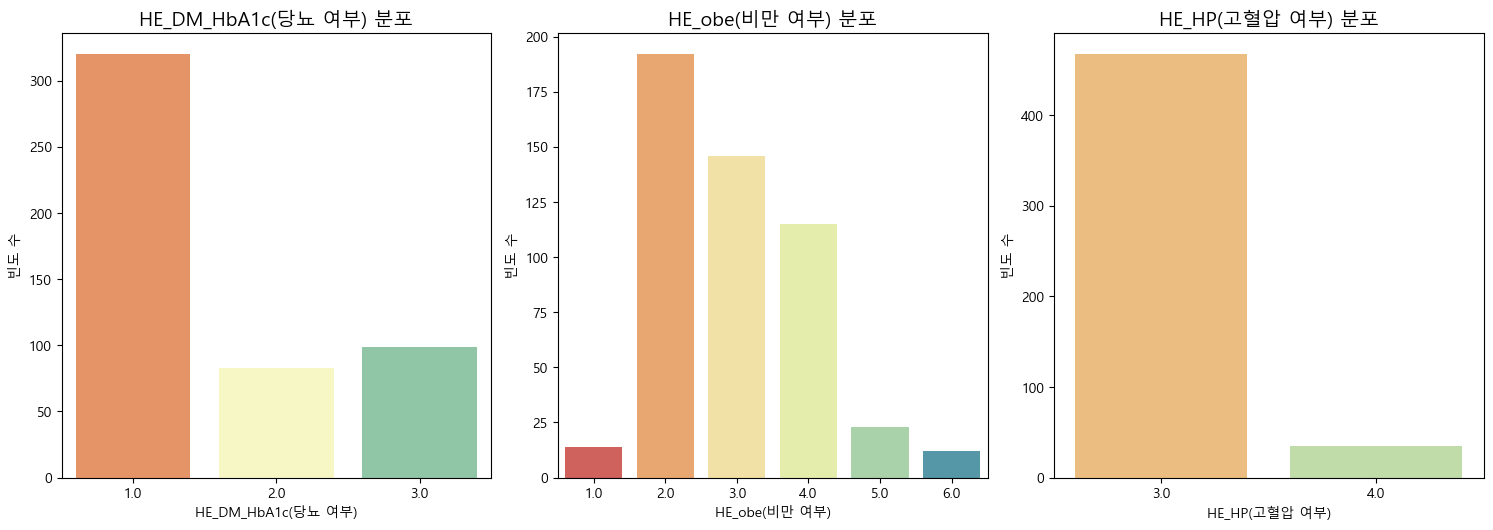

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# ÏãúÍ∞ÅÌôîÌï† Î≥ÄÏàò Î¶¨Ïä§Ìä∏
targets = ['HE_DM_HbA1c', 'HE_obe', 'HE_HP']
column_labels = {
    'HE_DM_HbA1c': 'HE_DM_HbA1c(ÎãπÎá® Ïó¨Î∂Ä)',
    'HE_obe': 'HE_obe(ÎπÑÎßå Ïó¨Î∂Ä)',
    'HE_HP': 'HE_HP(Í≥†ÌòàÏïï Ïó¨Î∂Ä)'
}

# ÏÑúÎ∏åÌîåÎ°Ø ÏÑ§Ï†ï (2Ìñâ 4Ïó¥: 8Í∞úÏùò Ïπ∏ Ï§ë 3Í∞ú ÏÇ¨Ïö©)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  # 2Ï∞®Ïõê ‚Üí 1Ï∞®Ïõê ÌèâÌÉÑÌôî

# Í∞Å Î≥ÄÏàòÏóê ÎåÄÌï¥ countplot Í∑∏Î¶¨Í∏∞
for i, var in enumerate(targets):
    sns.countplot(x=var, data=data, palette="Spectral", ax=axes[i])
    axes[i].set_title(f"{column_labels[var]} Î∂ÑÌè¨", fontsize=14)
    axes[i].set_xlabel(column_labels[var])
    axes[i].set_ylabel('ÎπàÎèÑ Ïàò')

# ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÎäî subplot Ïà®Í∏∞Í∏∞
for j in range(len(targets), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


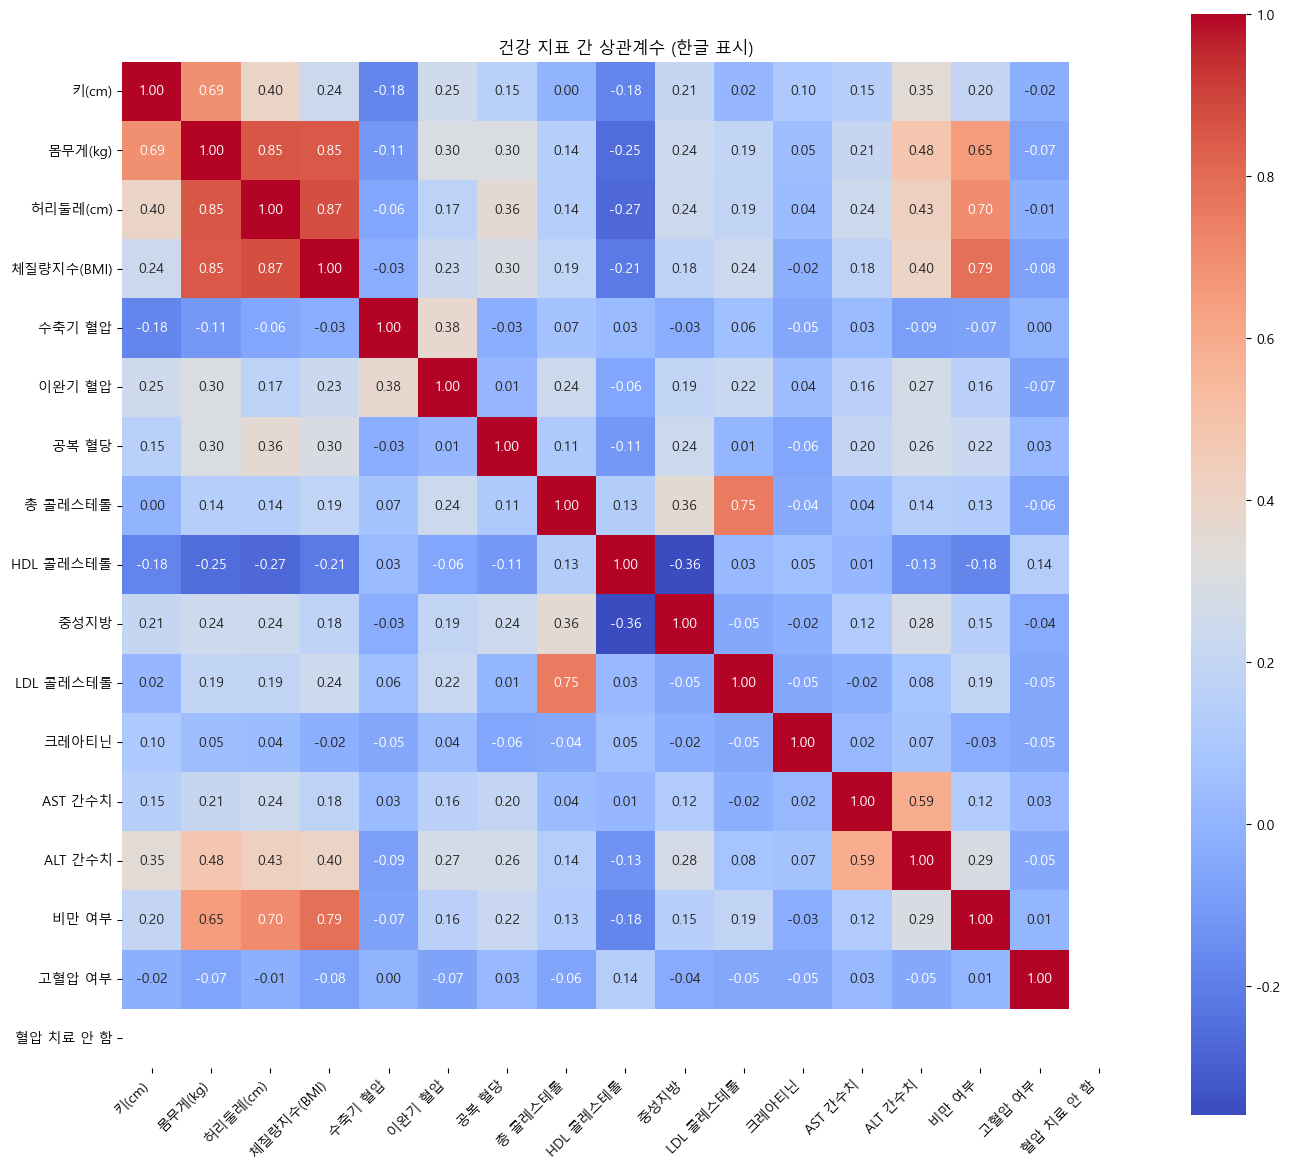

In [23]:
column_name_map = {
    'HE_ht': 'ÌÇ§(cm)',
    'HE_wt': 'Î™∏Î¨¥Í≤å(kg)',
    'HE_wc': 'ÌóàÎ¶¨ÎëòÎ†à(cm)',
    'HE_BMI': 'Ï≤¥ÏßàÎüâÏßÄÏàò(BMI)',
    'HE_sbp1': 'ÏàòÏ∂ïÍ∏∞ ÌòàÏïï',
    'HE_dbp1': 'Ïù¥ÏôÑÍ∏∞ ÌòàÏïï',
    'HE_glu': 'Í≥µÎ≥µ ÌòàÎãπ',
    'HE_chol': 'Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_HDL_st2': 'HDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_TG': 'Ï§ëÏÑ±ÏßÄÎ∞©',
    'HE_LDL_drct': 'LDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_crea': 'ÌÅ¨Î†àÏïÑÌã∞Îãå',
    'HE_ast': 'AST Í∞ÑÏàòÏπò',
    'HE_alt': 'ALT Í∞ÑÏàòÏπò',
    'HE_obe': 'ÎπÑÎßå Ïó¨Î∂Ä',
    'HE_HP': 'Í≥†ÌòàÏïï Ïó¨Î∂Ä',
    'DI1_pt' : 'ÌòàÏïï ÏπòÎ£å Ïïà Ìï®'
}


correlation_columns = [
    'HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1', 'HE_glu', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt', 'DE1_3', 'DI1_pt'
]

import seaborn as sns
import matplotlib.pyplot as plt

# Î≥¥Í≥† Ïã∂ÏùÄ Î≥ÄÏàòÎßå Ï∂îÏ∂ú
selected_columns = list(column_name_map.keys())
correlation_matrix = data[selected_columns].corr()

# Ïª¨ÎüºÎ™ÖÏùÑ ÌïúÍ∏ÄÎ°ú Î≥ÄÌôò
correlation_matrix.columns = [column_name_map[col] for col in correlation_matrix.columns]
correlation_matrix.index = [column_name_map[col] for col in correlation_matrix.index]

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Í±¥Í∞ï ÏßÄÌëú Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò (ÌïúÍ∏Ä ÌëúÏãú)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

üìä ÌÉÄÍ≤ü Î≥ÄÏàò ÏÉÅÍ¥Ä Î∂ÑÏÑù - Í≥†ÌòàÏïï


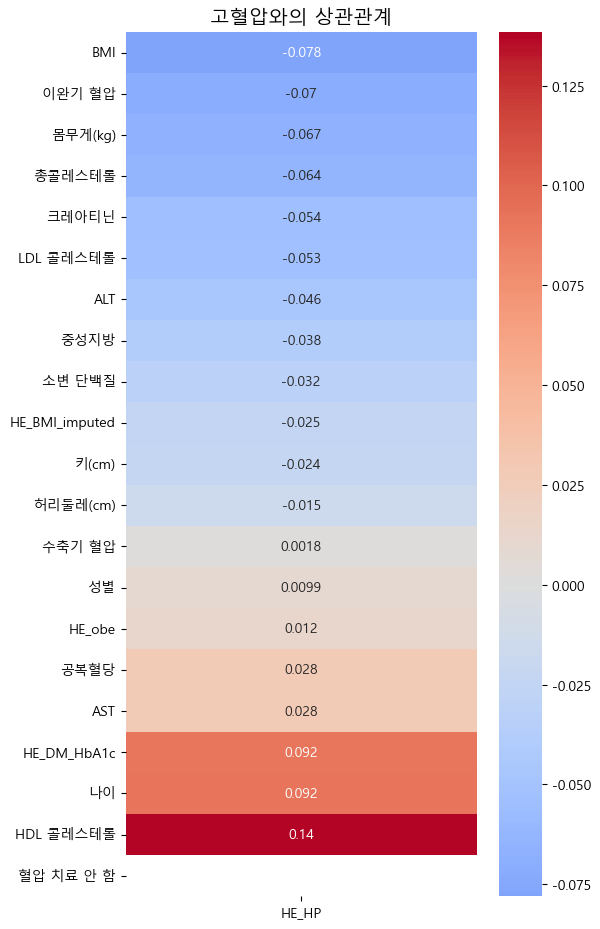

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Î≥ÄÏàò Ïù¥Î¶Ñ -> ÌïúÍ∏Ä Îß§Ìïë ÏÇ¨Ï†Ñ
feature_name_ko = {
    'HE_ht': 'ÌÇ§(cm)', 'HE_wt': 'Î™∏Î¨¥Í≤å(kg)', 'HE_wc': 'ÌóàÎ¶¨ÎëòÎ†à(cm)', 'HE_BMI': 'BMI',
    'HE_sbp1': 'ÏàòÏ∂ïÍ∏∞ ÌòàÏïï', 'HE_dbp1': 'Ïù¥ÏôÑÍ∏∞ ÌòàÏïï',
    'HE_Upro': 'ÏÜåÎ≥Ä Îã®Î∞±Ïßà', 'HE_glu': 'Í≥µÎ≥µÌòàÎãπ', 'HE_chol': 'Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_HDL_st2': 'HDL ÏΩúÎ†àÏä§ÌÖåÎ°§', 'HE_TG': 'Ï§ëÏÑ±ÏßÄÎ∞©', 'HE_LDL_drct': 'LDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_crea': 'ÌÅ¨Î†àÏïÑÌã∞Îãå', 'HE_ast': 'AST', 'HE_alt': 'ALT',
    'sex': 'ÏÑ±Î≥Ñ', 'age': 'ÎÇòÏù¥',
    'DI1_pt' : 'ÌòàÏïï ÏπòÎ£å Ïïà Ìï®'
}

# ÌÉÄÍ≤ü Ïù¥Î¶Ñ -> ÌïúÍ∏Ä Îß§Ìïë
target_name_ko = {

    'HE_HP': 'Í≥†ÌòàÏïï'
}

# Ï†úÏô∏Ìï† Ïª¨Îüº
exclude_cols = ['year', 'ID', 'DE1_dg', 'DI1_dg'] + list(target_name_ko.keys())

# input features ÏûêÎèô ÏßÄÏ†ï
input_features = [col for col in data.columns if col not in exclude_cols]

for target in target_name_ko.keys():
    print(f"üìä ÌÉÄÍ≤ü Î≥ÄÏàò ÏÉÅÍ¥Ä Î∂ÑÏÑù - {target_name_ko[target]}")
    
    # ÏàòÏπòÌòï Î≥ÄÏàòÎßå Ìè¨Ìï®Ìïú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    subset = data[input_features + [target]].copy()
    subset = subset.select_dtypes(include='number')

    # ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
    corr_with_target = subset.corr()[[target]].drop(index=target)
    corr_with_target = corr_with_target.sort_values(by=target, ascending=True)

    # ÌïúÍ∏Ä ÎùºÎ≤®Î°ú Ïù∏Îç±Ïä§ Î≥ÄÌôò
    corr_with_target.index = [feature_name_ko.get(col, col) for col in corr_with_target.index]

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(6, len(corr_with_target) * 0.4 + 1))
    sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', center=0)
    plt.title(f"{target_name_ko[target]}ÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ", fontsize=14)
    plt.tight_layout()
    plt.show()


Í≥†ÌòàÏïïÏù∏Îç∞ ÏπòÎ£å Ïïà Ìïú ÏÇ¨ÎûåÏùÑ ÎìúÎûç

In [ ]:
data = pd.read_csv("C:/Í±¥Í∞ïÍ≤ÄÏßÑ/health_checkup/JDM/2012ÎÖÑ~2023ÎÖÑ/Í±¥Í∞ïÏ°∞ÏÇ¨_2012~2022_ÌÜµÌï©.csv")

In [52]:
# Í≥†ÌòàÏïï Ï†ÑÎã®Í≥Ñ ÎòêÎäî Í≥†ÌòàÏïïÏù¥Î©¥ÏÑú ÏπòÎ£å Ïïà Ìïú ÏÇ¨ÎûåÎßå Î≤ÑÎ¶º
data = data[~((data['HE_HP'].isin([3, 4])) & (data['DI1_pt'] == 0))]

In [53]:
import pandas as pd

# ÎÇ®Í∏∞Í≥† Ïã∂ÏùÄ Ïª¨Îüº Î¶¨Ïä§Ìä∏
columns_to_keep = [
    'ID','year','age','sex','HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt',
    # 'L_OUT_FQ', 
    # 'BP1','BD1_11', 'BS3_2', 'BE5_1', 
    'HE_obe', 'HE_HP', 'HE_DM_HbA1c',
    'DE1_dg', 'DI1_dg',
    'DI1_pt'
]

# ÏõêÎûò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ dfÏùº Îïå
data = data[columns_to_keep]

In [54]:
def iqr_clip(series, lower_quantile=0.25, upper_quantile=0.75, clip_range=1.5):
    q1 = series.quantile(lower_quantile)
    q3 = series.quantile(upper_quantile)
    iqr = q3 - q1
    lower_bound = q1 - clip_range * iqr
    upper_bound = q3 + clip_range * iqr
    return series.clip(lower=lower_bound, upper=upper_bound)

# Ï†ÅÏö©
data['HE_glu'] = iqr_clip(data['HE_glu'])
data['HE_alt'] = iqr_clip(data['HE_alt'])

# HE_DM_HbA1c
if 'HE_DM_HbA1c' in data.columns:
    data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'DE1_dg' in data.columns:
        print(f"DE1_dg missing ratio: {data['DE1_dg'].isnull().mean()}")
        data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].fillna(data['DE1_dg'].map({0: 1, 1: 3}))
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_DM_HbA1c'].isnull().any():
        data = data[data['HE_DM_HbA1c'].notnull()]
    print(f"HE_DM_HbA1c NaN count after: {data['HE_DM_HbA1c'].isnull().sum()}")

# HE_obe
if 'HE_obe' in data.columns:
    data['HE_obe'] = data['HE_obe'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'HE_BMI' in data.columns:
        # BMIÍ∞Ä KNN ÎåÄÏ≤¥Îêú Í≤ΩÏö∞ ÌëúÏãú
        data['HE_BMI_imputed'] = data['HE_BMI'].isnull().astype(int)
        data['HE_obe'] = data.apply(
            lambda row: row['HE_obe'] if pd.notna(row['HE_obe']) else (
                1 if row['HE_BMI'] < 18.5 else
                2 if row['HE_BMI'] < 25 else
                3 if row['HE_BMI'] < 30 else
                4 if row['HE_BMI'] < 35 else
                5 if row['HE_BMI'] < 40 else
                6
            ),
            axis=1
        )
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_obe'].isnull().any():
        data = data[data['HE_obe'].notnull()]
    print(f"HE_obe NaN count after: {data['HE_obe'].isnull().sum()}")

# HE_HP
if 'HE_HP' in data.columns:
    data['HE_HP'] = data['HE_HP'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'DI1_dg' in data.columns:
        print(f"DI1_dg missing ratio: {data['DI1_dg'].isnull().mean()}")
        data['HE_HP'] = data['HE_HP'].fillna(data['DI1_dg'].map({0: 1, 1: 4}))
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_HP'].isnull().any():
        data = data[data['HE_HP'].notnull()]
    print(f"HE_HP NaN count after: {data['HE_HP'].isnull().sum()}")


#Í≤∞Ï∏°Ïπò ÎπÑÏú® ÎÇÆÏùÄ Î≥ÄÏàò Ï≤òÎ¶¨
# low_missing_columns = [
#     'DI1_dg', 
#     'DE1_dg', 
# ]
continuous_columns = ['HE_wt', 'HE_ht', 'HE_BMI']  # Ïó∞ÏÜçÌòï Î≥ÄÏàò

#for col in low_missing_columns + continuous_columns:
for col in continuous_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col] = data[col].replace([9, 99, 999, 88, 888, 9.0, 99.0, 999.0, 88.0, 888.0], np.nan)
        if not data[col].isnull().all():
            if col in continuous_columns:
                median_value = data[col].median()
                data[col] = data[col].fillna(median_value)
                print(f"Median for {col}: {median_value}")
            else:
                mode_series = data[col].mode(dropna=True)
                if not mode_series.empty:
                    mode_value = mode_series[0]
                    data[col] = data[col].fillna(mode_value)
                    print(f"Mode for {col}: {mode_value}")
                else:
                    print(f"No valid mode for {col}, leaving as is.")
        else:
            print(f"Column {col} is all NaN, skipping.")

# data = data[data['DE1_3'].isin([1, 2])]

#ÏÉùÏ≤¥ ÏßÄÌëú Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
knn_columns = [
    'HE_sbp1', 'HE_dbp1',  'HE_wc', 'HE_glu', 'HE_chol',
    'HE_HDL_st2', 'HE_TG', 'HE_LDL_drct',  'HE_crea', 'HE_Upro',
    'HE_ast', 'HE_alt', 'HE_wt', 'HE_ht', 'HE_BMI'
]
knn_data = data[knn_columns].copy()
knn_data = knn_data.replace([888, 999, 888.0, 999.0], np.nan)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
knn_data_scaled = scaler.fit_transform(knn_data)
knn_data_scaled = pd.DataFrame(knn_data_scaled, columns=knn_columns, index=knn_data.index)

# KNN Imputation
imputer_knn = KNNImputer(n_neighbors=5, weights="distance")
knn_imputed = imputer_knn.fit_transform(knn_data_scaled)

# Ïó≠Ïä§ÏºÄÏùºÎßÅ
knn_imputed = scaler.inverse_transform(knn_imputed)
knn_imputed_data = pd.DataFrame(knn_imputed, columns=knn_columns, index=knn_data.index)
data[knn_columns] = knn_imputed_data



DE1_dg missing ratio: 0.05705428954423593
HE_DM_HbA1c NaN count after: 0
HE_obe NaN count after: 0
DI1_dg missing ratio: 0.0
HE_HP NaN count after: 0
Median for HE_wt: 62.2
Median for HE_ht: 162.5
Median for HE_BMI: 23.66419796690986


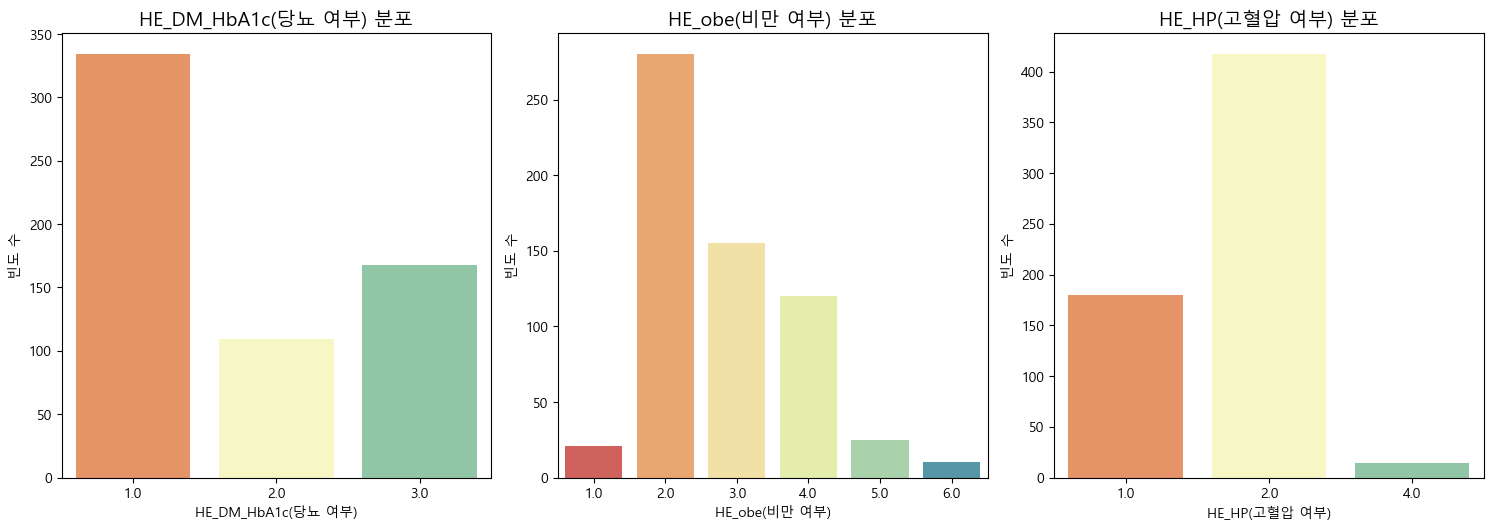

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# ÏãúÍ∞ÅÌôîÌï† Î≥ÄÏàò Î¶¨Ïä§Ìä∏
targets = ['HE_DM_HbA1c', 'HE_obe', 'HE_HP']
column_labels = {
    'HE_DM_HbA1c': 'HE_DM_HbA1c(ÎãπÎá® Ïó¨Î∂Ä)',
    'HE_obe': 'HE_obe(ÎπÑÎßå Ïó¨Î∂Ä)',
    'HE_HP': 'HE_HP(Í≥†ÌòàÏïï Ïó¨Î∂Ä)'
}

# ÏÑúÎ∏åÌîåÎ°Ø ÏÑ§Ï†ï (2Ìñâ 4Ïó¥: 8Í∞úÏùò Ïπ∏ Ï§ë 3Í∞ú ÏÇ¨Ïö©)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  # 2Ï∞®Ïõê ‚Üí 1Ï∞®Ïõê ÌèâÌÉÑÌôî

# Í∞Å Î≥ÄÏàòÏóê ÎåÄÌï¥ countplot Í∑∏Î¶¨Í∏∞
for i, var in enumerate(targets):
    sns.countplot(x=var, data=data, palette="Spectral", ax=axes[i])
    axes[i].set_title(f"{column_labels[var]} Î∂ÑÌè¨", fontsize=14)
    axes[i].set_xlabel(column_labels[var])
    axes[i].set_ylabel('ÎπàÎèÑ Ïàò')

# ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÎäî subplot Ïà®Í∏∞Í∏∞
for j in range(len(targets), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


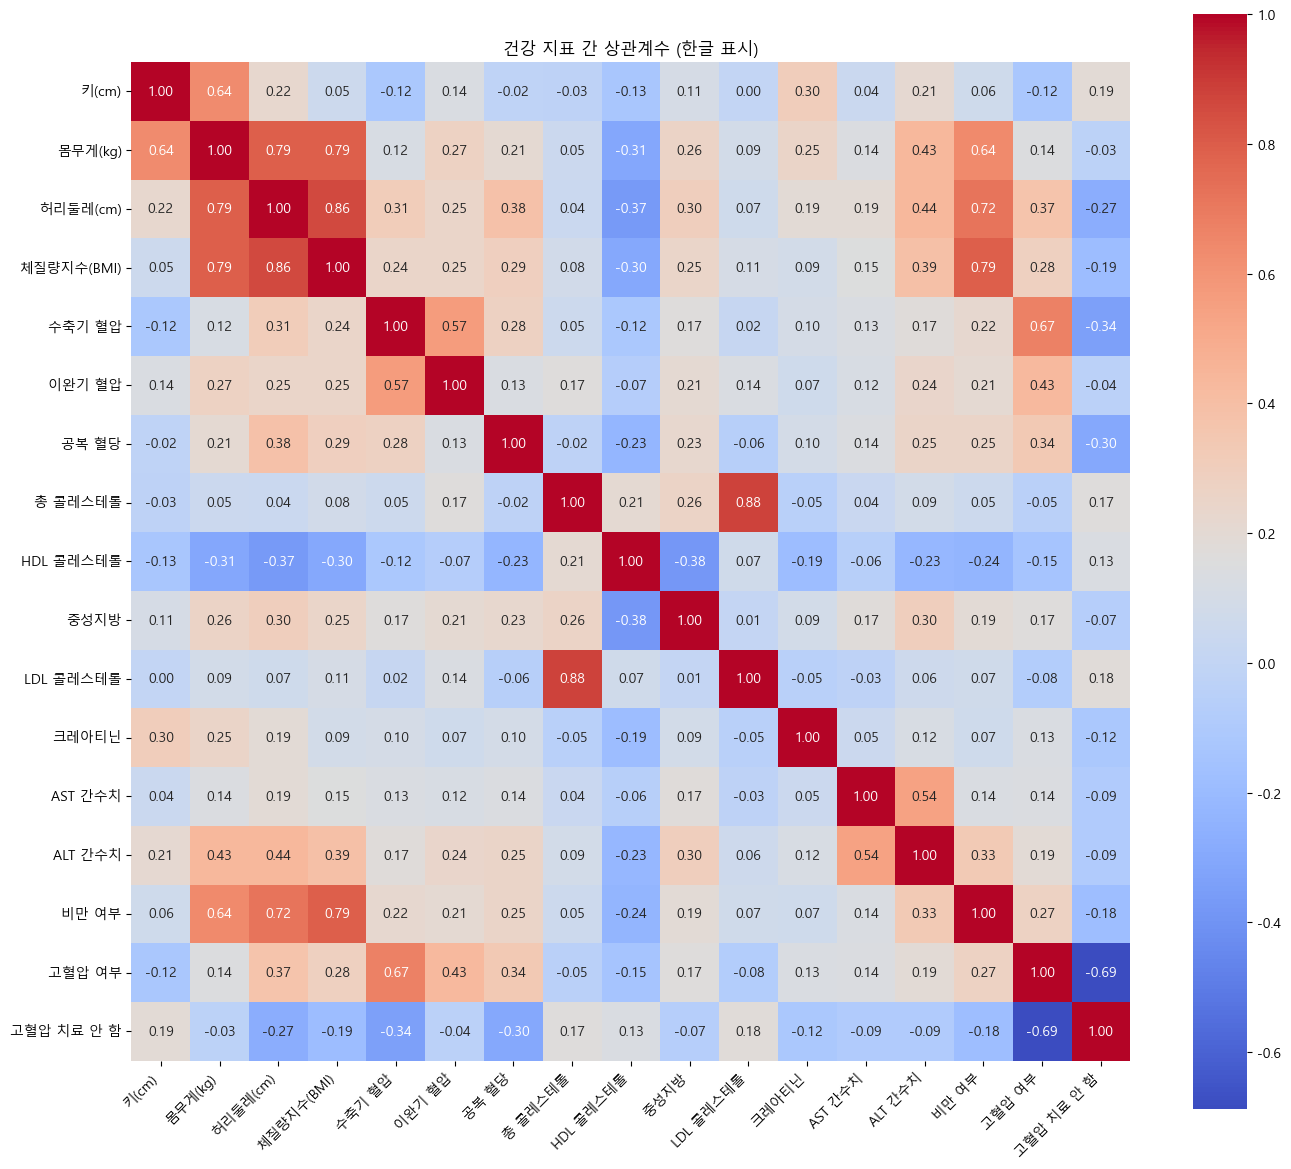

In [55]:
column_name_map = {
    'HE_ht': 'ÌÇ§(cm)',
    'HE_wt': 'Î™∏Î¨¥Í≤å(kg)',
    'HE_wc': 'ÌóàÎ¶¨ÎëòÎ†à(cm)',
    'HE_BMI': 'Ï≤¥ÏßàÎüâÏßÄÏàò(BMI)',
    'HE_sbp1': 'ÏàòÏ∂ïÍ∏∞ ÌòàÏïï',
    'HE_dbp1': 'Ïù¥ÏôÑÍ∏∞ ÌòàÏïï',
    'HE_glu': 'Í≥µÎ≥µ ÌòàÎãπ',
    'HE_chol': 'Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_HDL_st2': 'HDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_TG': 'Ï§ëÏÑ±ÏßÄÎ∞©',
    'HE_LDL_drct': 'LDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_crea': 'ÌÅ¨Î†àÏïÑÌã∞Îãå',
    'HE_ast': 'AST Í∞ÑÏàòÏπò',
    'HE_alt': 'ALT Í∞ÑÏàòÏπò',
    'HE_obe': 'ÎπÑÎßå Ïó¨Î∂Ä',
    'HE_HP': 'Í≥†ÌòàÏïï Ïó¨Î∂Ä',
    'DI1_pt' : 'Í≥†ÌòàÏïï ÏπòÎ£å Ïïà Ìï®'
}


correlation_columns = [
    'HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1', 'HE_glu', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt', 'DI1_pt'
]

import seaborn as sns
import matplotlib.pyplot as plt

# Î≥¥Í≥† Ïã∂ÏùÄ Î≥ÄÏàòÎßå Ï∂îÏ∂ú
selected_columns = list(column_name_map.keys())
correlation_matrix = data[selected_columns].corr()

# Ïª¨ÎüºÎ™ÖÏùÑ ÌïúÍ∏ÄÎ°ú Î≥ÄÌôò
correlation_matrix.columns = [column_name_map[col] for col in correlation_matrix.columns]
correlation_matrix.index = [column_name_map[col] for col in correlation_matrix.index]

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Í±¥Í∞ï ÏßÄÌëú Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò (ÌïúÍ∏Ä ÌëúÏãú)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

üìä ÌÉÄÍ≤ü Î≥ÄÏàò ÏÉÅÍ¥Ä Î∂ÑÏÑù - Í≥†ÌòàÏïïÏïï


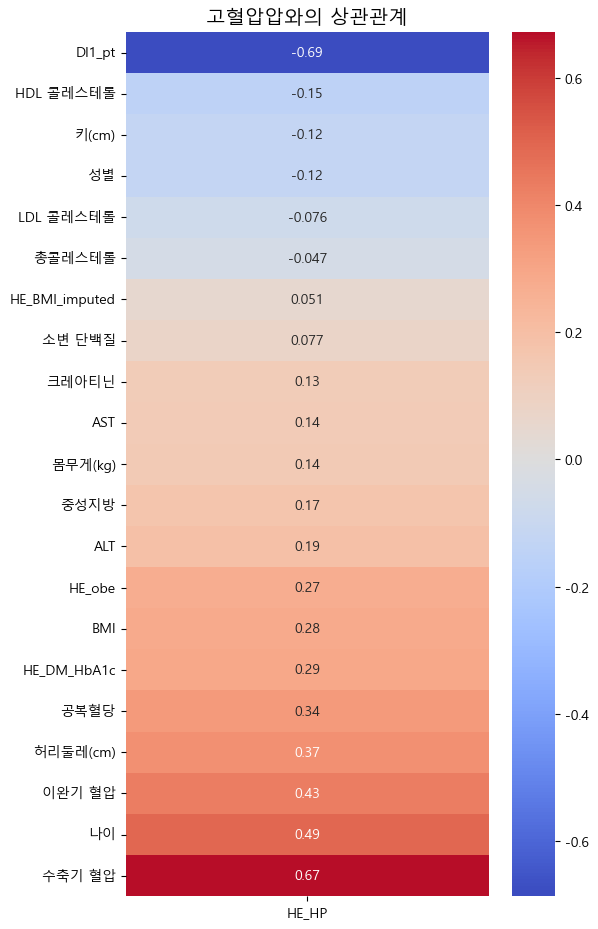

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Î≥ÄÏàò Ïù¥Î¶Ñ -> ÌïúÍ∏Ä Îß§Ìïë ÏÇ¨Ï†Ñ
feature_name_ko = {
    'HE_ht': 'ÌÇ§(cm)', 'HE_wt': 'Î™∏Î¨¥Í≤å(kg)', 'HE_wc': 'ÌóàÎ¶¨ÎëòÎ†à(cm)', 'HE_BMI': 'BMI',
    'HE_sbp1': 'ÏàòÏ∂ïÍ∏∞ ÌòàÏïï', 'HE_dbp1': 'Ïù¥ÏôÑÍ∏∞ ÌòàÏïï',
    'HE_Upro': 'ÏÜåÎ≥Ä Îã®Î∞±Ïßà', 'HE_glu': 'Í≥µÎ≥µÌòàÎãπ', 'HE_chol': 'Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_HDL_st2': 'HDL ÏΩúÎ†àÏä§ÌÖåÎ°§', 'HE_TG': 'Ï§ëÏÑ±ÏßÄÎ∞©', 'HE_LDL_drct': 'LDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_crea': 'ÌÅ¨Î†àÏïÑÌã∞Îãå', 'HE_ast': 'AST', 'HE_alt': 'ALT',
    'sex': 'ÏÑ±Î≥Ñ', 'age': 'ÎÇòÏù¥',
    'DE1_3' : 'ÎãπÎá®Îá® ÏπòÎ£å Ïïà Ìï®'
}

# ÌÉÄÍ≤ü Ïù¥Î¶Ñ -> ÌïúÍ∏Ä Îß§Ìïë
target_name_ko = {

    'HE_HP': 'Í≥†ÌòàÏïïÏïï'
}

# Ï†úÏô∏Ìï† Ïª¨Îüº
exclude_cols = ['year', 'ID', 'DE1_dg', 'DI1_dg'] + list(target_name_ko.keys())

# input features ÏûêÎèô ÏßÄÏ†ï
input_features = [col for col in data.columns if col not in exclude_cols]

for target in target_name_ko.keys():
    print(f"üìä ÌÉÄÍ≤ü Î≥ÄÏàò ÏÉÅÍ¥Ä Î∂ÑÏÑù - {target_name_ko[target]}")
    
    # ÏàòÏπòÌòï Î≥ÄÏàòÎßå Ìè¨Ìï®Ìïú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    subset = data[input_features + [target]].copy()
    subset = subset.select_dtypes(include='number')

    # ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
    corr_with_target = subset.corr()[[target]].drop(index=target)
    corr_with_target = corr_with_target.sort_values(by=target, ascending=True)

    # ÌïúÍ∏Ä ÎùºÎ≤®Î°ú Ïù∏Îç±Ïä§ Î≥ÄÌôò
    corr_with_target.index = [feature_name_ko.get(col, col) for col in corr_with_target.index]

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(6, len(corr_with_target) * 0.4 + 1))
    sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', center=0)
    plt.title(f"{target_name_ko[target]}ÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ", fontsize=14)
    plt.tight_layout()
    plt.show()


Í∞ÄÏÑ§ : Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÎäî Í≥†ÌòàÏïïÏù∏Îç∞ Í≥†ÌòàÏïï ÏïïÏπòÎ£åÌïú ÏÇ¨ÎûåÏùò ÏàòÏπòÍ∞Ä Íª¥ÏûàÏñ¥ Î≥ÄÏàòÎì§Í∞ÑÏóê ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Î∞©Ìï¥ÌïúÎã§. ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º ÌôïÏù∏Ìï¥ Î≥¥Îãà Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º Îã§Î•ºÍ≤ÉÏù¥ ÏóÜÎã§.

ÎãπÎá®Ïù∏Îç∞ ÎãπÎá® Í¥ÄÎ¶¨ Ïïà Ìïú ÏÇ¨Îûå ÌäπÏßï Î≥¥Í∏∞

In [30]:
data = pd.read_csv("C:/Í±¥Í∞ïÍ≤ÄÏßÑ/health_checkup/JDM/2022ÎÖÑ~2023ÎÖÑ/Í±¥Í∞ïÏ°∞ÏÇ¨_2012~2022_ÌÜµÌï©.csv") # ÎãπÎá® ÏπòÎ£å

In [ ]:
# ÎãπÎá®Îá® Ï†ÑÎã®Í≥Ñ ÎòêÎäî ÎãπÎá®Ïù¥Î©¥ÏÑú ÏπòÎ£å Ïïà Ìïú ÏÇ¨ÎûåÎßå ÎÇ®ÍπÄ
data = data[(data['HE_DM_HbA1c'].isin([2, 3])) & (data['DE1_3'] == 2)]

In [32]:
import pandas as pd

# ÎÇ®Í∏∞Í≥† Ïã∂ÏùÄ Ïª¨Îüº Î¶¨Ïä§Ìä∏
columns_to_keep = [
    'ID','year','age','sex','HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt',
    # 'L_OUT_FQ', 
    # 'BP1','BD1_11', 'BS3_2', 'BE5_1', 
    'HE_obe', 'HE_HP', 'HE_DM_HbA1c',
    'DE1_dg', 'DI1_dg',
    'DE1_3'
]

# ÏõêÎûò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ dfÏùº Îïå
data = data[columns_to_keep]

In [33]:
def iqr_clip(series, lower_quantile=0.25, upper_quantile=0.75, clip_range=1.5):
    q1 = series.quantile(lower_quantile)
    q3 = series.quantile(upper_quantile)
    iqr = q3 - q1
    lower_bound = q1 - clip_range * iqr
    upper_bound = q3 + clip_range * iqr
    return series.clip(lower=lower_bound, upper=upper_bound)

# Ï†ÅÏö©
data['HE_glu'] = iqr_clip(data['HE_glu'])
data['HE_alt'] = iqr_clip(data['HE_alt'])

# HE_DM_HbA1c
if 'HE_DM_HbA1c' in data.columns:
    data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'DE1_dg' in data.columns:
        print(f"DE1_dg missing ratio: {data['DE1_dg'].isnull().mean()}")
        data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].fillna(data['DE1_dg'].map({0: 1, 1: 3}))
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_DM_HbA1c'].isnull().any():
        data = data[data['HE_DM_HbA1c'].notnull()]
    print(f"HE_DM_HbA1c NaN count after: {data['HE_DM_HbA1c'].isnull().sum()}")

# HE_obe
if 'HE_obe' in data.columns:
    data['HE_obe'] = data['HE_obe'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'HE_BMI' in data.columns:
        # BMIÍ∞Ä KNN ÎåÄÏ≤¥Îêú Í≤ΩÏö∞ ÌëúÏãú
        data['HE_BMI_imputed'] = data['HE_BMI'].isnull().astype(int)
        data['HE_obe'] = data.apply(
            lambda row: row['HE_obe'] if pd.notna(row['HE_obe']) else (
                1 if row['HE_BMI'] < 18.5 else
                2 if row['HE_BMI'] < 25 else
                3 if row['HE_BMI'] < 30 else
                4 if row['HE_BMI'] < 35 else
                5 if row['HE_BMI'] < 40 else
                6
            ),
            axis=1
        )
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_obe'].isnull().any():
        data = data[data['HE_obe'].notnull()]
    print(f"HE_obe NaN count after: {data['HE_obe'].isnull().sum()}")

# HE_HP
if 'HE_HP' in data.columns:
    data['HE_HP'] = data['HE_HP'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'DI1_dg' in data.columns:
        print(f"DI1_dg missing ratio: {data['DI1_dg'].isnull().mean()}")
        data['HE_HP'] = data['HE_HP'].fillna(data['DI1_dg'].map({0: 1, 1: 4}))
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_HP'].isnull().any():
        data = data[data['HE_HP'].notnull()]
    print(f"HE_HP NaN count after: {data['HE_HP'].isnull().sum()}")


#Í≤∞Ï∏°Ïπò ÎπÑÏú® ÎÇÆÏùÄ Î≥ÄÏàò Ï≤òÎ¶¨
# low_missing_columns = [
#     'DI1_dg', 
#     'DE1_dg', 
# ]
continuous_columns = ['HE_wt', 'HE_ht', 'HE_BMI']  # Ïó∞ÏÜçÌòï Î≥ÄÏàò

#for col in low_missing_columns + continuous_columns:
for col in continuous_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col] = data[col].replace([9, 99, 999, 88, 888, 9.0, 99.0, 999.0, 88.0, 888.0], np.nan)
        if not data[col].isnull().all():
            if col in continuous_columns:
                median_value = data[col].median()
                data[col] = data[col].fillna(median_value)
                print(f"Median for {col}: {median_value}")
            else:
                mode_series = data[col].mode(dropna=True)
                if not mode_series.empty:
                    mode_value = mode_series[0]
                    data[col] = data[col].fillna(mode_value)
                    print(f"Mode for {col}: {mode_value}")
                else:
                    print(f"No valid mode for {col}, leaving as is.")
        else:
            print(f"Column {col} is all NaN, skipping.")

# data = data[data['DE1_3'].isin([1, 2])]

#ÏÉùÏ≤¥ ÏßÄÌëú Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
knn_columns = [
    'HE_sbp1', 'HE_dbp1',  'HE_wc', 'HE_glu', 'HE_chol',
    'HE_HDL_st2', 'HE_TG', 'HE_LDL_drct',  'HE_crea', 'HE_Upro',
    'HE_ast', 'HE_alt', 'HE_wt', 'HE_ht', 'HE_BMI'
]
knn_data = data[knn_columns].copy()
knn_data = knn_data.replace([888, 999, 888.0, 999.0], np.nan)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
knn_data_scaled = scaler.fit_transform(knn_data)
knn_data_scaled = pd.DataFrame(knn_data_scaled, columns=knn_columns, index=knn_data.index)

# KNN Imputation
imputer_knn = KNNImputer(n_neighbors=5, weights="distance")
knn_imputed = imputer_knn.fit_transform(knn_data_scaled)

# Ïó≠Ïä§ÏºÄÏùºÎßÅ
knn_imputed = scaler.inverse_transform(knn_imputed)
knn_imputed_data = pd.DataFrame(knn_imputed, columns=knn_columns, index=knn_data.index)
data[knn_columns] = knn_imputed_data



DE1_dg missing ratio: 0.0
HE_DM_HbA1c NaN count after: 0
HE_obe NaN count after: 0
DI1_dg missing ratio: 0.0
HE_HP NaN count after: 0
Median for HE_wt: 66.95
Median for HE_ht: 165.45
Median for HE_BMI: 24.470036673882998


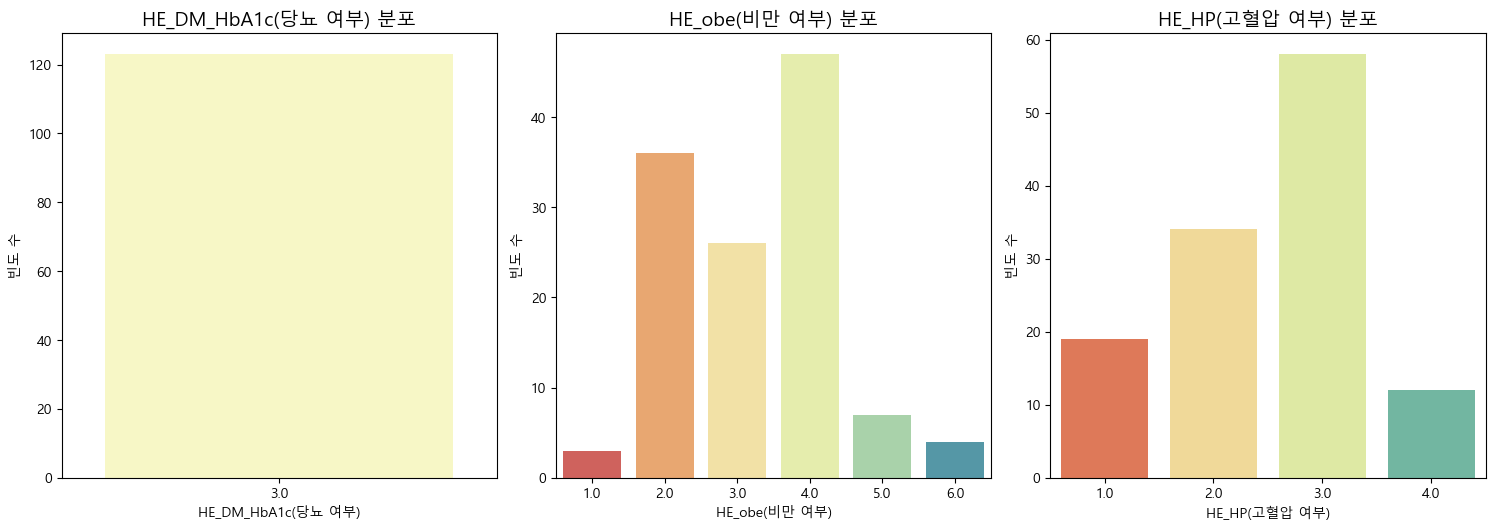

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# ÏãúÍ∞ÅÌôîÌï† Î≥ÄÏàò Î¶¨Ïä§Ìä∏
targets = ['HE_DM_HbA1c', 'HE_obe', 'HE_HP']
column_labels = {
    'HE_DM_HbA1c': 'HE_DM_HbA1c(ÎãπÎá® Ïó¨Î∂Ä)',
    'HE_obe': 'HE_obe(ÎπÑÎßå Ïó¨Î∂Ä)',
    'HE_HP': 'HE_HP(Í≥†ÌòàÏïï Ïó¨Î∂Ä)'
}

# ÏÑúÎ∏åÌîåÎ°Ø ÏÑ§Ï†ï (2Ìñâ 4Ïó¥: 8Í∞úÏùò Ïπ∏ Ï§ë 3Í∞ú ÏÇ¨Ïö©)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  # 2Ï∞®Ïõê ‚Üí 1Ï∞®Ïõê ÌèâÌÉÑÌôî

# Í∞Å Î≥ÄÏàòÏóê ÎåÄÌï¥ countplot Í∑∏Î¶¨Í∏∞
for i, var in enumerate(targets):
    sns.countplot(x=var, data=data, palette="Spectral", ax=axes[i])
    axes[i].set_title(f"{column_labels[var]} Î∂ÑÌè¨", fontsize=14)
    axes[i].set_xlabel(column_labels[var])
    axes[i].set_ylabel('ÎπàÎèÑ Ïàò')

# ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÎäî subplot Ïà®Í∏∞Í∏∞
for j in range(len(targets), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Í≤∞Í≥º : Í≤ΩÍ≥ÑÌòï ÎãπÎá®Ïù∏ ÏÇ¨ÎûåÏùÄ ÎåÄÎ∂ÄÎ∂Ñ ÏπòÎ£åÎ•º ÌïòÍ≥† ÏûàÎçîÎùºÎäî Îúª

ÎãπÎá®Ïù∏Îç∞ ÏπòÎ£å Ïïà Ìïú ÏÇ¨ÎûåÏùÑ ÎìúÎûç

In [35]:
data = pd.read_csv("C:/Í±¥Í∞ïÍ≤ÄÏßÑ/health_checkup/JDM/2022ÎÖÑ~2023ÎÖÑ/Í±¥Í∞ïÏ°∞ÏÇ¨_2012~2022_ÌÜµÌï©.csv") # ÎãπÎá® ÏπòÎ£å

In [36]:
# ÎãπÎá®Î≥ëÏù¥Í±∞ÎÇò Ï†ÑÎã®Í≥ÑÏù∏Îç∞ ÏπòÎ£åÎ•º ÌïòÍ≥† ÏûàÎäî ÏÇ¨ÎûåÏùÄ Ï†úÍ±∞
data = data[~((data['HE_DM_HbA1c'].isin([2, 3])) & (data['DE1_3'] == 1))]

In [37]:
import pandas as pd

# ÎÇ®Í∏∞Í≥† Ïã∂ÏùÄ Ïª¨Îüº Î¶¨Ïä§Ìä∏
columns_to_keep = [
    'ID','year','age','sex','HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt',
    # 'L_OUT_FQ', 
    # 'BP1','BD1_11', 'BS3_2', 'BE5_1', 
    'HE_obe', 'HE_HP', 'HE_DM_HbA1c',
    'DE1_dg', 'DI1_dg',
    'DE1_3'
]

# ÏõêÎûò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ dfÏùº Îïå
data = data[columns_to_keep]

In [38]:
def iqr_clip(series, lower_quantile=0.25, upper_quantile=0.75, clip_range=1.5):
    q1 = series.quantile(lower_quantile)
    q3 = series.quantile(upper_quantile)
    iqr = q3 - q1
    lower_bound = q1 - clip_range * iqr
    upper_bound = q3 + clip_range * iqr
    return series.clip(lower=lower_bound, upper=upper_bound)

# Ï†ÅÏö©
data['HE_glu'] = iqr_clip(data['HE_glu'])
data['HE_alt'] = iqr_clip(data['HE_alt'])

# HE_DM_HbA1c
if 'HE_DM_HbA1c' in data.columns:
    data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'DE1_dg' in data.columns:
        print(f"DE1_dg missing ratio: {data['DE1_dg'].isnull().mean()}")
        data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].fillna(data['DE1_dg'].map({0: 1, 1: 3}))
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_DM_HbA1c'].isnull().any():
        data = data[data['HE_DM_HbA1c'].notnull()]
    print(f"HE_DM_HbA1c NaN count after: {data['HE_DM_HbA1c'].isnull().sum()}")

# HE_obe
if 'HE_obe' in data.columns:
    data['HE_obe'] = data['HE_obe'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'HE_BMI' in data.columns:
        # BMIÍ∞Ä KNN ÎåÄÏ≤¥Îêú Í≤ΩÏö∞ ÌëúÏãú
        data['HE_BMI_imputed'] = data['HE_BMI'].isnull().astype(int)
        data['HE_obe'] = data.apply(
            lambda row: row['HE_obe'] if pd.notna(row['HE_obe']) else (
                1 if row['HE_BMI'] < 18.5 else
                2 if row['HE_BMI'] < 25 else
                3 if row['HE_BMI'] < 30 else
                4 if row['HE_BMI'] < 35 else
                5 if row['HE_BMI'] < 40 else
                6
            ),
            axis=1
        )
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_obe'].isnull().any():
        data = data[data['HE_obe'].notnull()]
    print(f"HE_obe NaN count after: {data['HE_obe'].isnull().sum()}")

# HE_HP
if 'HE_HP' in data.columns:
    data['HE_HP'] = data['HE_HP'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'DI1_dg' in data.columns:
        print(f"DI1_dg missing ratio: {data['DI1_dg'].isnull().mean()}")
        data['HE_HP'] = data['HE_HP'].fillna(data['DI1_dg'].map({0: 1, 1: 4}))
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_HP'].isnull().any():
        data = data[data['HE_HP'].notnull()]
    print(f"HE_HP NaN count after: {data['HE_HP'].isnull().sum()}")


#Í≤∞Ï∏°Ïπò ÎπÑÏú® ÎÇÆÏùÄ Î≥ÄÏàò Ï≤òÎ¶¨
# low_missing_columns = [
#     'DI1_dg', 
#     'DE1_dg', 
# ]
continuous_columns = ['HE_wt', 'HE_ht', 'HE_BMI']  # Ïó∞ÏÜçÌòï Î≥ÄÏàò

#for col in low_missing_columns + continuous_columns:
for col in continuous_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col] = data[col].replace([9, 99, 999, 88, 888, 9.0, 99.0, 999.0, 88.0, 888.0], np.nan)
        if not data[col].isnull().all():
            if col in continuous_columns:
                median_value = data[col].median()
                data[col] = data[col].fillna(median_value)
                print(f"Median for {col}: {median_value}")
            else:
                mode_series = data[col].mode(dropna=True)
                if not mode_series.empty:
                    mode_value = mode_series[0]
                    data[col] = data[col].fillna(mode_value)
                    print(f"Mode for {col}: {mode_value}")
                else:
                    print(f"No valid mode for {col}, leaving as is.")
        else:
            print(f"Column {col} is all NaN, skipping.")

# data = data[data['DE1_3'].isin([1, 2])]

#ÏÉùÏ≤¥ ÏßÄÌëú Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
knn_columns = [
    'HE_sbp1', 'HE_dbp1',  'HE_wc', 'HE_glu', 'HE_chol',
    'HE_HDL_st2', 'HE_TG', 'HE_LDL_drct',  'HE_crea', 'HE_Upro',
    'HE_ast', 'HE_alt', 'HE_wt', 'HE_ht', 'HE_BMI'
]
knn_data = data[knn_columns].copy()
knn_data = knn_data.replace([888, 999, 888.0, 999.0], np.nan)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
knn_data_scaled = scaler.fit_transform(knn_data)
knn_data_scaled = pd.DataFrame(knn_data_scaled, columns=knn_columns, index=knn_data.index)

# KNN Imputation
imputer_knn = KNNImputer(n_neighbors=5, weights="distance")
knn_imputed = imputer_knn.fit_transform(knn_data_scaled)

# Ïó≠Ïä§ÏºÄÏùºÎßÅ
knn_imputed = scaler.inverse_transform(knn_imputed)
knn_imputed_data = pd.DataFrame(knn_imputed, columns=knn_columns, index=knn_data.index)
data[knn_columns] = knn_imputed_data



DE1_dg missing ratio: 0.05828055847617185
HE_DM_HbA1c NaN count after: 0
HE_obe NaN count after: 0
DI1_dg missing ratio: 0.0
HE_HP NaN count after: 0
Median for HE_wt: 62.1
Median for HE_ht: 162.6
Median for HE_BMI: 23.61548947203167


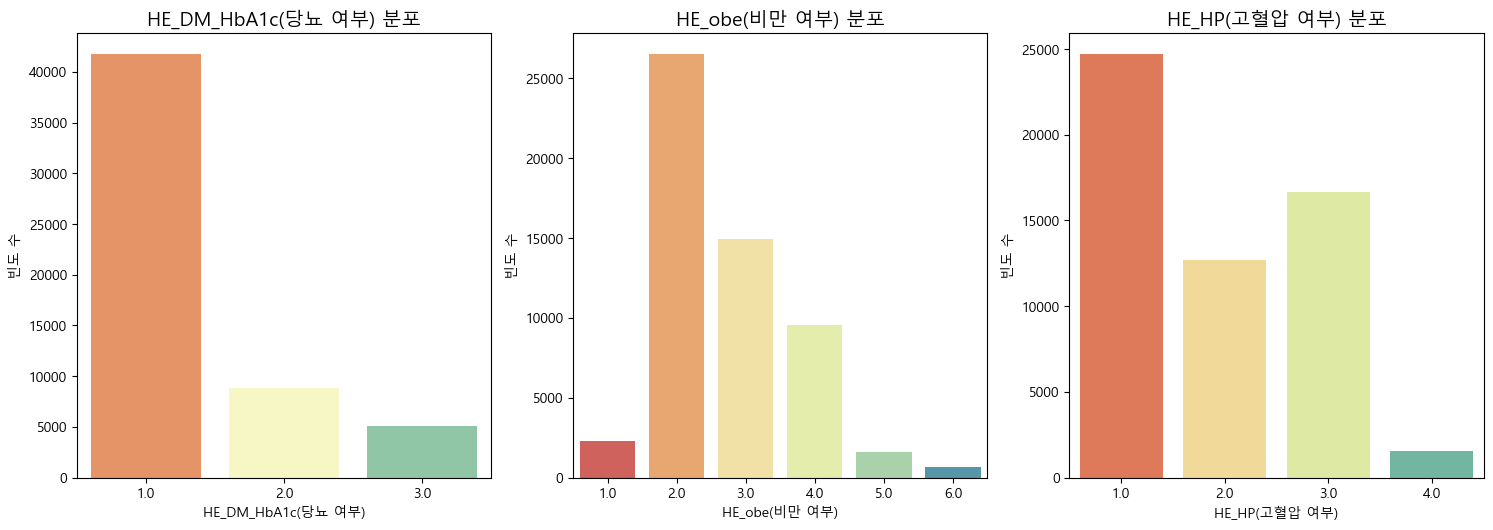

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# ÏãúÍ∞ÅÌôîÌï† Î≥ÄÏàò Î¶¨Ïä§Ìä∏
targets = ['HE_DM_HbA1c', 'HE_obe', 'HE_HP']
column_labels = {
    'HE_DM_HbA1c': 'HE_DM_HbA1c(ÎãπÎá® Ïó¨Î∂Ä)',
    'HE_obe': 'HE_obe(ÎπÑÎßå Ïó¨Î∂Ä)',
    'HE_HP': 'HE_HP(Í≥†ÌòàÏïï Ïó¨Î∂Ä)'
}

# ÏÑúÎ∏åÌîåÎ°Ø ÏÑ§Ï†ï (2Ìñâ 4Ïó¥: 8Í∞úÏùò Ïπ∏ Ï§ë 3Í∞ú ÏÇ¨Ïö©)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  # 2Ï∞®Ïõê ‚Üí 1Ï∞®Ïõê ÌèâÌÉÑÌôî

# Í∞Å Î≥ÄÏàòÏóê ÎåÄÌï¥ countplot Í∑∏Î¶¨Í∏∞
for i, var in enumerate(targets):
    sns.countplot(x=var, data=data, palette="Spectral", ax=axes[i])
    axes[i].set_title(f"{column_labels[var]} Î∂ÑÌè¨", fontsize=14)
    axes[i].set_xlabel(column_labels[var])
    axes[i].set_ylabel('ÎπàÎèÑ Ïàò')

# ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÎäî subplot Ïà®Í∏∞Í∏∞
for j in range(len(targets), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


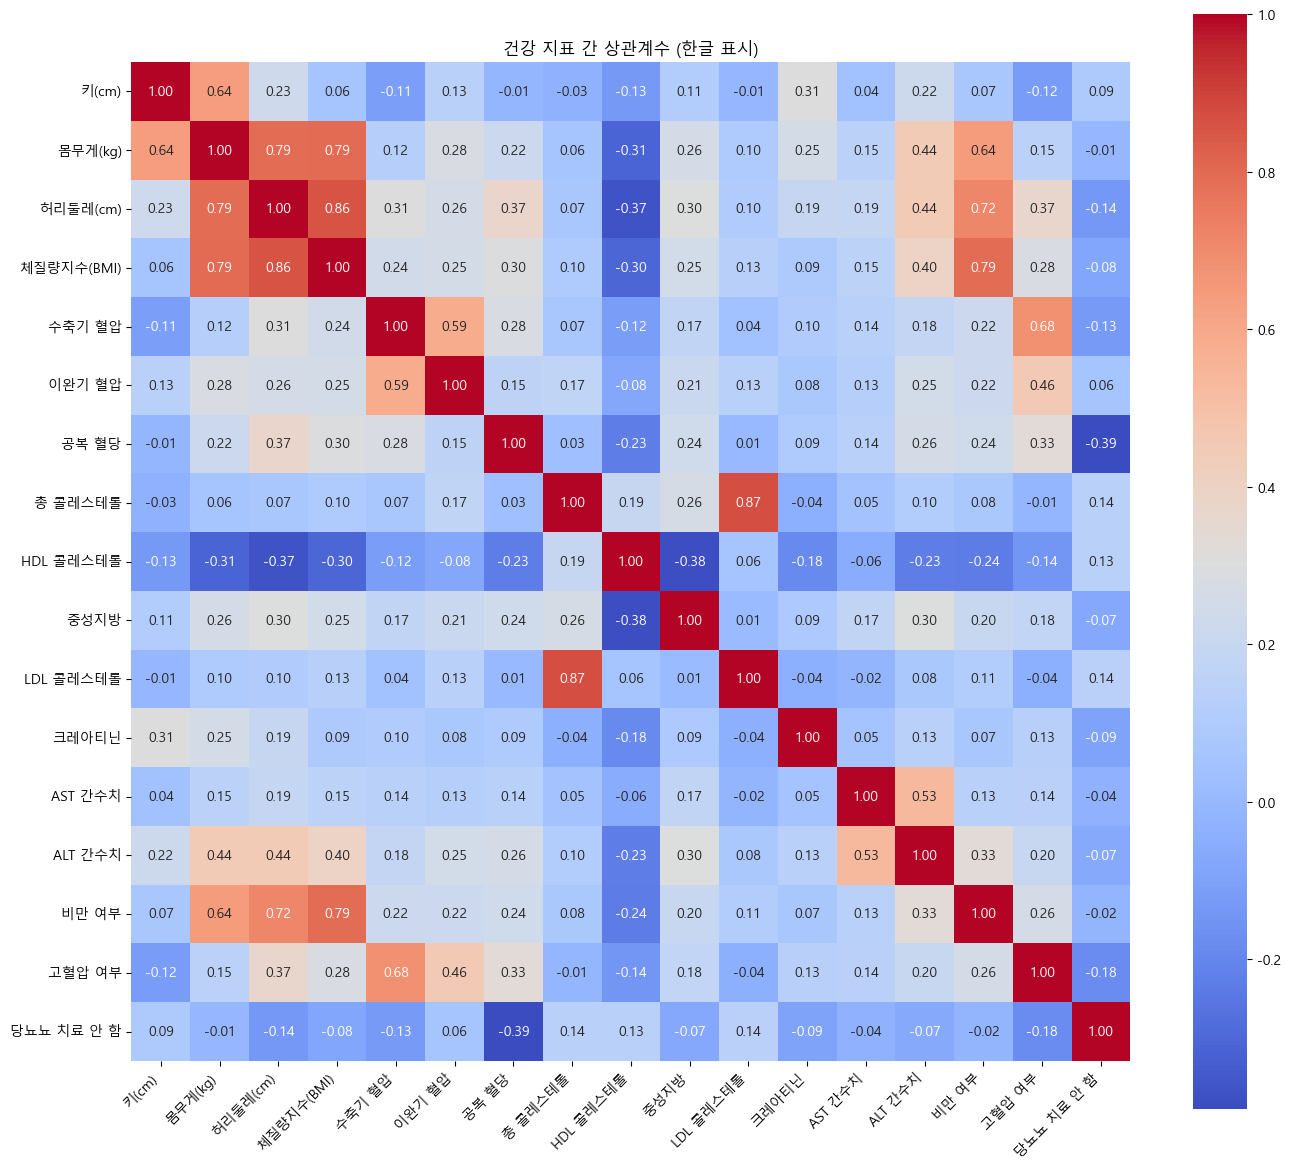

In [40]:
column_name_map = {
    'HE_ht': 'ÌÇ§(cm)',
    'HE_wt': 'Î™∏Î¨¥Í≤å(kg)',
    'HE_wc': 'ÌóàÎ¶¨ÎëòÎ†à(cm)',
    'HE_BMI': 'Ï≤¥ÏßàÎüâÏßÄÏàò(BMI)',
    'HE_sbp1': 'ÏàòÏ∂ïÍ∏∞ ÌòàÏïï',
    'HE_dbp1': 'Ïù¥ÏôÑÍ∏∞ ÌòàÏïï',
    'HE_glu': 'Í≥µÎ≥µ ÌòàÎãπ',
    'HE_chol': 'Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_HDL_st2': 'HDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_TG': 'Ï§ëÏÑ±ÏßÄÎ∞©',
    'HE_LDL_drct': 'LDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_crea': 'ÌÅ¨Î†àÏïÑÌã∞Îãå',
    'HE_ast': 'AST Í∞ÑÏàòÏπò',
    'HE_alt': 'ALT Í∞ÑÏàòÏπò',
    'HE_obe': 'ÎπÑÎßå Ïó¨Î∂Ä',
    'HE_HP': 'Í≥†ÌòàÏïï Ïó¨Î∂Ä',
    'DE1_3' : 'ÎãπÎá®Îá® ÏπòÎ£å Ïïà Ìï®'
}


correlation_columns = [
    'HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1', 'HE_glu', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt', 'DE1_3'
]

import seaborn as sns
import matplotlib.pyplot as plt

# Î≥¥Í≥† Ïã∂ÏùÄ Î≥ÄÏàòÎßå Ï∂îÏ∂ú
selected_columns = list(column_name_map.keys())
correlation_matrix = data[selected_columns].corr()

# Ïª¨ÎüºÎ™ÖÏùÑ ÌïúÍ∏ÄÎ°ú Î≥ÄÌôò
correlation_matrix.columns = [column_name_map[col] for col in correlation_matrix.columns]
correlation_matrix.index = [column_name_map[col] for col in correlation_matrix.index]

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Í±¥Í∞ï ÏßÄÌëú Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò (ÌïúÍ∏Ä ÌëúÏãú)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

üìä ÌÉÄÍ≤ü Î≥ÄÏàò ÏÉÅÍ¥Ä Î∂ÑÏÑù - ÎãπÎá®Î≥ë


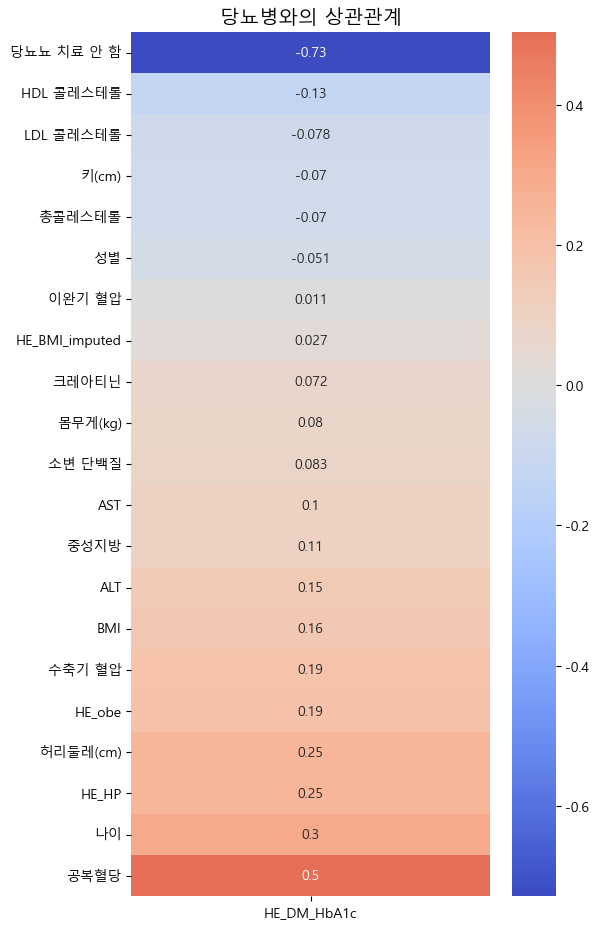

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Î≥ÄÏàò Ïù¥Î¶Ñ -> ÌïúÍ∏Ä Îß§Ìïë ÏÇ¨Ï†Ñ
feature_name_ko = {
    'HE_ht': 'ÌÇ§(cm)', 'HE_wt': 'Î™∏Î¨¥Í≤å(kg)', 'HE_wc': 'ÌóàÎ¶¨ÎëòÎ†à(cm)', 'HE_BMI': 'BMI',
    'HE_sbp1': 'ÏàòÏ∂ïÍ∏∞ ÌòàÏïï', 'HE_dbp1': 'Ïù¥ÏôÑÍ∏∞ ÌòàÏïï',
    'HE_Upro': 'ÏÜåÎ≥Ä Îã®Î∞±Ïßà', 'HE_glu': 'Í≥µÎ≥µÌòàÎãπ', 'HE_chol': 'Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_HDL_st2': 'HDL ÏΩúÎ†àÏä§ÌÖåÎ°§', 'HE_TG': 'Ï§ëÏÑ±ÏßÄÎ∞©', 'HE_LDL_drct': 'LDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_crea': 'ÌÅ¨Î†àÏïÑÌã∞Îãå', 'HE_ast': 'AST', 'HE_alt': 'ALT',
    'sex': 'ÏÑ±Î≥Ñ', 'age': 'ÎÇòÏù¥',
    'DE1_3' : 'ÎãπÎá®Îá® ÏπòÎ£å Ïïà Ìï®'
}

# ÌÉÄÍ≤ü Ïù¥Î¶Ñ -> ÌïúÍ∏Ä Îß§Ìïë
target_name_ko = {

    'HE_DM_HbA1c': 'ÎãπÎá®Î≥ë'
}

# Ï†úÏô∏Ìï† Ïª¨Îüº
exclude_cols = ['year', 'ID', 'DE1_dg', 'DI1_dg'] + list(target_name_ko.keys())

# input features ÏûêÎèô ÏßÄÏ†ï
input_features = [col for col in data.columns if col not in exclude_cols]

for target in target_name_ko.keys():
    print(f"üìä ÌÉÄÍ≤ü Î≥ÄÏàò ÏÉÅÍ¥Ä Î∂ÑÏÑù - {target_name_ko[target]}")
    
    # ÏàòÏπòÌòï Î≥ÄÏàòÎßå Ìè¨Ìï®Ìïú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
    subset = data[input_features + [target]].copy()
    subset = subset.select_dtypes(include='number')

    # ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
    corr_with_target = subset.corr()[[target]].drop(index=target)
    corr_with_target = corr_with_target.sort_values(by=target, ascending=True)

    # ÌïúÍ∏Ä ÎùºÎ≤®Î°ú Ïù∏Îç±Ïä§ Î≥ÄÌôò
    corr_with_target.index = [feature_name_ko.get(col, col) for col in corr_with_target.index]

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(6, len(corr_with_target) * 0.4 + 1))
    sns.heatmap(corr_with_target, annot=True, cmap='coolwarm', center=0)
    plt.title(f"{target_name_ko[target]}ÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ", fontsize=14)
    plt.tight_layout()
    plt.show()


Í∞ÄÏÑ§ : Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÎäî ÎãπÎá®Ïù∏Îç∞ ÎãπÎá®Îá®ÏπòÎ£åÌïú ÏÇ¨ÎûåÏùò ÏàòÏπòÍ∞Ä Íª¥ÏûàÏñ¥ Î≥ÄÏàòÎì§Í∞ÑÏóê ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Î∞©Ìï¥ÌïúÎã§. ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º ÌôïÏù∏Ìï¥ Î≥¥Îãà Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º Îã§Î•ºÍ≤ÉÏù¥ ÏóÜÎã§.

**Ï†ÑÏ≤¥ÎÖÑÎèÑ Î™®Îç∏ ÌÖåÏä§Ìä∏**

In [16]:
data = pd.read_csv("C:/Í±¥Í∞ïÍ≤ÄÏßÑ/health_checkup/JDM/2012ÎÖÑ~2023ÎÖÑ/Í±¥Í∞ïÏ°∞ÏÇ¨_2012~2023.csv")

In [7]:
data.shape

(91028, 1477)

EDA

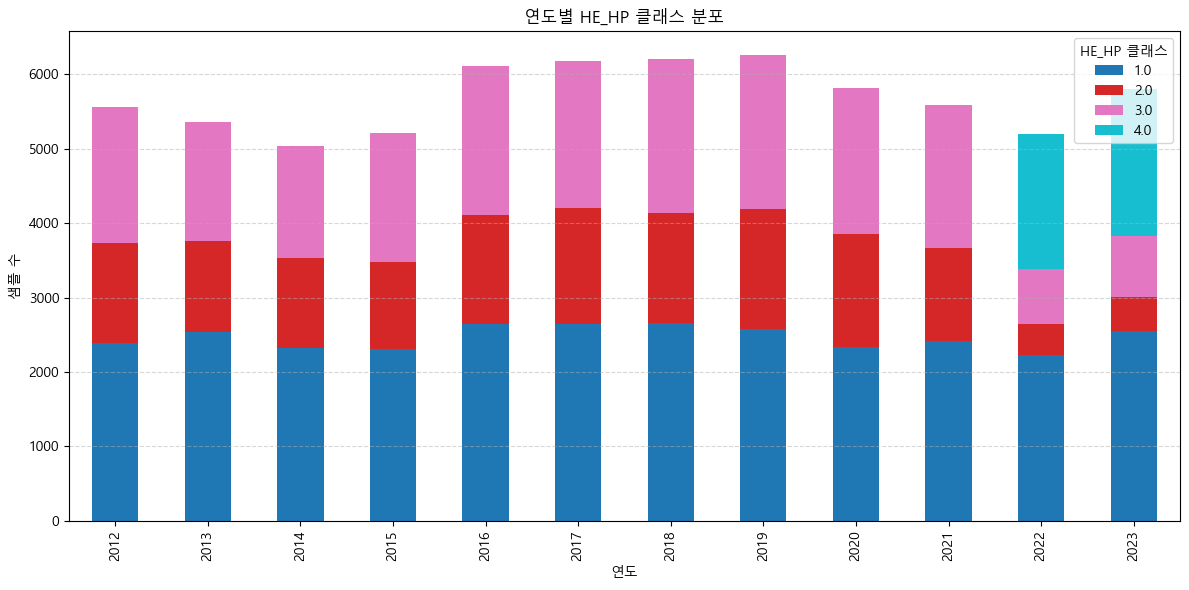

HE_HP   1.0   2.0   3.0   4.0
year                         
2012   2394  1341  1830     0
2013   2543  1215  1594     0
2014   2325  1201  1505     0
2015   2304  1174  1726     0
2016   2641  1469  1995     0
2017   2646  1554  1978     0
2018   2659  1480  2061     0
2019   2571  1615  2075     0
2020   2329  1520  1960     0
2021   2416  1252  1924     0
2022   2223   418   737  1824
2023   2549   464   815  1979


In [70]:
import pandas as pd
import matplotlib.pyplot as plt


# Ïó∞ÎèÑÎ≥Ñ HE_HP Î∂ÑÌè¨ Í≥ÑÏÇ∞
year_class_counts = data.groupby("year")["HE_HP"].value_counts().unstack(fill_value=0)

# ÌûàÌä∏Îßµ ÎòêÎäî Ïä§ÌÉù Î∞îÏ∞®Ìä∏Î°ú ÏãúÍ∞ÅÌôî
year_class_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")
plt.title("Ïó∞ÎèÑÎ≥Ñ HE_HP ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨")
plt.xlabel("Ïó∞ÎèÑ")
plt.ylabel("ÏÉòÌîå Ïàò")
plt.legend(title="HE_HP ÌÅ¥ÎûòÏä§")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ÏàòÏπò ÌôïÏù∏
print(year_class_counts)

ÏùòÎ£å Í∏∞Ï§ÄÏù¥ Î∞îÎÄåÏóàÍ±∞ÎÇò, Í≥†ÎèÑ Í≥†ÌòàÏïï Îì± Ï∂îÍ∞Ä ÏÑ∏Î∂ÑÌôîÎêú Î∂ÑÎ•òÍ∞Ä ÏÉùÍ∏¥ Í≤É

Ï¶â, 2012‚Äì2021ÎÖÑ Îç∞Ïù¥ÌÑ∞Ïóî ÏõêÎûòÎ∂ÄÌÑ∞ Class 4Í∞Ä ÏóÜÏóàÎçò Í≤É ‚Üí Ï†ïÏÉÅÏûÖÎãàÎã§

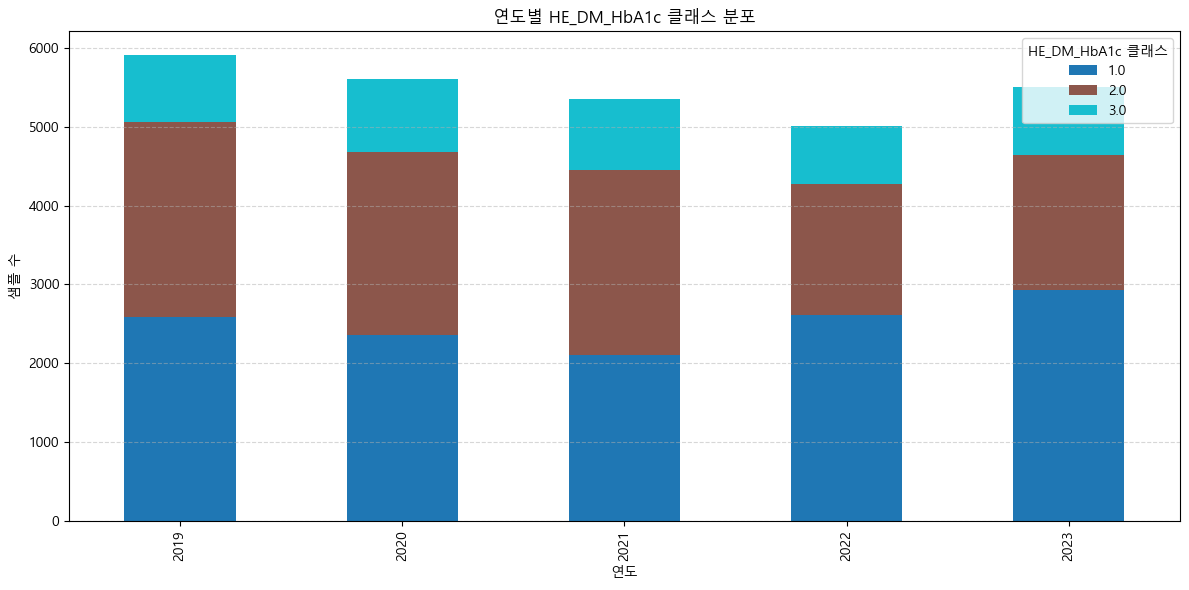

HE_DM_HbA1c   1.0   2.0  3.0
year                        
2019         2583  2480  851
2020         2357  2319  936
2021         2101  2347  899
2022         2614  1655  738
2023         2925  1719  860


In [71]:
import pandas as pd
import matplotlib.pyplot as plt


# Ïó∞ÎèÑÎ≥Ñ HE_HP Î∂ÑÌè¨ Í≥ÑÏÇ∞
year_class_counts = data.groupby("year")["HE_DM_HbA1c"].value_counts().unstack(fill_value=0)

# ÌûàÌä∏Îßµ ÎòêÎäî Ïä§ÌÉù Î∞îÏ∞®Ìä∏Î°ú ÏãúÍ∞ÅÌôî
year_class_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")
plt.title("Ïó∞ÎèÑÎ≥Ñ HE_DM_HbA1c ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨")
plt.xlabel("Ïó∞ÎèÑ")
plt.ylabel("ÏÉòÌîå Ïàò")
plt.legend(title="HE_DM_HbA1c ÌÅ¥ÎûòÏä§")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ÏàòÏπò ÌôïÏù∏
print(year_class_counts)

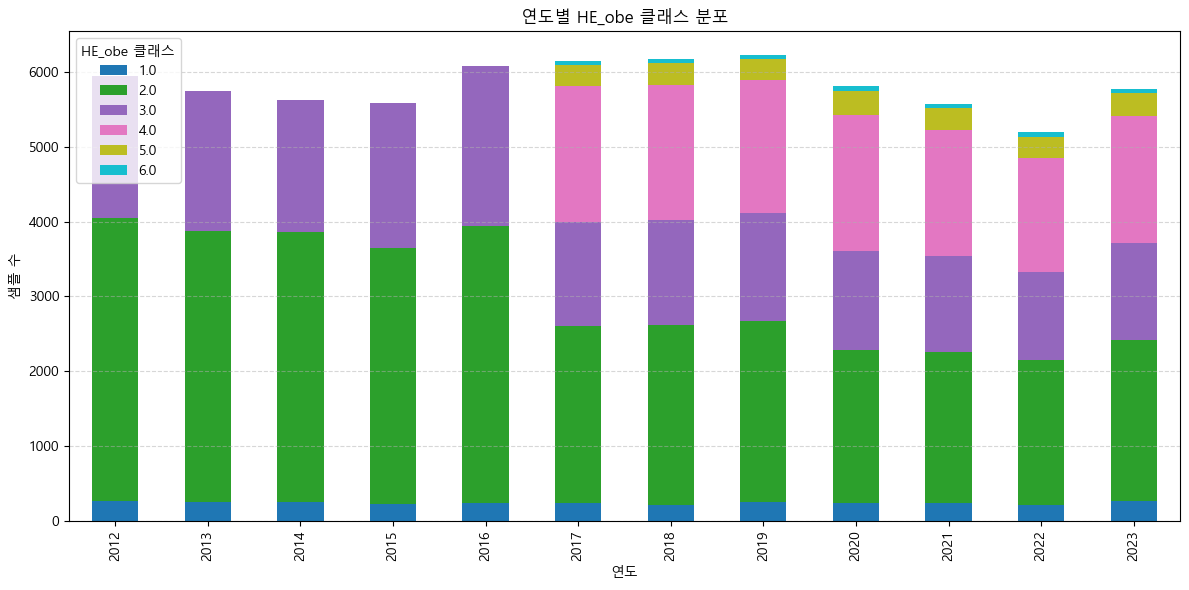

HE_obe  1.0   2.0   3.0   4.0  5.0  6.0
year                                   
2012    267  3778  1897     0    0    0
2013    257  3620  1871     0    0    0
2014    248  3609  1775     0    0    0
2015    221  3423  1948     0    0    0
2016    234  3709  2135     0    0    0
2017    244  2368  1389  1817  281   51
2018    215  2400  1413  1801  296   45
2019    249  2430  1432  1778  288   55
2020    240  2044  1330  1811  326   64
2021    244  2015  1281  1684  297   53
2022    207  1950  1175  1521  285   59
2023    264  2156  1293  1707  304   56


In [72]:
import pandas as pd
import matplotlib.pyplot as plt


# Ïó∞ÎèÑÎ≥Ñ HE_HP Î∂ÑÌè¨ Í≥ÑÏÇ∞
year_class_counts = data.groupby("year")["HE_obe"].value_counts().unstack(fill_value=0)

# ÌûàÌä∏Îßµ ÎòêÎäî Ïä§ÌÉù Î∞îÏ∞®Ìä∏Î°ú ÏãúÍ∞ÅÌôî
year_class_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="tab10")
plt.title("Ïó∞ÎèÑÎ≥Ñ HE_obe ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨")
plt.xlabel("Ïó∞ÎèÑ")
plt.ylabel("ÏÉòÌîå Ïàò")
plt.legend(title="HE_obe ÌÅ¥ÎûòÏä§")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ÏàòÏπò ÌôïÏù∏
print(year_class_counts)

In [85]:
data = pd.read_csv("C:/Í±¥Í∞ïÍ≤ÄÏßÑ/health_checkup/JDM/2012ÎÖÑ~2023ÎÖÑ/Í±¥Í∞ïÏ°∞ÏÇ¨_2022_2023_ÌÜµÌï©.csv") 

In [86]:
data.shape

(13194, 676)

In [87]:
data

mod_d             ID       ID_fam    year  region  town_t  \
0      b'2024.01.11.'  b'YA01220302'  b'YA012203'  2022.0     1.0     1.0   
1      b'2024.01.11.'  b'YA01220303'  b'YA012203'  2022.0     1.0     1.0   
2      b'2024.01.11.'  b'YA01220304'  b'YA012203'  2022.0     1.0     1.0   
3      b'2024.01.11.'  b'YA01236501'  b'YA012365'  2022.0     1.0     1.0   
4      b'2024.01.11.'  b'YA01236502'  b'YA012365'  2022.0     1.0     1.0   
...               ...            ...          ...     ...     ...     ...   
13189  b'2024.12.10.'  b'YR62368101'  b'YR623681'  2023.0     8.0     2.0   
13190  b'2024.12.10.'  b'YR62368102'  b'YR623681'  2023.0     8.0     2.0   
13191  b'2024.12.10.'  b'YR62370201'  b'YR623702'  2023.0     8.0     2.0   
13192  b'2024.12.10.'  b'YR62394401'  b'YR623944'  2023.0     8.0     2.0   
13193  b'2024.12.10.'  b'YR62432901'  b'YR624329'  2023.0     8.0     2.0   

       apt_t      psu  sex   age  age_month  incm  ho_incm  incm5  ho_incm5  \
0        2.0  b'YA01'  2.0  56.0        NaN   3.0      4.0    4.0       4.0   
1        2.0  b'YA01'  1.0  30.0        NaN   3.0      4.0    3.0       4.0   
2        2.0  b'YA01'  2.0  25.0        NaN   3.0      4.0    4.0       4.0   
3        2.0  b'YA01'  1.0  66.0        NaN   3.0      3.0    4.0       3.0   
4        2.0  b'YA01'  2.0  62.0        NaN   3.0      3.0    3.0       3.0   
...      ...      ...  ...   ...        ...   ...      ...    ...       ...   
13189    1.0  b'YR62'  1.0  80.0        NaN   2.0      1.0    2.0       1.0   
13190    1.0  b'YR62'  2.0  78.0        NaN   2.0      1.0    3.0       1.0   
13191    1.0  b'YR62'  2.0  61.0        NaN   1.0      1.0    1.0       1.0   
13192    1.0  b'YR62'  1.0  57.0        NaN   4.0      4.0    5.0       5.0   
13193    1.0  b'YR62'  1.0  49.0        NaN   3.0      4.0    4.0       4.0   

       edu  occp        wt_hs      wt_itvex         wt_oe        wt_bia  \
0      3.0   7.0  7834.391511   9090.322425  10783.493262  11291.368622   
1      4.0   3.0  7834.391511  13042.142562  20078.947634  19822.942221   
2      4.0   7.0  7834.391511   9895.727513  14566.872199  14931.827386   
3      4.0   7.0  7834.391511   6438.920648   7251.845005   7542.480144   
4      3.0   6.0  7834.391511   5593.752658   6857.115069   7064.391215   
...    ...   ...          ...           ...           ...           ...   
13189  1.0   7.0   785.950442    760.950348    723.703724           NaN   
13190  1.0   7.0   785.950442    667.207893    680.665511           NaN   
13191  3.0   3.0   785.950442    587.084863    680.665511           NaN   
13192  4.0   2.0   785.950442    878.813362   1048.873106           NaN   
13193  3.0   5.0   785.950442   2169.977067   1220.257164           NaN   

             wt_ntr        wt_tot       wt_oent      wt_biant  kstrata  cfam  \
0      10346.361689  10343.746528  11265.895141  11741.501904    101.0   4.0   
1      19763.950889  19666.742049  21352.961071  20820.115372    101.0   4.0   
2      14314.436646  14510.887963  15616.336412  15501.618290    101.0   4.0   
3       7068.650323   7051.216076   7843.924333   8088.513725    101.0   2.0   
4       6434.393479   6420.343834   7194.949559   7421.746687    101.0   2.0   
...             ...           ...           ...           ...      ...   ...   
13189    760.950348    707.587971    735.635810           NaN    120.0   2.0   
13190    665.183413    644.177446    685.236040           NaN    120.0   2.0   
13191    576.420570    644.177446    685.236040           NaN    120.0   2.0   
13192    897.111883   1040.379758   1069.458538           NaN    120.0   1.0   
13193   2118.855453   1180.934364   1225.401221           NaN    120.0   1.0   

       genertn  allownc  house  live_t  ainc_unit1   ainc_1        ainc  \
0          4.0     20.0    2.0     2.0         1.0   9300.0  775.000000   
1          4.0     20.0    2.0     2.0         1.0   9300.0  775.000000   
2          4.0     20.0    2.0     2.0         1.0   93

In [88]:
import pandas as pd

# ÎÇ®Í∏∞Í≥† Ïã∂ÏùÄ Ïª¨Îüº Î¶¨Ïä§Ìä∏
columns_to_keep = [
    'ID','year','age','sex','HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu', 'HE_chol', 'HE_HDL_st2', 'HE_HbA1c',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt',
    'HE_obe', 'HE_HP', 'HE_DM_HbA1c',
    'DE1_dg', 'DI1_dg',
]

# ÏõêÎûò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ dfÏùº Îïå
data = data[columns_to_keep]


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13194 entries, 0 to 13193
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           13194 non-null  object 
 1   year         13194 non-null  float64
 2   age          13194 non-null  float64
 3   sex          13194 non-null  float64
 4   HE_ht        12964 non-null  float64
 5   HE_wt        13104 non-null  float64
 6   HE_wc        12285 non-null  float64
 7   HE_BMI       12959 non-null  float64
 8   HE_sbp1      12490 non-null  float64
 9   HE_dbp1      12490 non-null  float64
 10  HE_Upro      11828 non-null  float64
 11  HE_glu       11744 non-null  float64
 12  HE_chol      11744 non-null  float64
 13  HE_HDL_st2   11744 non-null  float64
 14  HE_HbA1c     11710 non-null  float64
 15  HE_TG        11744 non-null  float64
 16  HE_LDL_drct  11744 non-null  float64
 17  HE_crea      11744 non-null  float64
 18  HE_ast       11743 non-null  float64
 19  HE_a

In [10]:
column_mapping = {
    'ID': 'ID',
    'year': 'year(Ï°∞ÏÇ¨Ïó∞ÎèÑ)',
    'age': 'age(Ïó∞Î†π)',
    'sex': 'sex(ÏÑ±Î≥Ñ)',
    'HE_ht': 'HE_ht(Ïã†Ïû•(cm))',
    'HE_wt': 'HE_wt(Ï≤¥Ï§ë(kg))',
    'HE_wc': 'HE_wc(ÌóàÎ¶¨ÎëòÎ†à(cm))',
    'HE_BMI': 'HE_BMI(Ï≤¥ÏßàÎüâÏßÄÏàò)',
    'HE_sbp1': 'HE_sbp1(ÏàòÏ∂ïÍ∏∞ ÌòàÏïï)',
    'HE_dbp1': 'HE_dbp1(Ïù¥ÏôÑÍ∏∞ ÌòàÏïï)',
    'HE_Upro': 'HE_Upro(ÏÜåÎ≥Ä Îã®Î∞±)',
    'HE_glu': 'HE_glu(Í≥µÎ≥µÌòàÎãπ)',
    'HE_HbA1c' : 'HE_HbA1c(ÎãπÌôîÌòàÏÉâÏÜå)',
    'HE_chol': 'HE_chol(Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§)',
    'HE_HDL_st2': 'HE_HDL_st2(HDL ÏΩúÎ†àÏä§ÌÖåÎ°§)',
    'HE_TG': 'HE_TG(Ï§ëÏÑ±ÏßÄÎ∞©)',
    'HE_LDL_drct': 'HE_LDL_drct(LDL ÏΩúÎ†àÏä§ÌÖåÎ°§)',
    'HE_crea': 'HE_crea(ÌÅ¨Î†àÏïÑÌã∞Îãå)',
    'HE_ast': 'HE_ast(AST (Í∞ÑÍ∏∞Îä•))',
    'HE_alt': 'HE_alt(ALT (Í∞ÑÍ∏∞Îä•))',
    'HE_obe': 'HE_obe(ÎπÑÎßå Ïó¨Î∂Ä)',
    'HE_HP': 'HE_HP(Í≥†ÌòàÏïï Ïó¨Î∂Ä)',
    'DI1_dg': 'DI1_dg(Í≥†ÌòàÏïï ÏùòÏÇ¨ÏßÑÎã® Ïó¨Î∂Ä)',
    'HE_DM_HbA1c': 'HE_DM_HbA1c(ÎãπÎá® Ïó¨Î∂Ä (HbA1c))',
    'DE1_dg': 'DE1_dg(ÎãπÎá®Î≥ë ÏùòÏÇ¨ÏßÑÎã® Ïó¨Î∂Ä)',
    'DE1_pt': 'DE1_pt(ÎãπÎá®Î≥ëÏπòÎ£åÏó¨Î∂Ä)',
    'DI1_pt': 'DI1_pt(Í≥†ÌòàÏïïÏπòÎ£åÏó¨Î∂Ä)'
    
}

# 1. ÏòÅÏñ¥ Ïª¨Îüº ÏàúÏÑú (ÏõêÌïòÎäî ÏàúÏÑú)
original_columns = [
    'ID','year','age','sex','HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1','HE_Upro', 'HE_glu','HE_HbA1c', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt',
    'HE_obe', 'HE_HP', 'DI1_dg', 'HE_DM_HbA1c','DE1_dg', 'DE1_pt', 'DI1_pt'
]

# 2. ÌïúÍ∏Ä Îß§ÌïëÎêú Ïª¨Îüº Î¶¨Ïä§Ìä∏ ÎßåÎì§Í∏∞
kor_columns = [column_mapping[col] for col in original_columns]

# 3. Ïª¨ÎüºÎ™Ö ÌïúÍ∏ÄÎ°ú Î∞îÍæ∏Í∏∞
data = data.rename(columns=column_mapping)

# 4. ÏõêÌïòÎäî ÏàúÏÑúÎ°ú Ïû¨Ï†ïÎ†¨
data = data[kor_columns]

**Îç∞Ïù¥ÌÑ∞ ÌÜµÍ≥ÑÌôïÏù∏**

In [ ]:
data

In [11]:
data.describe()

year(Ï°∞ÏÇ¨Ïó∞ÎèÑ)       age(Ïó∞Î†π)       sex(ÏÑ±Î≥Ñ)  HE_ht(Ïã†Ïû•(cm))  HE_wt(Ï≤¥Ï§ë(kg))  \
count  91028.000000  91028.000000  91028.000000   86573.000000   86973.000000   
mean    2017.325460     43.727414      1.545689     157.812552      58.848904   
std        3.399379     22.740948      0.497911      18.199830      17.616049   
min     2012.000000      1.000000      1.000000      69.700000       7.369000   
25%     2014.000000     25.000000      1.000000     153.300000      51.000000   
50%     2017.000000     46.000000      2.000000     160.900000      59.700000   
75%     2020.000000     62.000000      2.000000     168.700000      69.400000   
max     2023.000000     80.000000      2.000000     198.000000     164.800000   

       HE_wc(ÌóàÎ¶¨ÎëòÎ†à(cm))  HE_BMI(Ï≤¥ÏßàÎüâÏßÄÏàò)  HE_sbp1(ÏàòÏ∂ïÍ∏∞ ÌòàÏïï)  HE_dbp1(Ïù¥ÏôÑÍ∏∞ ÌòàÏïï)  \
count     85125.000000   86548.000000     78843.000000     78843.000000   
mean         79.182505      22.947594       119.637875        74.367325   
std          13.433796       4.187423        17.266174        10.895144   
min          34.500000       9.637899        60.000000         0.000000   
25%          71.200000      20.258022       108.000000        67.000000   
50%          80.200000      22.939689       118.000000        74.000000   
75%          88.300000      25.516647       130.000000        82.000000   
max         147.500000      62.640542       244.000000       152.000000   

       HE_Upro(ÏÜåÎ≥Ä Îã®Î∞±)  HE_glu(Í≥µÎ≥µÌòàÎãπ)  HE_HbA1c(ÎãπÌôîÌòàÏÉâÏÜå)  HE_chol(Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§)  \
count    73887.000000  74181.000000     74006.000000      74201.000000   
mean         0.160651    100.262776         5.717795        187.170146   
std          0.470944     22.922333         0.791352         37.914666   
min          0.000000     40.000000         3.100000         64.000000   
25%          0.000000     89.000000         5.300000        161.000000   
50%          0.000000     95.000000         5.500000        185.000000   
75%          0.000000    103.000000         5.900000        211.000000   
max          5.000000    553.000000        17.600000        525.000000   

       HE_HDL_st2(HDL ÏΩúÎ†àÏä§ÌÖåÎ°§)   HE_TG(Ï§ëÏÑ±ÏßÄÎ∞©)  HE_LDL_drct(LDL ÏΩúÎ†àÏä§ÌÖåÎ°§)  \
count           74189.000000  74201.000000            25389.000000   
mean               52.277081    128.339578              113.145929   
std                13.030777    102.793233               35.114645   
min                 5.918000      9.000000               10.000000   
25%                43.000000     71.000000               88.000000   
50%                51.000000    103.000000              111.000000   
75%                60.000000    153.000000              136.000000   
max               145.298000   3367.000000              394.000000   

       HE_crea(ÌÅ¨Î†àÏïÑÌã∞Îãå)  HE_ast(AST (Í∞ÑÍ∏∞Îä•))  HE_alt(ALT (Í∞ÑÍ∏∞Îä•))  HE_obe(ÎπÑÎßå Ïó¨Î∂Ä)  \
count    74201.000000       74200.000000       74167.000000   69910.000000   
mean         0.806015          23.072844          21.733493       2.687312   
std          0.263779          13.997863          19.212834       0.942500   
min          0.200000           5.000000           1.000000       1.000000   
25%          0.660000          17.000000          12.000000       2.000000   
50%          0.770000          21.000000          17.000000       2.000000   
75%          0.920000          25.000000          25.000000       3.000000   
max         17.530000         927.000000         861.000000       6.000000   

       HE_HP(Í≥†ÌòàÏïï Ïó¨Î∂Ä)  DI1_dg(Í≥†ÌòàÏïï ÏùòÏÇ¨ÏßÑÎã® Ïó¨Î∂Ä)  HE_DM_HbA1c(ÎãπÎá® Ïó¨Î∂Ä (HbA1c))  \
count   68306.000000         86260.000000                27384.000000   
mean        1.973736             2.217030                    1.697049   
std         0.975244             3.391431                    0.723930   
min         1.000000             0.000000                    1.000000   
25%         1.000000             0.000000  

In [12]:
# 3Ô∏è‚É£ EDA ÏöîÏïΩ (Í≤∞Ï∏°Ïπò, ÌÜµÍ≥ÑÍ∞í, Ïù¥ÏÉÅÏπò)


# Ïù¥ÏÉÅÏπò ÎπÑÏú® Í≥ÑÏÇ∞ Ìï®Ïàò
def detect_outlier_ratio(series):
    if series.dtype.kind in 'biufc':
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outlier_ratio = ((series < lower) | (series > upper)).mean() * 100
        return outlier_ratio
    else:
        return np.nan
    
eda = pd.DataFrame(index=data.columns)
eda['Í≥†Ïú†Í∞í Í∞úÏàò'] = data.nunique()
eda['Í≤∞Ï∏°Ïπò ÎπÑÏú® (%)'] = data.isnull().mean() * 100
eda['Ïù¥ÏÉÅÏπò ÎπÑÏú® (%)'] = data.apply(detect_outlier_ratio)
eda['ÏµúÏÜåÍ∞í'] = data.min(numeric_only=True)
eda['ÏµúÎåÄÍ∞í'] = data.max(numeric_only=True)
eda['ÌèâÍ∑†'] = data.mean(numeric_only=True)
eda['ÌëúÏ§ÄÌé∏Ï∞®'] = data.std(numeric_only=True)

eda

Í≥†Ïú†Í∞í Í∞úÏàò  Í≤∞Ï∏°Ïπò ÎπÑÏú® (%)  Ïù¥ÏÉÅÏπò ÎπÑÏú® (%)          ÏµúÏÜåÍ∞í  \
ID                           60022   34.062047         NaN          NaN   
year(Ï°∞ÏÇ¨Ïó∞ÎèÑ)                      12    0.000000    0.000000  2012.000000   
age(Ïó∞Î†π)                         80    0.000000    0.000000     1.000000   
sex(ÏÑ±Î≥Ñ)                          2    0.000000    0.000000     1.000000   
HE_ht(Ïã†Ïû•(cm))                 1283    4.894099    7.359274    69.700000   
HE_wt(Ï≤¥Ï§ë(kg))                 2158    4.454673    7.053874     7.369000   
HE_wc(ÌóàÎ¶¨ÎëòÎ†à(cm))                887    6.484818    1.486356    34.500000   
HE_BMI(Ï≤¥ÏßàÎüâÏßÄÏàò)                65229    4.921563    1.204025     9.637899   
HE_sbp1(ÏàòÏ∂ïÍ∏∞ ÌòàÏïï)                149   13.385991    1.645647    60.000000   
HE_dbp1(Ïù¥ÏôÑÍ∏∞ ÌòàÏïï)                107   13.385991    0.875555     0.000000   
HE_Upro(ÏÜåÎ≥Ä Îã®Î∞±)                   6   18.830470   10.312212     0.000000   
HE_glu(Í≥µÎ≥µÌòàÎãπ)                   312   18.507492    6.746276    40.000000   
HE_HbA1c(ÎãπÌôîÌòàÏÉâÏÜå)                117   18.699741    5.162148     3.100000   
HE_chol(Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§)               317   18.485521    0.865668    64.000000   
HE_HDL_st2(HDL ÏΩúÎ†àÏä§ÌÖåÎ°§)         2467   18.498704    1.374302     5.918000   
HE_TG(Ï§ëÏÑ±ÏßÄÎ∞©)                    915   18.485521    4.519489     9.000000   
HE_LDL_drct(LDL ÏΩúÎ†àÏä§ÌÖåÎ°§)         244   72.108582    0.204333    10.000000   
HE_crea(ÌÅ¨Î†àÏïÑÌã∞Îãå)                 281   18.485521    1.199631     0.200000   
HE_ast(AST (Í∞ÑÍ∏∞Îä•))              213   18.486620    4.815002     5.000000   
HE_alt(ALT (Í∞ÑÍ∏∞Îä•))              253   18.522872    5.301665     1.000000   
HE_obe(ÎπÑÎßå Ïó¨Î∂Ä)                    6   23.199455    2.702465     1.000000   
HE_HP(Í≥†ÌòàÏïï Ïó¨Î∂Ä)                    4   24.961550    0.000000     1.000000   
DI1_dg(Í≥†ÌòàÏïï ÏùòÏÇ¨ÏßÑÎã® Ïó¨Î∂Ä)              4    5.237949    0.000000     0.000000   
HE_DM_HbA1c(ÎãπÎá® Ïó¨Î∂Ä (HbA1c))       3   69.916949    0.000000     1.000000   
DE1_dg(ÎãπÎá®Î≥ë ÏùòÏÇ¨ÏßÑÎã® Ïó¨Î∂Ä)              4    5.237949   20.683746     0.000000   
DE1_pt(ÎãπÎá®Î≥ëÏπòÎ£åÏó¨Î∂Ä)                  4    5.237949    8.911544     0.000000   
DI1_pt(Í≥†ÌòàÏïïÏπòÎ£åÏó¨Î∂Ä)                  4    5.237949   20.434372     0.000000   

                                    ÏµúÎåÄÍ∞í           ÌèâÍ∑†        ÌëúÏ§ÄÌé∏Ï∞®  
ID                                  NaN          NaN         NaN  
year(Ï°∞ÏÇ¨Ïó∞ÎèÑ)                  2023.000000  2017.325460    3.399379  
age(Ïó∞Î†π)                       80.000000    43.727414   22.740948  
sex(ÏÑ±Î≥Ñ)                        2.000000     1.545689    0.497911  
HE_ht(Ïã†Ïû•(cm))                198.000000   157.812552   18.199830  
HE_wt(Ï≤¥Ï§ë(kg))                164.800000    58.848904   17.616049  
HE_wc(ÌóàÎ¶¨ÎëòÎ†à(cm))              147.500000    79.182505   13.433796  
HE_BMI(Ï≤¥ÏßàÎüâÏßÄÏàò)                 62.640542    22.947594    4.187423  
HE_sbp1(ÏàòÏ∂ïÍ∏∞ ÌòàÏïï)              244.000000   119.637875   17.266174  
HE_dbp1(Ïù¥ÏôÑÍ∏∞ ÌòàÏïï)              152.000000    74.367325   10.895144  
HE_Upro(ÏÜåÎ≥Ä Îã®Î∞±)                 5.000000     0.160651    0.470944  
HE_glu(Í≥µÎ≥µÌòàÎãπ)                 553.000000   100.262776   22.922333  
HE_HbA1c(ÎãπÌôîÌòàÏÉâÏÜå)               17.600000     5.717795    0.791352  
HE_chol(Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§)             525.000000   187.170146   37.914666  
HE_HDL_st2(HDL ÏΩúÎ†àÏä§ÌÖåÎ°§)        145.298000    52.277081   13.030777  
HE_TG(Ï§ëÏÑ±ÏßÄÎ∞©)                 3367.000000   128.339578  102.793233  
HE_LDL_drct(LDL ÏΩúÎ†àÏä§ÌÖåÎ°§)       394.000000   113.145929   35.114645  
HE_crea(ÌÅ¨Î†àÏïÑÌã∞Îãå)                17.530000     0.806015    0.263779  
HE_ast(AST (Í∞ÑÍ∏∞Îä•))            927.000000    23.072844   13.997863  
HE_alt(ALT (Í∞ÑÍ∏∞Îä•))            861.000000    21.733493   19.212834  
HE_obe(ÎπÑÎßå Ïó¨Î∂Ä)                  6.000000     2.687312    0.942500  
H

In [14]:
data = pd.read_csv("C:/Í±¥Í∞ïÍ≤ÄÏßÑ/health_checkup/JDM/2012ÎÖÑ~2023ÎÖÑ/Í±¥Í∞ïÏ°∞ÏÇ¨_2022_2023_ÌÜµÌï©.csv") 

In [97]:
data

mod_d             ID       ID_fam    year  region  town_t  \
0      b'2024.01.11.'  b'YA01220302'  b'YA012203'  2022.0     1.0     1.0   
1      b'2024.01.11.'  b'YA01220303'  b'YA012203'  2022.0     1.0     1.0   
2      b'2024.01.11.'  b'YA01220304'  b'YA012203'  2022.0     1.0     1.0   
3      b'2024.01.11.'  b'YA01236501'  b'YA012365'  2022.0     1.0     1.0   
4      b'2024.01.11.'  b'YA01236502'  b'YA012365'  2022.0     1.0     1.0   
...               ...            ...          ...     ...     ...     ...   
13189  b'2024.12.10.'  b'YR62368101'  b'YR623681'  2023.0     8.0     2.0   
13190  b'2024.12.10.'  b'YR62368102'  b'YR623681'  2023.0     8.0     2.0   
13191  b'2024.12.10.'  b'YR62370201'  b'YR623702'  2023.0     8.0     2.0   
13192  b'2024.12.10.'  b'YR62394401'  b'YR623944'  2023.0     8.0     2.0   
13193  b'2024.12.10.'  b'YR62432901'  b'YR624329'  2023.0     8.0     2.0   

       apt_t      psu  sex   age  age_month  incm  ho_incm  incm5  ho_incm5  \
0        2.0  b'YA01'  2.0  56.0        NaN   3.0      4.0    4.0       4.0   
1        2.0  b'YA01'  1.0  30.0        NaN   3.0      4.0    3.0       4.0   
2        2.0  b'YA01'  2.0  25.0        NaN   3.0      4.0    4.0       4.0   
3        2.0  b'YA01'  1.0  66.0        NaN   3.0      3.0    4.0       3.0   
4        2.0  b'YA01'  2.0  62.0        NaN   3.0      3.0    3.0       3.0   
...      ...      ...  ...   ...        ...   ...      ...    ...       ...   
13189    1.0  b'YR62'  1.0  80.0        NaN   2.0      1.0    2.0       1.0   
13190    1.0  b'YR62'  2.0  78.0        NaN   2.0      1.0    3.0       1.0   
13191    1.0  b'YR62'  2.0  61.0        NaN   1.0      1.0    1.0       1.0   
13192    1.0  b'YR62'  1.0  57.0        NaN   4.0      4.0    5.0       5.0   
13193    1.0  b'YR62'  1.0  49.0        NaN   3.0      4.0    4.0       4.0   

       edu  occp        wt_hs      wt_itvex         wt_oe        wt_bia  \
0      3.0   7.0  7834.391511   9090.322425  10783.493262  11291.368622   
1      4.0   3.0  7834.391511  13042.142562  20078.947634  19822.942221   
2      4.0   7.0  7834.391511   9895.727513  14566.872199  14931.827386   
3      4.0   7.0  7834.391511   6438.920648   7251.845005   7542.480144   
4      3.0   6.0  7834.391511   5593.752658   6857.115069   7064.391215   
...    ...   ...          ...           ...           ...           ...   
13189  1.0   7.0   785.950442    760.950348    723.703724           NaN   
13190  1.0   7.0   785.950442    667.207893    680.665511           NaN   
13191  3.0   3.0   785.950442    587.084863    680.665511           NaN   
13192  4.0   2.0   785.950442    878.813362   1048.873106           NaN   
13193  3.0   5.0   785.950442   2169.977067   1220.257164           NaN   

             wt_ntr        wt_tot       wt_oent      wt_biant  kstrata  cfam  \
0      10346.361689  10343.746528  11265.895141  11741.501904    101.0   4.0   
1      19763.950889  19666.742049  21352.961071  20820.115372    101.0   4.0   
2      14314.436646  14510.887963  15616.336412  15501.618290    101.0   4.0   
3       7068.650323   7051.216076   7843.924333   8088.513725    101.0   2.0   
4       6434.393479   6420.343834   7194.949559   7421.746687    101.0   2.0   
...             ...           ...           ...           ...      ...   ...   
13189    760.950348    707.587971    735.635810           NaN    120.0   2.0   
13190    665.183413    644.177446    685.236040           NaN    120.0   2.0   
13191    576.420570    644.177446    685.236040           NaN    120.0   2.0   
13192    897.111883   1040.379758   1069.458538           NaN    120.0   1.0   
13193   2118.855453   1180.934364   1225.401221           NaN    120.0   1.0   

       genertn  allownc  house  live_t  ainc_unit1   ainc_1        ainc  \
0          4.0     20.0    2.0     2.0         1.0   9300.0  775.000000   
1          4.0     20.0    2.0     2.0         1.0   9300.0  775.000000   
2          4.0     20.0    2.0     2.0         1.0   93

**Ïù¥ÏÉÅÏπò ÌôïÏù∏**
- ÎπÑÏú® 5%Ïù¥ÏÉÅÏù∏ Ïª¨ÎüºÎßå

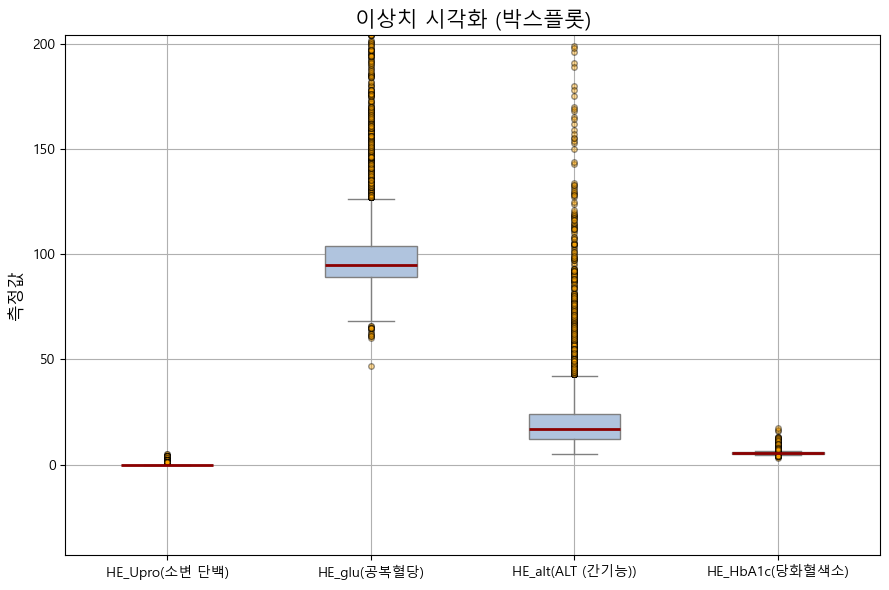

In [98]:
import matplotlib.pyplot as plt

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows ÏÇ¨Ïö©Ïûê Í∏∞Ï§Ä, ÌïÑÏöîÏãú Ï£ºÏÑù Ìï¥Ï†ú)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ

# ÏãúÍ∞ÅÌôîÏö© Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
columns_to_plot = ['HE_Upro', 'HE_glu', 'HE_alt', 'HE_HbA1c']
column_labels = {
    'HE_Upro': 'HE_Upro(ÏÜåÎ≥Ä Îã®Î∞±)',
    'HE_glu': 'HE_glu(Í≥µÎ≥µÌòàÎãπ)',
    'HE_alt': 'HE_alt(ALT (Í∞ÑÍ∏∞Îä•))',
    'HE_HbA1c' : 'HE_HbA1c(ÎãπÌôîÌòàÏÉâÏÜå)'
}
data_boxplot = data[columns_to_plot].copy()
data_boxplot.columns = [column_labels[col] for col in columns_to_plot]

# Î∞ïÏä§ÌîåÎ°Ø
plt.figure(figsize=(9, 6))
box = data_boxplot.boxplot(
    grid=True,
    patch_artist=True,
    boxprops=dict(facecolor='lightsteelblue', color='gray'),
    medianprops=dict(color='darkred', linewidth=2),
    flierprops=dict(marker='o', markerfacecolor='orange', markersize=4, alpha=0.4),
    whiskerprops=dict(color='gray'),
    capprops=dict(color='gray')
)

# Ï†úÎ™© Î∞è ÎùºÎ≤®
plt.title('Ïù¥ÏÉÅÏπò ÏãúÍ∞ÅÌôî (Î∞ïÏä§ÌîåÎ°Ø)', fontsize=15)
plt.ylabel('Ï∏°Ï†ïÍ∞í', fontsize=12)

# YÏ∂ï ÏÉÅÌïú ÏÑ§Ï†ï (ÎÑàÎ¨¥ ÎÜíÏùÄ Ïù¥ÏÉÅÏπòÍ∞Ä ÏãúÏïº Í∞ÄÎ¶¨Îäî Í≤ΩÏö∞)
plt.ylim(top=data_boxplot.quantile(0.95).max() * 1.5)

plt.tight_layout()
plt.show()


1. **(Í≥µÎ≥µÌòàÎãπ)**
üëâ 460 mg/dLÏùÄ?  
Ïã§Ï†ú Ï°¥Ïû¨Ìï† ÏàòÎäî ÏûàÏßÄÎßå: Îß§Ïö∞ ÎìúÎ¨ºÍ≥†, Î≥ëÏõê ÏûÖÏõê ÌôòÏûêÎÇò ÏùëÍ∏â ÏÉÅÌÉúÏóêÏÑú ÎÇòÌÉÄÎÇòÎäî ÏàòÏπòÏûÖÎãàÎã§.  
ÏùºÎ∞ò Í±¥Í∞ïÍ≤ÄÏßÑ Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî Í±∞Ïùò Î≥¥Í∏∞ Ïñ¥Î†§ÏõÄ ‚Üí Ïù¥ÏÉÅÏπò Í∞ÄÎä•ÏÑ± ÎÜíÏùå
- 250 ~ 350	Í≥†ÌòàÎãπ ÏßÑÌñâ Ï§ë, ÏºÄÌÜ§ÏÇ∞Ï¶ù Í∞ÄÎä•ÏÑ±‚Üë	‚ö†Ô∏è Í≥†ÏúÑÌóò
- 350 ~ 400	ÏùëÍ∏â Í≥†ÌòàÎãπ Í∞ÄÎä•ÏÑ± (Ï¶ùÏÉÅ ÎèôÎ∞òÎê† ÌôïÎ•† ÎÜíÏùå)	‚ö†Ô∏è ÏùëÍ∏â ÏàòÏ§Ä
- 400 Ïù¥ÏÉÅ	Í≥†ÏÇºÌà¨ÏÑ± ÌòºÏàò(HHS) ÎòêÎäî Í∏∞Í∏∞ Ïò§Î•ò Í∞ÄÎä•ÏÑ±	‚ùó Ïù¥ÏÉÅÏπò ÏùòÏã¨

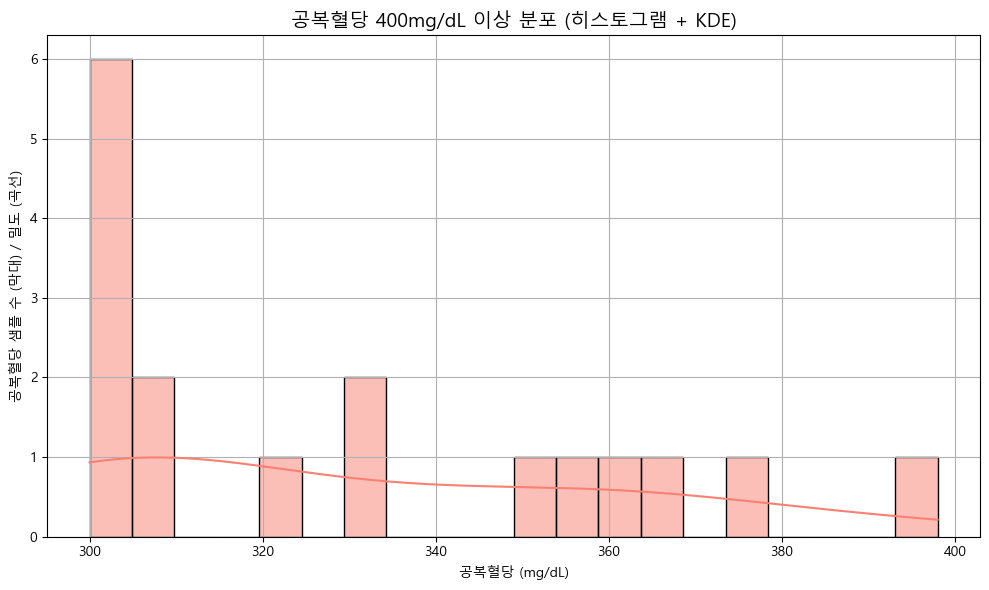

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# Í≥µÎ≥µÌòàÎãπ 400 Ïù¥ÏÉÅ Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂ú
data_high_glu = data[data['HE_glu'] >= 300]

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))

sns.histplot(
    data=data_high_glu,
    x='HE_glu',
    bins=20,
    kde=True,  # ‚úÖ KDE Í≥°ÏÑ†ÎèÑ Ìï®Íªò Í∑∏Î¶º
    color='salmon',
    edgecolor='black'
)

plt.title("Í≥µÎ≥µÌòàÎãπ 400mg/dL Ïù¥ÏÉÅ Î∂ÑÌè¨ (ÌûàÏä§ÌÜ†Í∑∏Îû® + KDE)", fontsize=14)
plt.xlabel("Í≥µÎ≥µÌòàÎãπ (mg/dL)")
plt.ylabel("Í≥µÎ≥µÌòàÎãπ ÏÉòÌîå Ïàò (ÎßâÎåÄ) / Î∞ÄÎèÑ (Í≥°ÏÑ†)")
plt.grid(True)
plt.tight_layout()
plt.show()


- Ï†ÄÌòàÎãπ (ÏúÑÌóò)	< 60	‚ùó Ï†ÄÌòàÎãπ Ï¶ùÏÉÅ Í∞ÄÎä•ÏÑ± ‚Üë
- Ïã¨Í∞ÅÌïú Ï†ÄÌòàÎãπ	< 50	‚ùó Ïã§Ïã†¬∑ÌòºÏàò Í∞ÄÎä•, ÏùëÍ∏â ÏàòÏ§Ä
- Ï∏°Ï†ï Ïò§Î•ò Í∞ÄÎä•ÏÑ±	< 45	‚ùì ÏùºÎ∞òÏ†Å Í±¥Í∞ïÍ≤ÄÏßÑÏóêÏÑ† ÎìúÎ≠Ñ, Ïù¥ÏÉÅÏπò ÏùòÏã¨

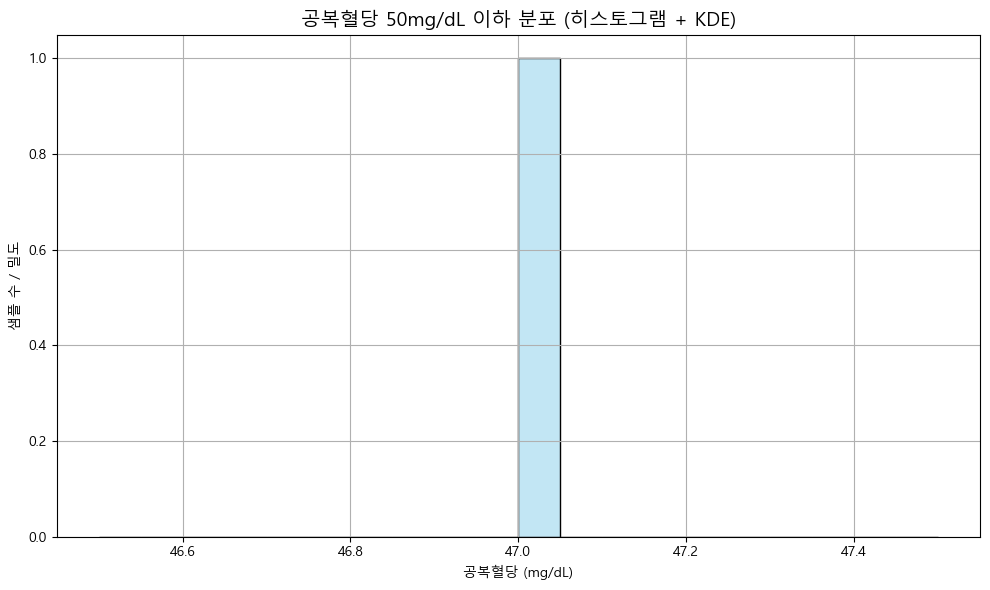

In [122]:
# Í≥µÎ≥µÌòàÎãπ 50 Ïù¥Ìïò Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
data_low_glu = data[data['HE_glu'] <= 50]

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))

sns.histplot(
    data=data_low_glu,
    x='HE_glu',
    bins=20,
    kde=True,
    color='skyblue',
    edgecolor='black'
)

plt.title("Í≥µÎ≥µÌòàÎãπ 50mg/dL Ïù¥Ìïò Î∂ÑÌè¨ (ÌûàÏä§ÌÜ†Í∑∏Îû® + KDE)", fontsize=14)
plt.xlabel("Í≥µÎ≥µÌòàÎãπ (mg/dL)")
plt.ylabel("ÏÉòÌîå Ïàò / Î∞ÄÎèÑ")
plt.grid(True)
plt.tight_layout()
plt.show()


**(Í∞ÑÏàòÏπò(ALT))ÏùòÌïôÏ†Å Ï†àÎåÄ Í∏∞Ï§Ä Ï¥àÍ≥º**:

  - **2 Ïù¥Ìïò**ÏùÄ ÏùºÎ∞òÏ†ÅÏù∏ Ïô∏Îûò Í≤ÄÏÇ¨ÏóêÏÑúÎäî Í±∞Ïùò ÎÇòÏò§ÏßÄ ÏïäÏúºÎ©∞
  - **700 Ïù¥ÏÉÅÏùÄ Í∏âÏÑ± ÏÉÅÌÉú or Ïò§Î•ò Í∞ÄÎä•ÏÑ± Í∞ÑÏ£º**ÌïòÎäî Ïó∞Íµ¨ÎèÑ ÎßéÎã§.
- Ï§ëÎì±ÎèÑ ÏÉÅÏäπ	121 ~ 400	‚ùó Í∞ÑÏßàÌôò Í∞ÄÎä•ÏÑ± ‚Üë
- Ïã¨Ìïú ÏÉÅÏäπ	401 ~ 700	‚ùó Í∏âÏÑ± Í∞ÑÏóº, DILI, Í∞Ñ Í¥¥ÏÇ¨ ÏùòÏã¨
- Ïã¨Í∞ÅÌïú ÏÉÅÏäπ	700 ~ 1000+	‚ö†Ô∏è ÏùëÍ∏â ÏÉÅÌô© or Í∏∞Í∏∞ Ïò§Î•ò Í∞ÄÎä•ÏÑ±

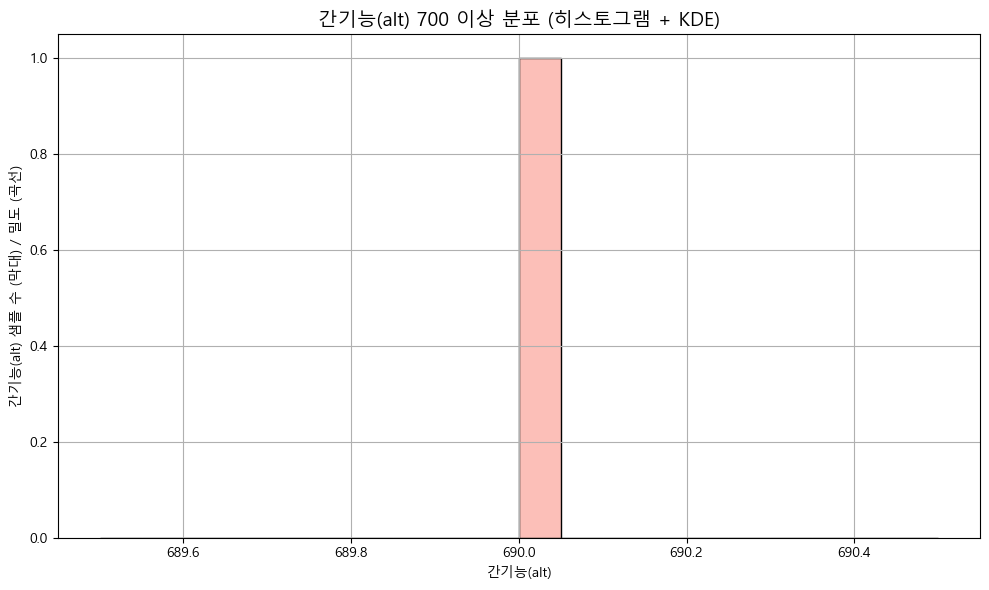

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# Í∞ÑÍ∏∞Îä•(alt) 700 Ïù¥ÏÉÅ Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂ú
data_high_glu = data[data['HE_alt'] >= 400]

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))

sns.histplot(
    data=data_high_glu,
    x='HE_alt',
    bins=20,
    kde=True,  # ‚úÖ KDE Í≥°ÏÑ†ÎèÑ Ìï®Íªò Í∑∏Î¶º
    color='salmon',
    edgecolor='black'
)

plt.title("Í∞ÑÍ∏∞Îä•(alt) 700 Ïù¥ÏÉÅ Î∂ÑÌè¨ (ÌûàÏä§ÌÜ†Í∑∏Îû® + KDE)", fontsize=14)
plt.xlabel("Í∞ÑÍ∏∞Îä•(alt)")
plt.ylabel("Í∞ÑÍ∏∞Îä•(alt) ÏÉòÌîå Ïàò (ÎßâÎåÄ) / Î∞ÄÎèÑ (Í≥°ÏÑ†)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
data = pd.read_csv("C:/Í±¥Í∞ïÍ≤ÄÏßÑ/health_checkup/JDM/2012ÎÖÑ~2023ÎÖÑ/Í±¥Í∞ïÏ°∞ÏÇ¨_2012~2023.csv")

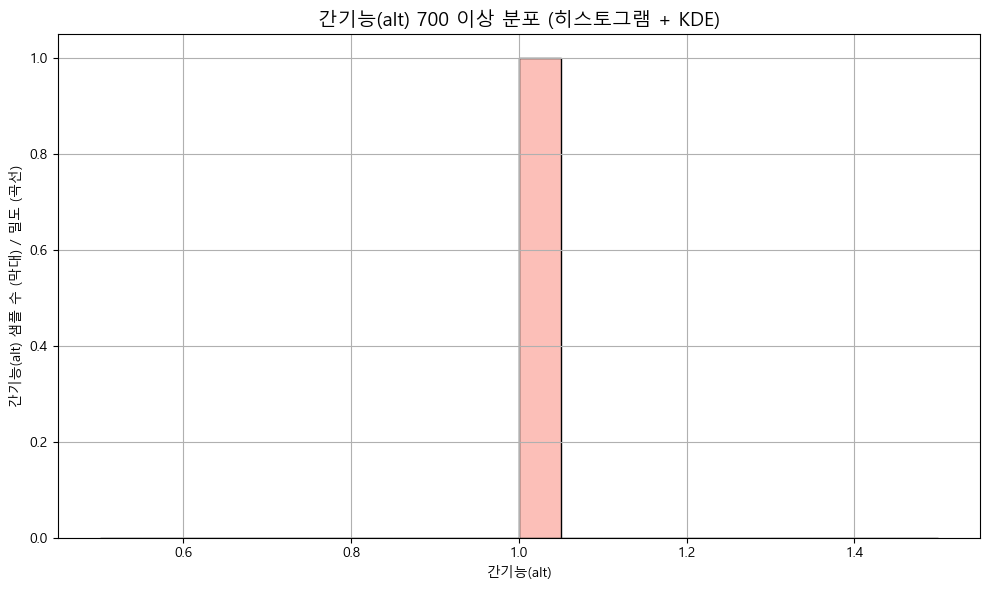

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Í∞ÑÍ∏∞Îä•(alt) 700 Ïù¥ÏÉÅ Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂ú
data_high_glu = data[data['HE_alt'] <3]

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))

sns.histplot(
    data=data_high_glu,
    x='HE_alt',
    bins=20,
    kde=True,  # ‚úÖ KDE Í≥°ÏÑ†ÎèÑ Ìï®Íªò Í∑∏Î¶º
    color='salmon',
    edgecolor='black'
)

plt.title("Í∞ÑÍ∏∞Îä•(alt) 700 Ïù¥ÏÉÅ Î∂ÑÌè¨ (ÌûàÏä§ÌÜ†Í∑∏Îû® + KDE)", fontsize=14)
plt.xlabel("Í∞ÑÍ∏∞Îä•(alt)")
plt.ylabel("Í∞ÑÍ∏∞Îä•(alt) ÏÉòÌîå Ïàò (ÎßâÎåÄ) / Î∞ÄÎèÑ (Í≥°ÏÑ†)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
set(sorted(data["HE_wt"]))

**- HE_DM_HbA1c(ÎãπÎá®Ïó¨Î∂Ä)Ïùò Ïù¥ÏÉÅÏπòÎäî 999,888 Îì± Î™®Î¶Ñ Ïù¥ÎØÄÎ°ú Ïù¥ÏÉÅÏπòÎùº ÌïòÎ©¥ Ïïà Îê®**
**- HE_ht(Ïã†Ïû•), HE_wt(Ï≤¥Ï§ë) ÏùÄ Ïã§Ï†ú Í∞í**

**ÌÉÄÍ≤ü Î≥ÄÏàò ÌôïÏù∏**

In [111]:
data['HE_HP'].value_counts()

HE_HP
1.0    4652
4.0    3631
3.0    1521
2.0     860
Name: count, dtype: int64

In [112]:
data['HE_obe'].value_counts()

HE_obe
2.0    3972
4.0    3120
3.0    2389
5.0     576
1.0     452
6.0     109
Name: count, dtype: int64

In [110]:
data['HE_DM_HbA1c'].value_counts()

HE_DM_HbA1c
1.0    5527
2.0    3367
3.0    1593
Name: count, dtype: int64

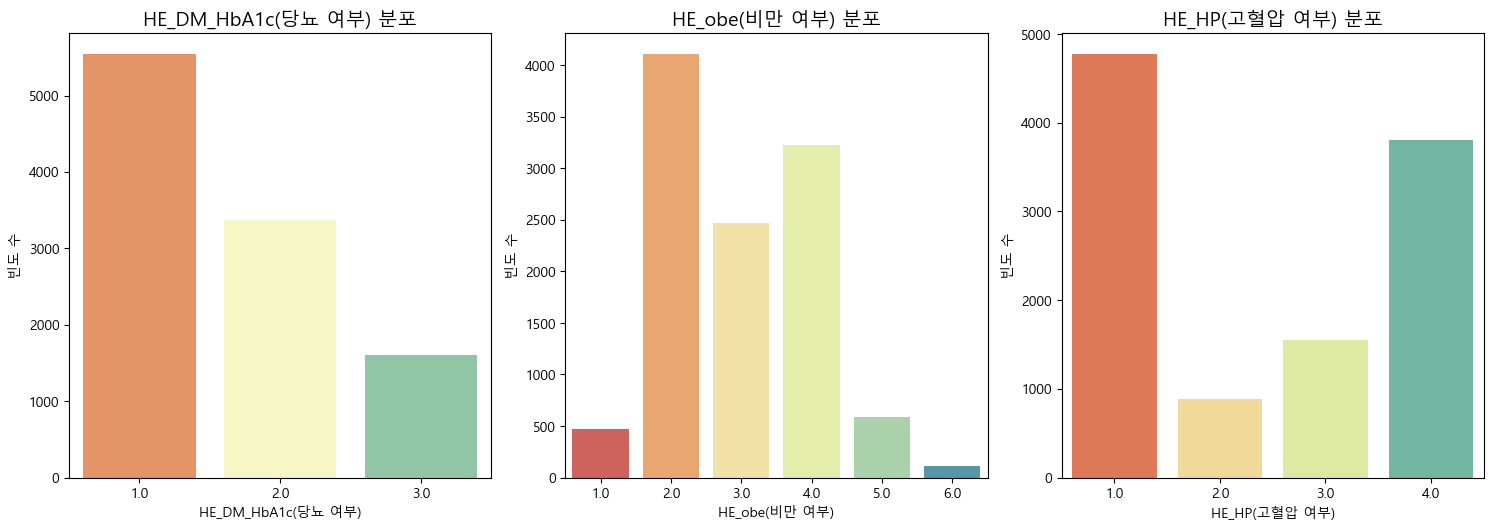

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# ÏãúÍ∞ÅÌôîÌï† Î≥ÄÏàò Î¶¨Ïä§Ìä∏
targets = ['HE_DM_HbA1c', 'HE_obe', 'HE_HP']
column_labels = {
    'HE_DM_HbA1c': 'HE_DM_HbA1c(ÎãπÎá® Ïó¨Î∂Ä)',
    'HE_obe': 'HE_obe(ÎπÑÎßå Ïó¨Î∂Ä)',
    'HE_HP': 'HE_HP(Í≥†ÌòàÏïï Ïó¨Î∂Ä)'
}

# ÏÑúÎ∏åÌîåÎ°Ø ÏÑ§Ï†ï (2Ìñâ 4Ïó¥: 8Í∞úÏùò Ïπ∏ Ï§ë 3Í∞ú ÏÇ¨Ïö©)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  # 2Ï∞®Ïõê ‚Üí 1Ï∞®Ïõê ÌèâÌÉÑÌôî

# Í∞Å Î≥ÄÏàòÏóê ÎåÄÌï¥ countplot Í∑∏Î¶¨Í∏∞
for i, var in enumerate(targets):
    sns.countplot(x=var, data=data, palette="Spectral", ax=axes[i])
    axes[i].set_title(f"{column_labels[var]} Î∂ÑÌè¨", fontsize=14)
    axes[i].set_xlabel(column_labels[var])
    axes[i].set_ylabel('ÎπàÎèÑ Ïàò')

# ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÎäî subplot Ïà®Í∏∞Í∏∞
for j in range(len(targets), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
#data = pd.read_csv("C:/Í±¥Í∞ïÍ≤ÄÏßÑ/health_checkup/JDM/2012ÎÖÑ~2023ÎÖÑ/Í±¥Í∞ïÏ°∞ÏÇ¨_2022_2023_ÌÜµÌï©.csv")

In [10]:
data = pd.read_csv("C:/Í±¥Í∞ïÍ≤ÄÏßÑ/health_checkup/JDM/2012ÎÖÑ~2023ÎÖÑ/Í±¥Í∞ïÎç∞Ïù¥ÌÑ∞_2022_2023_Ìï©Î≥∏.csv")

In [5]:
data

ID    year  region  town_t  sex   age  incm  ho_incm  edu  \
0      YA01220302  2022.0     1.0     1.0  2.0  56.0   3.0      4.0  3.0   
1      YA01220303  2022.0     1.0     1.0  1.0  30.0   3.0      4.0  4.0   
2      YA01220304  2022.0     1.0     1.0  2.0  25.0   3.0      4.0  4.0   
3      YA01236501  2022.0     1.0     1.0  1.0  66.0   3.0      3.0  4.0   
4      YA01236502  2022.0     1.0     1.0  2.0  62.0   3.0      3.0  3.0   
...           ...     ...     ...     ...  ...   ...   ...      ...  ...   
13189  YR62368101  2023.0     8.0     2.0  1.0  80.0   2.0      1.0  1.0   
13190  YR62368102  2023.0     8.0     2.0  2.0  78.0   2.0      1.0  1.0   
13191  YR62370201  2023.0     8.0     2.0  2.0  61.0   1.0      1.0  3.0   
13192  YR62394401  2023.0     8.0     2.0  1.0  57.0   4.0      4.0  4.0   
13193  YR62432901  2023.0     8.0     2.0  1.0  49.0   3.0      4.0  3.0   

       occp  cfam  genertn  D_1_1  DI1_dg  DI1_ag  DI1_pr  DI1_pt  DI1_2  \
0       7.0   4.0      4.0    3.0     1.0    48.0     1.0     1.0    1.0   
1       3.0   4.0      4.0    2.0     0.0   888.0     8.0     8.0    8.0   
2       7.0   4.0      4.0    2.0     0.0   888.0     8.0     8.0    8.0   
3       7.0   2.0      2.0    2.0     0.0   888.0     8.0     8.0    8.0   
4       6.0   2.0      2.0    2.0     0.0   888.0     8.0     8.0    8.0   
...     ...   ...      ...    ...     ...     ...     ...     ...    ...   
13189   7.0   2.0      2.0    5.0     1.0    70.0     1.0     1.0    1.0   
13190   7.0   2.0      2.0    3.0     1.0    76.0     1.0     1.0    1.0   
13191   3.0   2.0      6.0    3.0     0.0   888.0     8.0     8.0    8.0   
13192   2.0   1.0      1.0    3.0     0.0   888.0     8.0     8.0    8.0   
13193   5.0   1.0      1.0    3.0     0.0   888.0     8.0     8.0    8.0   

       DI2_dg  DI2_ag  DI2_pr  DI2_pt  DI2_2  DE1_dg  DE1_ag  DE1_pr  DE1_pt  \
0         0.0   888.0     8.0     8.0    8.0     0.0   888.0     8.0     8.0   
1         0.0   888.0     8.0     8.0    8.0     0.0   888.0     8.0     8.0   
2         0.0   888.0     8.0     8.0    8.0     0.0   888.0     8.0     8.0   
3         1.0    56.0     1.0     1.0    1.0     0.0   888.0     8.0     8.0   
4         1.0    53.0     1.0     1.0    1.0     0.0   888.0     8.0     8.0   
...       ...     ...     ...     ...    ...     ...     ...     ...     ...   
13189     0.0   888.0     8.0     8.0    8.0     1.0    73.0     1.0     1.0   
13190     0.0   888.0     8.0     8.0    8.0     0.0   888.0     8.0     8.0   
13191     0.0   888.0     8.0     8.0    8.0     0.0   888.0     8.0     8.0   
13192     0.0   888.0     8.0     8.0    8.0     0.0   888.0     8.0     8.0   
13193     0.0   888.0     8.0     8.0    8.0     0.0   888.0     8.0     8.0   

       DE1_3  DE1_31  DE1_32  DE1_33  DE1_34  DE1_4  DN1_dg  DN1_ag  BH1  BO1  \
0        8.0     8.0     8.0     8.0     8.0    8.0     0.0   888.0  1.0  4.0   
1        8.0     8.0     8.0     8.0     8.0    8.0     0.0   888.0  1.0  4.0   
2        8.0     8.0     8.0     8.0     8.0    8.0     0.0   888.0  2.0  4.0   
3        8.0     8.0     8.0     8.0     8.0    8.0     0.0   888.0  1.0  3.0   
4        8.0     8.0     8.0     8.0     8.0    8.0     0.0   888.0  1.0  3.0   
...      ...     ...     ...     ...     ...    ...     ...     ...  ...  ...   
13189    1.0     0.0     1.0     0.0     0.0    2.0     0.0   888.0  2.0  2.0   
13190    8.0     8.0     8.0     8.0     8.0    8.0     0.0   888.0  1.0  5.0   
13191    8.0     8.0     8.0     8.0     8.0    8.0     0.0   888.0  1.0  3.0   
13192    8.0     8.0     8.0     8.0     8.0    8.0     0.0   888.0  1.0  3.0   
13193    8.0     8.0     8.0     8.0     8.0    8.0     0.0   888.0  1.0  3.0   

       BO1_1  BO2_1  BD1  BD1_11  BD2_1  BP16_1  BP16_2  BP1  BP5  BS1_1  \
0        1.0    1.0  2.0     1.0    8.0     8.0    10.0  2.0  8.0    3.0   
1        3.0    1.0  2.0     3.0    2.0     7.0     7.0  3.0  8.0    3.0   
2        2.0    1.0  2.0   

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Ïª¨ÎüºÎ™Ö Îß§Ìïë ÏÇ¨Ï†Ñ (ÌòïÎãòÏù¥ Ï£ºÏã† Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©)
column_mapping = {
    'ID': 'ID',
    'year': 'year(Ï°∞ÏÇ¨Ïó∞ÎèÑ)',
    'age': 'age(Ïó∞Î†π)',
    'sex': 'sex(ÏÑ±Î≥Ñ)',
    'HE_ht': 'HE_ht(Ïã†Ïû•(cm))',
    'HE_wt': 'HE_wt(Ï≤¥Ï§ë(kg))',
    'HE_wc': 'HE_wc(ÌóàÎ¶¨ÎëòÎ†à(cm))',
    'HE_BMI': 'HE_BMI(Ï≤¥ÏßàÎüâÏßÄÏàò)',
    'HE_sbp1': 'HE_sbp1(ÏàòÏ∂ïÍ∏∞ ÌòàÏïï)',
    'HE_dbp1': 'HE_dbp1(Ïù¥ÏôÑÍ∏∞ ÌòàÏïï)',
    'HE_Upro': 'HE_Upro(ÏÜåÎ≥Ä Îã®Î∞±)',
    'HE_glu': 'HE_glu(Í≥µÎ≥µÌòàÎãπ)',
    'HE_HbA1c': 'HE_HbA1c(ÎãπÌôîÌòàÏÉâÏÜå)',
    'HE_chol': 'HE_chol(Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§)',
    'HE_HDL_st2': 'HE_HDL_st2(HDL ÏΩúÎ†àÏä§ÌÖåÎ°§)',
    'HE_TG': 'HE_TG(Ï§ëÏÑ±ÏßÄÎ∞©)',
    'HE_LDL_drct': 'HE_LDL_drct(LDL ÏΩúÎ†àÏä§ÌÖåÎ°§)',
    'HE_crea': 'HE_crea(ÌÅ¨Î†àÏïÑÌã∞Îãå)',
    'HE_ast': 'HE_ast(AST (Í∞ÑÍ∏∞Îä•))',
    'HE_alt': 'HE_alt(ALT (Í∞ÑÍ∏∞Îä•))',
    'HE_obe': 'HE_obe(ÎπÑÎßå Ïó¨Î∂Ä)',
    'HE_HP': 'HE_HP(Í≥†ÌòàÏïï Ïó¨Î∂Ä)',
    'DI1_dg': 'DI1_dg(Í≥†ÌòàÏïï ÏùòÏÇ¨ÏßÑÎã® Ïó¨Î∂Ä)',
    'HE_DM_HbA1c': 'HE_DM_HbA1c(ÎãπÎá® Ïó¨Î∂Ä (HbA1c))',
    'DE1_dg': 'DE1_dg(ÎãπÎá®Î≥ë ÏùòÏÇ¨ÏßÑÎã® Ïó¨Î∂Ä)',
    'DE1_pt': 'DE1_pt(ÎãπÎá®Î≥ëÏπòÎ£åÏó¨Î∂Ä)',
    'DI1_pt': 'DI1_pt(Í≥†ÌòàÏïïÏπòÎ£åÏó¨Î∂Ä)'
}

# ‚è∫ Îß§ÌïëÎêú Ïª¨ÎüºÎßå Ï∂îÏ∂ú
mapped_columns = list(column_mapping.keys())
data_mapped = data[mapped_columns]

# ‚è∫ Í≤∞Ï∏°Ïπò Ï†ïÎ≥¥ Í≥ÑÏÇ∞
missing_df = pd.DataFrame({
    'Í≤∞Ï∏°Ïπò Í∞úÏàò': data_mapped.isnull().sum(),
    'Í≤∞Ï∏° ÎπÑÏú®(%)': data_mapped.isnull().mean() * 100
})

# ‚è∫ Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Ïª¨ÎüºÎßå ÌïÑÌÑ∞ÎßÅ
missing_df = missing_df[missing_df['Í≤∞Ï∏°Ïπò Í∞úÏàò'] > 0]

# ‚è∫ ÌïúÍ∏Ä Ïª¨ÎüºÎ™ÖÏúºÎ°ú Îß§Ìïë
missing_df.index = missing_df.index.map(column_mapping)

# ‚è∫ Ï†ïÎ†¨
missing_df = missing_df.sort_values(by='Í≤∞Ï∏° ÎπÑÏú®(%)', ascending=False)

# ‚è∫ Ï†ÑÏ≤¥ Ï∂úÎ†•
pd.set_option('display.max_rows', None)
print(missing_df)


                            Í≤∞Ï∏°Ïπò Í∞úÏàò   Í≤∞Ï∏° ÎπÑÏú®(%)
HE_LDL_drct(LDL ÏΩúÎ†àÏä§ÌÖåÎ°§)       65639  72.108582
HE_DM_HbA1c(ÎãπÎá® Ïó¨Î∂Ä (HbA1c))   63644  69.916949
ID                           31006  34.062047
HE_HP(Í≥†ÌòàÏïï Ïó¨Î∂Ä)                22722  24.961550
HE_obe(ÎπÑÎßå Ïó¨Î∂Ä)                21118  23.199455
HE_Upro(ÏÜåÎ≥Ä Îã®Î∞±)               17141  18.830470
HE_HbA1c(ÎãπÌôîÌòàÏÉâÏÜå)              17022  18.699741
HE_alt(ALT (Í∞ÑÍ∏∞Îä•))            16861  18.522872
HE_glu(Í≥µÎ≥µÌòàÎãπ)                 16847  18.507492
HE_HDL_st2(HDL ÏΩúÎ†àÏä§ÌÖåÎ°§)        16839  18.498704
HE_ast(AST (Í∞ÑÍ∏∞Îä•))            16828  18.486620
HE_crea(ÌÅ¨Î†àÏïÑÌã∞Îãå)               16827  18.485521
HE_chol(Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§)             16827  18.485521
HE_TG(Ï§ëÏÑ±ÏßÄÎ∞©)                  16827  18.485521
HE_dbp1(Ïù¥ÏôÑÍ∏∞ ÌòàÏïï)              12185  13.385991
HE_sbp1(ÏàòÏ∂ïÍ∏∞ ÌòàÏïï)              12185  13.385991
HE_wc(ÌóàÎ¶¨ÎëòÎ†à(cm))               5903   6.484818
DI1_dg(Í≥†Ìò

Ï†ÑÏ≤òÎ¶¨

- **Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨**  
Í≥µÎ≥µÌòàÎãπ 400Ïù¥ÏÉÅ  
Í∞ÑÏàòÏπò 2Ïù¥Ìïò, 700Ïù¥ÏÉÅ

In [11]:
# Í≥µÎ≥µÌòàÎãπ: 50 Ïù¥ÏÉÅ & 350 Ïù¥Ìïò
data = data[(data['HE_glu'] >= 50) & (data['HE_glu'] <= 350)]

# ALT (Í∞ÑÏàòÏπò): 400 ÎØ∏Îßå
data = data[data['HE_alt'] < 400]

In [127]:
data.describe()

year        region        town_t         apt_t           sex  \
count  11708.000000  11708.000000  11708.000000  11708.000000  11708.000000   
mean    2022.526563      7.762128      1.206013      1.551247      1.557311   
std        0.499315      5.036066      0.404457      0.497388      0.496726   
min     2022.000000      1.000000      1.000000      1.000000      1.000000   
25%     2022.000000      3.000000      1.000000      1.000000      1.000000   
50%     2023.000000      9.000000      1.000000      2.000000      2.000000   
75%     2023.000000     11.000000      1.000000      2.000000      2.000000   
max     2023.000000     17.000000      2.000000      2.000000      2.000000   

                age  age_month          incm       ho_incm         incm5  \
count  11708.000000        0.0  11676.000000  11676.000000  11676.000000   
mean      50.586010        NaN      2.509164      2.673690      3.009764   
std       19.347435        NaN      1.117585      1.087392      1.411452   
min       10.000000        NaN      1.000000      1.000000      1.000000   
25%       36.000000        NaN      2.000000      2.000000      2.000000   
50%       53.000000        NaN      3.000000      3.000000      3.000000   
75%       66.000000        NaN      4.000000      4.000000      4.000000   
max       80.000000        NaN      4.000000      4.000000      5.000000   

           ho_incm5           edu          occp         wt_hs      wt_itvex  \
count  11676.000000  11402.000000  10307.000000  11708.000000  11708.000000   
mean       3.223450      2.855727      4.707383   6413.729510   7862.604436   
std        1.375342      1.137031      2.331607   2280.949087   4527.462332   
min        1.000000      1.000000      1.000000    491.057550    288.881052   
25%        2.000000      2.000000      2.000000   4799.435069   4772.503919   
50%        3.000000      3.000000      5.000000   6085.361319   6804.515104   
75%        4.000000      4.000000      7.000000   7627.583039   9731.668679   
max        5.000000      4.000000      7.000000  14672.312433  41663.034252   

              wt_oe        wt_bia        wt_ntr        wt_tot       wt_oent  \
count  10740.000000   4761.000000  11255.000000  11255.000000  10372.000000   
mean    8636.698606   9731.410717   8214.478668   8220.731781   8956.079282   
std     4511.702065   5323.514811   4582.778601   4340.503639   4834.348025   
min      443.011001    647.351080    415.700636    414.792945    464.837148   
25%     5394.601996   5797.136315   5025.657769   5112.508325   5491.923938   
50%     7536.625722   8416.970595   7074.891921   7177.107039   7749.508205   
75%    10795.865570  12113.876130  10124.853974  10238.081856  11128.851296   
max    25427.196039  26440.965128  30883.428571  24558.256031  27342.734773   

           wt_biant       kstrata          cfam       genertn       allownc  \
count   4509.000000  11708.000000  11708.000000  11708.000000  11708.000000   
mean   10306.732410    112.008285      2.687820      3.301332     19.445422   
std     5676.950425      7.320006      1.176199      1.618762      2.653378   
min      680.097632    101.000000      1.000000      1.000000     10.000000   
25%     6101.101417    107.000000      2.000000      2.000000     20.000000   
50%     8880.567412    111.000000      3.000000      4.000000     20.000000   
75%    12815.450463    119.000000      4.000000      4.000000     20.000000   
max    28084.322742    127.000000      6.000000      7.000000     99.000000   

              house        live_t    ainc_unit1         ainc_1          ainc  \
count  11708.000000  11708.000000  11708.000000   11708.000000  11676.000000   
mean       1.840707      1.815596      1.154766    8419.596430    522.547398   
std        0.672205      0.652405      0.528311   52126.881302    375.881644   
min        1.000000      1.000000      1.000000      17.000000     17.000000   
25%        1.000000      1.000000      1.000000    1600.000000    221.666667   
50

**Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ ÌõÑ MAX, MIN Í∞í ÎπÑÍµê

In [ ]:
# column_mapping = {
#     'HE_glu': 'HE_glu(Í≥µÎ≥µÌòàÎãπ)',
#     'HE_alt': 'HE_alt(AlT (Í∞ÑÍ∏∞Îä•))'
# }

# # 1. ÏòÅÏñ¥ Ïª¨Îüº ÏàúÏÑú (ÏõêÌïòÎäî ÏàúÏÑú)
# original_columns = [
#     'HE_glu', 'HE_alt', 
# ]

# # 2. ÌïúÍ∏Ä Îß§ÌïëÎêú Ïª¨Îüº Î¶¨Ïä§Ìä∏ ÎßåÎì§Í∏∞
# kor_columns = [column_mapping[col] for col in original_columns]

# # 3. Ïª¨ÎüºÎ™Ö ÌïúÍ∏ÄÎ°ú Î∞îÍæ∏Í∏∞
# data = data.rename(columns=column_mapping)

# # 4. ÏõêÌïòÎäî ÏàúÏÑúÎ°ú Ïû¨Ï†ïÎ†¨
# data = data[kor_columns]

# # 3Ô∏è‚É£ EDA ÏöîÏïΩ 
# eda = pd.DataFrame(index=data.columns)
# eda['Í≥†Ïú†Í∞í Í∞úÏàò'] = data.nunique()
# eda['ÏµúÏÜåÍ∞í'] = data.min(numeric_only=True)
# eda['ÏµúÎåÄÍ∞í'] = data.max(numeric_only=True)

# # Í∞ÑÏàòÏπò Î∞è Í≥µÎ≥µÌòàÎãπ Ïª¨ÎüºÎßå ÌïÑÌÑ∞ÎßÅ
# eda_selected = eda.loc[
#     ['HE_glu(Í≥µÎ≥µÌòàÎãπ)', 'HE_alt(AlT (Í∞ÑÍ∏∞Îä•))']
# ]

# eda_selected


Í≥†Ïú†Í∞í Í∞úÏàò   ÏµúÏÜåÍ∞í    ÏµúÎåÄÍ∞í
HE_glu(Í≥µÎ≥µÌòàÎãπ)          198  60.0  334.0
HE_alt(AlT (Í∞ÑÍ∏∞Îä•))     156   5.0  359.0

- **Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨**

In [12]:
import pandas as pd

# ÎÇ®Í∏∞Í≥† Ïã∂ÏùÄ Ïª¨Îüº Î¶¨Ïä§Ìä∏
columns_to_keep = [
    'ID','year','age','sex','HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI',
    'HE_sbp1', 'HE_dbp1',
    'HE_Upro', 'HE_glu','HE_HbA1c', 'HE_chol', 'HE_HDL_st2',
    'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt',
    'HE_obe', 'HE_HP', 'HE_DM_HbA1c',
    'DE1_dg', 'DI1_dg'
]

# ÏõêÎûò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏù¥ dfÏùº Îïå
data = data[columns_to_keep]


In [13]:
# HE_DM_HbA1c
if 'HE_DM_HbA1c' in data.columns:
    data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'DE1_dg' in data.columns:
        print(f"DE1_dg missing ratio: {data['DE1_dg'].isnull().mean()}")
        data['HE_DM_HbA1c'] = data['HE_DM_HbA1c'].fillna(data['DE1_dg'].map({0: 1, 1: 3}))
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_DM_HbA1c'].isnull().any():
        data = data[data['HE_DM_HbA1c'].notnull()]
    print(f"HE_DM_HbA1c NaN count after: {data['HE_DM_HbA1c'].isnull().sum()}")

# HE_obe
if 'HE_obe' in data.columns:
    data['HE_obe'] = data['HE_obe'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'HE_BMI' in data.columns:
        # BMIÍ∞Ä KNN ÎåÄÏ≤¥Îêú Í≤ΩÏö∞ ÌëúÏãú
        data['HE_BMI_imputed'] = data['HE_BMI'].isnull().astype(int)
        data['HE_obe'] = data.apply(
            lambda row: row['HE_obe'] if pd.notna(row['HE_obe']) else (
                1 if row['HE_BMI'] < 18.5 else
                2 if row['HE_BMI'] < 25 else
                3 if row['HE_BMI'] < 30 else
                4 if row['HE_BMI'] < 35 else
                5 if row['HE_BMI'] < 40 else
                6
            ),
            axis=1
        )
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_obe'].isnull().any():
        data = data[data['HE_obe'].notnull()]
    print(f"HE_obe NaN count after: {data['HE_obe'].isnull().sum()}")

# HE_HP
if 'HE_HP' in data.columns:
    data['HE_HP'] = data['HE_HP'].replace([9, 99, 999, 888, 9.0, 99.0, 999.0, 888.0], np.nan)
    if 'DI1_dg' in data.columns:
        print(f"DI1_dg missing ratio: {data['DI1_dg'].isnull().mean()}")
        data['HE_HP'] = data['HE_HP'].fillna(data['DI1_dg'].map({0: 1, 1: 4}))
    # ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî ÎìúÎûçÎûç
    if data['HE_HP'].isnull().any():
        data = data[data['HE_HP'].notnull()]
    print(f"HE_HP NaN count after: {data['HE_HP'].isnull().sum()}")


#Í≤∞Ï∏°Ïπò ÎπÑÏú® ÎÇÆÏùÄ Î≥ÄÏàò Ï≤òÎ¶¨
# low_missing_columns = [
#     'DI1_dg', 
#     'DE1_dg', 
# ]
continuous_columns = ['HE_wt', 'HE_ht', 'HE_BMI']  # Ïó∞ÏÜçÌòï Î≥ÄÏàò

#for col in low_missing_columns + continuous_columns:
for col in continuous_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col] = data[col].replace([9, 99, 999, 88, 888, 9.0, 99.0, 999.0, 88.0, 888.0], np.nan)
        if not data[col].isnull().all():
            if col in continuous_columns:
                median_value = data[col].median()
                data[col] = data[col].fillna(median_value)
                print(f"Median for {col}: {median_value}")
            else:
                mode_series = data[col].mode(dropna=True)
                if not mode_series.empty:
                    mode_value = mode_series[0]
                    data[col] = data[col].fillna(mode_value)
                    print(f"Mode for {col}: {mode_value}")
                else:
                    print(f"No valid mode for {col}, leaving as is.")
        else:
            print(f"Column {col} is all NaN, skipping.")

# data = data[data['DE1_3'].isin([1, 2])]

#ÏÉùÏ≤¥ ÏßÄÌëú Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
knn_columns = [
    'HE_sbp1', 'HE_dbp1',  'HE_wc', 'HE_glu', 'HE_chol',
    'HE_HDL_st2', 'HE_TG', 'HE_LDL_drct',  'HE_crea', 'HE_Upro',
    'HE_ast', 'HE_alt', 'HE_wt', 'HE_ht', 'HE_BMI', 'HE_HbA1c'
]
knn_data = data[knn_columns].copy()
knn_data = knn_data.replace([888, 999, 888.0, 999.0], np.nan)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
knn_data_scaled = scaler.fit_transform(knn_data)
knn_data_scaled = pd.DataFrame(knn_data_scaled, columns=knn_columns, index=knn_data.index)

# KNN Imputation
imputer_knn = KNNImputer(n_neighbors=5, weights="distance")
knn_imputed = imputer_knn.fit_transform(knn_data_scaled)

# Ïó≠Ïä§ÏºÄÏùºÎßÅ
knn_imputed = scaler.inverse_transform(knn_imputed)
knn_imputed_data = pd.DataFrame(knn_imputed, columns=knn_columns, index=knn_data.index)
data[knn_columns] = knn_imputed_data

# knn_scaler_filename = 'HE_DM_HbA1c_knn_scaler.pkl'
# knn_imputer_filename = 'HE_DM_HbA1c_knn_imputer.pkl'
# joblib.dump(knn_data_scaled, knn_scaler_filename)
# joblib.dump(imputer_knn, knn_imputer_filename)
# knn_scaler_filename = 'HE_obe_knn_scaler.pkl'
# knn_imputer_filename = 'HE_obe_knn_imputer.pkl'
# joblib.dump(knn_data_scaled, knn_scaler_filename)
# joblib.dump(imputer_knn, knn_imputer_filename)
# knn_scaler_filename = 'HE_HP_knn_scaler.pkl'
# knn_imputer_filename = 'HE_HP_knn_imputer.pkl'
# joblib.dump(knn_data_scaled, knn_scaler_filename)
# joblib.dump(imputer_knn, knn_imputer_filename)

print("Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÏÉÅÌÉú:")
print(data.isnull().sum())
print("\nÌÉÄÍ≤ü Î≥ÄÏàò ÌÅ¥ÎûòÏä§ ÎπÑÏú®:")
for target in ['HE_DM_HbA1c', 'HE_obe', 'HE_HP']:
    if target in data.columns:
        print(f"\n{target}:\n{data[target].value_counts(normalize=True)}")
print("\nÍ∏∞Î≥∏ ÌÜµÍ≥ÑÎüâ:")
print(data.describe())

# Ï†ÑÏ≤òÎ¶¨ ÏΩîÎìú ÎÅùÏóê Ï∂îÍ∞Ä
#data.to_csv('Í±¥Í∞ïÏ°∞ÏÇ¨_2022~2023_ÌÜµÌï©(Í∞ÄÍ≥µÎêú).csv', index=False, encoding='utf-8-sig')

DE1_dg missing ratio: 8.541168431841476e-05
HE_DM_HbA1c NaN count after: 0
HE_obe NaN count after: 0
DI1_dg missing ratio: 0.0
HE_HP NaN count after: 0
Median for HE_wt: 62.8
Median for HE_ht: 163.0
Median for HE_BMI: 23.74976543441547
Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÏÉÅÌÉú:
ID                0
year              0
age               0
sex               0
HE_ht             0
HE_wt             0
HE_wc             0
HE_BMI            0
HE_sbp1           0
HE_dbp1           0
HE_Upro           0
HE_glu            0
HE_HbA1c          0
HE_chol           0
HE_HDL_st2        0
HE_TG             0
HE_LDL_drct       0
HE_crea           0
HE_ast            0
HE_alt            0
HE_obe            0
HE_HP             0
HE_DM_HbA1c       0
DE1_dg            0
DI1_dg            0
HE_BMI_imputed    0
dtype: int64

ÌÉÄÍ≤ü Î≥ÄÏàò ÌÅ¥ÎûòÏä§ ÎπÑÏú®:

HE_DM_HbA1c:
HE_DM_HbA1c
1.0    0.538042
2.0    0.310803
3.0    0.151154
Name: proportion, dtype: float64

HE_obe:
HE_obe
2.0    0.368052
4.0    0.288089
3.0 

In [202]:
data = pd.read_csv("C:/Í±¥Í∞ïÍ≤ÄÏßÑ/health_checkup/JDM/2012ÎÖÑ~2023ÎÖÑ/Í±¥Í∞ïÏ°∞ÏÇ¨_2022~2023_ÌÜµÌï©(Í∞ÄÍ≥µÎêú).csv")

In [188]:
print(data.columns.tolist())

['ID', 'year', 'age', 'sex', 'HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI', 'HE_sbp1', 'HE_dbp1', 'HE_Upro', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'HE_HDL_st2', 'HE_TG', 'HE_LDL_drct', 'HE_crea', 'HE_ast', 'HE_alt', 'HE_obe', 'HE_HP', 'HE_DM_HbA1c', 'DE1_dg', 'DI1_dg', 'HE_BMI_imputed']


**ÎèÖÎ¶ΩÎ≥ÄÏàòÍ∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ**

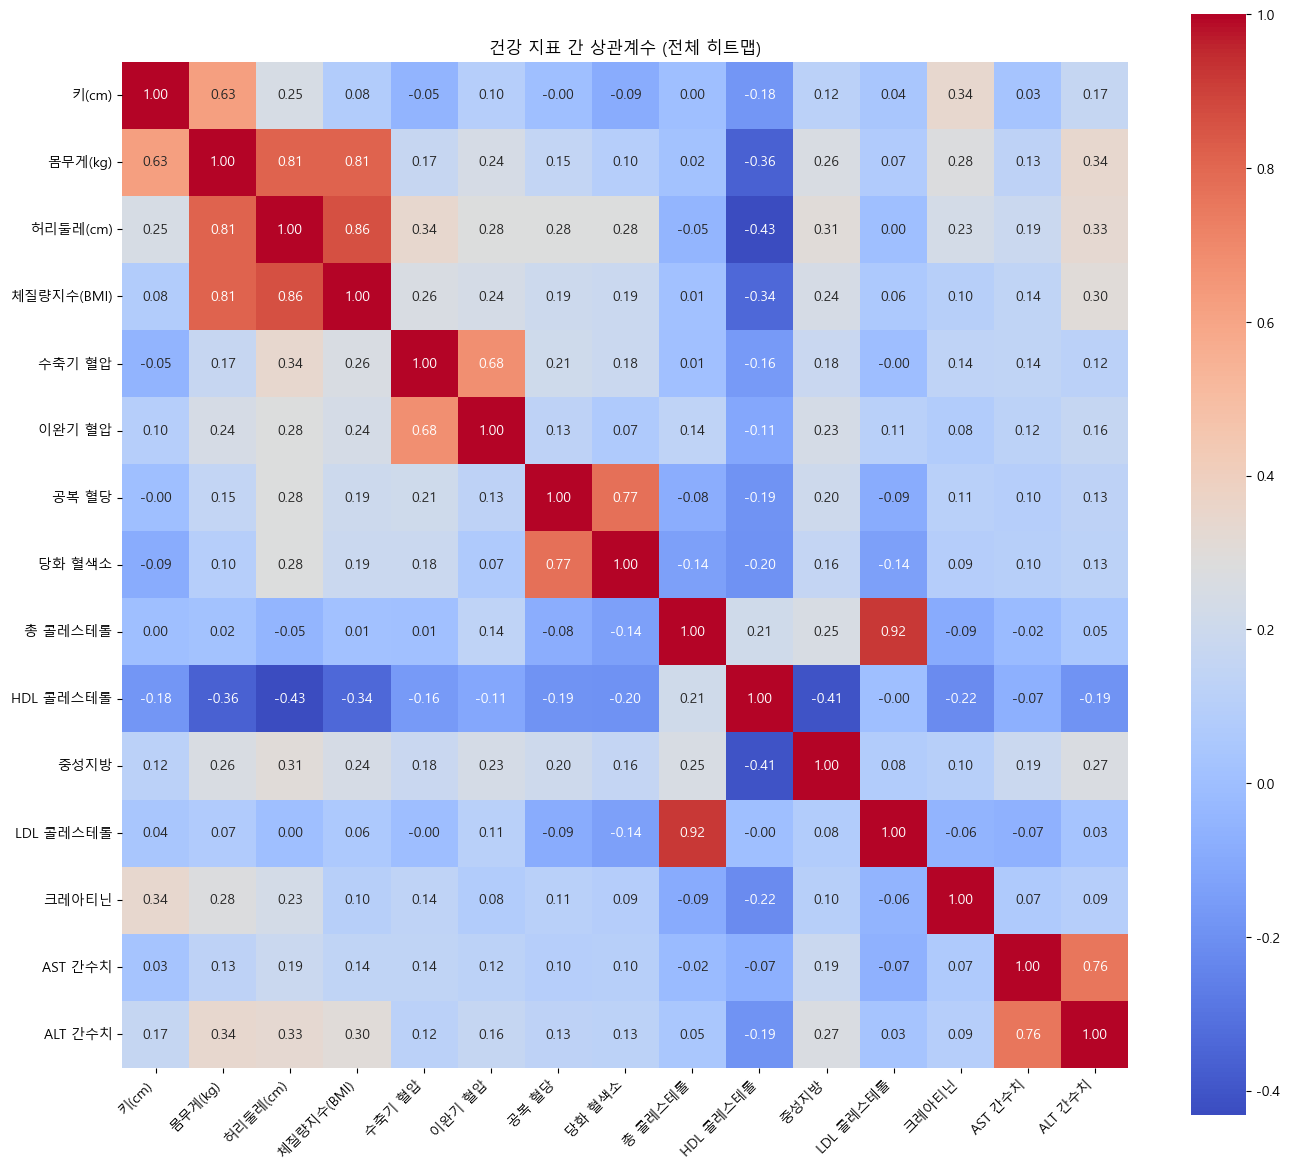

üìå <ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ>
Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§ ‚Üî LDL ÏΩúÎ†àÏä§ÌÖåÎ°§ : 0.92 
ÌóàÎ¶¨ÎëòÎ†à(cm) ‚Üî Ï≤¥ÏßàÎüâÏßÄÏàò(BMI) : 0.86 
Î™∏Î¨¥Í≤å(kg) ‚Üî ÌóàÎ¶¨ÎëòÎ†à(cm) : 0.81 
Î™∏Î¨¥Í≤å(kg) ‚Üî Ï≤¥ÏßàÎüâÏßÄÏàò(BMI) : 0.81 
Í≥µÎ≥µ ÌòàÎãπ ‚Üî ÎãπÌôî ÌòàÏÉâÏÜå : 0.77 
AST Í∞ÑÏàòÏπò ‚Üî ALT Í∞ÑÏàòÏπò : 0.76 
ÏàòÏ∂ïÍ∏∞ ÌòàÏïï ‚Üî Ïù¥ÏôÑÍ∏∞ ÌòàÏïï : 0.68 
ÌÇ§(cm) ‚Üî Î™∏Î¨¥Í≤å(kg) : 0.63 
ÌÇ§(cm) ‚Üî ÌÅ¨Î†àÏïÑÌã∞Îãå : 0.34 
ÌóàÎ¶¨ÎëòÎ†à(cm) ‚Üî ÏàòÏ∂ïÍ∏∞ ÌòàÏïï : 0.34 
Î™∏Î¨¥Í≤å(kg) ‚Üî ALT Í∞ÑÏàòÏπò : 0.34 
ÌóàÎ¶¨ÎëòÎ†à(cm) ‚Üî ALT Í∞ÑÏàòÏπò : 0.33 
ÌóàÎ¶¨ÎëòÎ†à(cm) ‚Üî Ï§ëÏÑ±ÏßÄÎ∞© : 0.31 
Ï≤¥ÏßàÎüâÏßÄÏàò(BMI) ‚Üî ALT Í∞ÑÏàòÏπò : 0.30 

üìå <ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ>
ÌóàÎ¶¨ÎëòÎ†à(cm) ‚Üî HDL ÏΩúÎ†àÏä§ÌÖåÎ°§ : -0.43 
HDL ÏΩúÎ†àÏä§ÌÖåÎ°§ ‚Üî Ï§ëÏÑ±ÏßÄÎ∞© : -0.41 
Î™∏Î¨¥Í≤å(kg) ‚Üî HDL ÏΩúÎ†àÏä§ÌÖåÎ°§ : -0.36 
Ï≤¥ÏßàÎüâÏßÄÏàò(BMI) ‚Üî HDL ÏΩúÎ†àÏä§ÌÖåÎ°§ : -0.34 


In [189]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ïª¨ÎüºÎ™Ö ÌïúÍ∏Ä Îßµ
column_name_map = {
    'HE_ht': 'ÌÇ§(cm)',
    'HE_wt': 'Î™∏Î¨¥Í≤å(kg)',
    'HE_wc': 'ÌóàÎ¶¨ÎëòÎ†à(cm)',
    'HE_BMI': 'Ï≤¥ÏßàÎüâÏßÄÏàò(BMI)',
    'HE_sbp1': 'ÏàòÏ∂ïÍ∏∞ ÌòàÏïï',
    'HE_dbp1': 'Ïù¥ÏôÑÍ∏∞ ÌòàÏïï',
    'HE_glu': 'Í≥µÎ≥µ ÌòàÎãπ',
    'HE_HbA1c' : 'ÎãπÌôî ÌòàÏÉâÏÜå',
    'HE_chol': 'Ï¥ù ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_HDL_st2': 'HDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_TG': 'Ï§ëÏÑ±ÏßÄÎ∞©',
    'HE_LDL_drct': 'LDL ÏΩúÎ†àÏä§ÌÖåÎ°§',
    'HE_crea': 'ÌÅ¨Î†àÏïÑÌã∞Îãå',
    'HE_ast': 'AST Í∞ÑÏàòÏπò',
    'HE_alt': 'ALT Í∞ÑÏàòÏπò'
}

# Î∂ÑÏÑù ÎåÄÏÉÅ Î≥ÄÏàò
selected_columns = list(column_name_map.keys())
correlation_matrix = data[selected_columns].corr()

# ÌïúÍ∏Ä Ïª¨ÎüºÎ™Ö Ï†ÅÏö©
corr_named = correlation_matrix.rename(columns=column_name_map, index=column_name_map)

# ÌûàÌä∏Îßµ Ï†ÑÏ≤¥ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 12))
sns.heatmap(corr_named, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Í±¥Í∞ï ÏßÄÌëú Í∞Ñ ÏÉÅÍ¥ÄÍ≥ÑÏàò (Ï†ÑÏ≤¥ ÌûàÌä∏Îßµ)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥ÄÍ≥ÑÏàò Ï∂îÏ∂ú
threshold = 0.3
positive_corrs = []
negative_corrs = []

for i in range(len(corr_named.columns)):
    for j in range(i + 1, len(corr_named.columns)):
        corr_value = corr_named.iloc[i, j]
        if corr_value >= threshold:
            positive_corrs.append((corr_named.index[i], corr_named.columns[j], corr_value))
        elif corr_value <= -threshold:
            negative_corrs.append((corr_named.index[i], corr_named.columns[j], corr_value))

# Ï†ïÎ†¨ (Ï†àÎåìÍ∞í Í∏∞Ï§Ä ÎÇ¥Î¶ºÏ∞®Ïàú)
positive_corrs.sort(key=lambda x: abs(x[2]), reverse=True)
negative_corrs.sort(key=lambda x: abs(x[2]), reverse=True)

# Í≤∞Í≥º Ï∂úÎ†•
print("üìå <ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ>")
for var1, var2, corr in positive_corrs:
    print(f"{var1} ‚Üî {var2} : {corr:.2f} ")

print("\nüìå <ÏùåÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ>")
for var1, var2, corr in negative_corrs:
    print(f"{var1} ‚Üî {var2} : {corr:.2f} ")



**ÌÉÄÍ≤üÎ≥ÄÏàòÏôÄ ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌôïÏù∏**

In [135]:
!pip install pingouin

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/1.3 MB 8.2 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


**ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌååÏïÖ ÌõÑ ÎÇ¥Î¶∞ Í∞ÄÏÑ§** : Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÎäî Í≥†ÌòàÏïï ÎòêÎäî ÎãπÎá®Î≥ëÏù∏Îç∞ Í≥†ÌòàÏïï ÎòêÎäî ÎãπÎá®Î•º ÏπòÎ£åÌïú ÏÇ¨ÎûåÏùò ÏàòÏπòÍ∞Ä Íª¥ÏûàÏñ¥ Î≥ÄÏàòÎì§Í∞ÑÏóê ÏÉÅÍ¥ÄÍ≥ÑÏàòÎ•º Î∞©Ìï¥ÌïúÎã§.  
**Îß® ÏúÑÎ°úÍ∞ÄÏÑú Í∞ÄÏÑ§Í≤ÄÏ¶ù ÌôïÏù∏**

**ÎÇòÏù¥Í∑∏Î£π Î≥Ñ ÏßàÎ≥ëÏú†Î≥ëÎ•† ÌôïÏù∏**

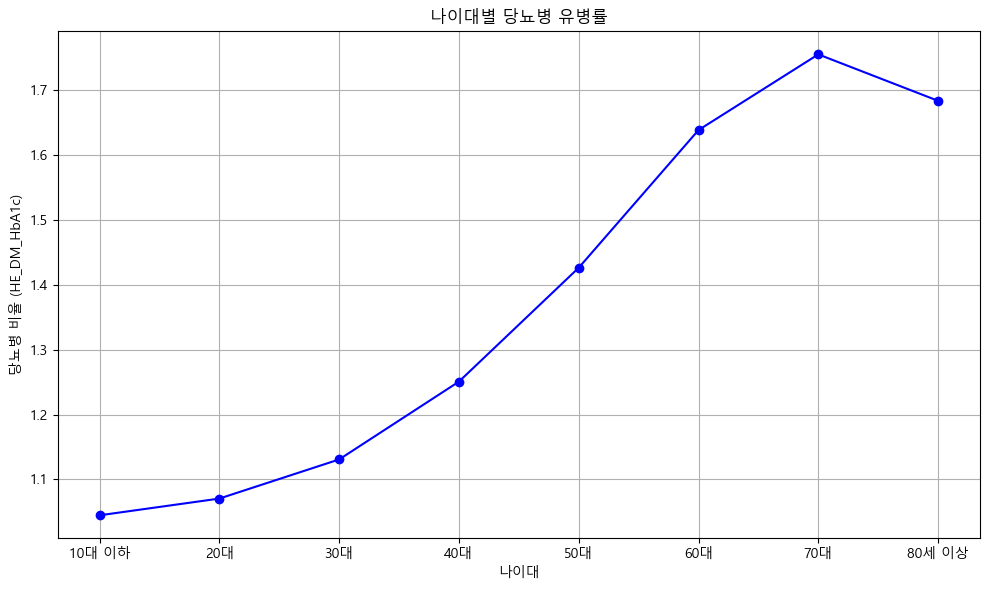

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. ÎÇòÏù¥ Í∑∏Î£π ÏÉùÏÑ± (AGE_GROUP Ïª¨Îüº Ï∂îÍ∞Ä)
bins = [0, 19, 29, 39, 49, 59, 69, 79, 120]  # 80ÏÑ∏ Ïù¥ÏÉÅ Ìè¨Ìï®
labels = ['10ÎåÄ Ïù¥Ìïò', '20ÎåÄ', '30ÎåÄ', '40ÎåÄ', '50ÎåÄ', '60ÎåÄ', '70ÎåÄ', '80ÏÑ∏ Ïù¥ÏÉÅ']

data['AGE_GROUP'] = pd.cut(data['age'], bins=bins, labels=labels, right=True)

# 2. ÎÇòÏù¥Í∑∏Î£πÎ≥Ñ ÎãπÎá®Î≥ë ÌèâÍ∑†Í∞í(= Ïú†Î≥ëÎ•†) Í≥ÑÏÇ∞
group_stats = data.groupby('AGE_GROUP')['HE_DM_HbA1c'].mean().reset_index()

# 3. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.plot(group_stats['AGE_GROUP'], group_stats['HE_DM_HbA1c'], marker='o', color='blue')
plt.xlabel('ÎÇòÏù¥ÎåÄ')
plt.ylabel('ÎãπÎá®Î≥ë ÎπÑÏú® (HE_DM_HbA1c)')
plt.title('ÎÇòÏù¥ÎåÄÎ≥Ñ ÎãπÎá®Î≥ë Ïú†Î≥ëÎ•†')
plt.grid(True)
plt.tight_layout()
plt.show()

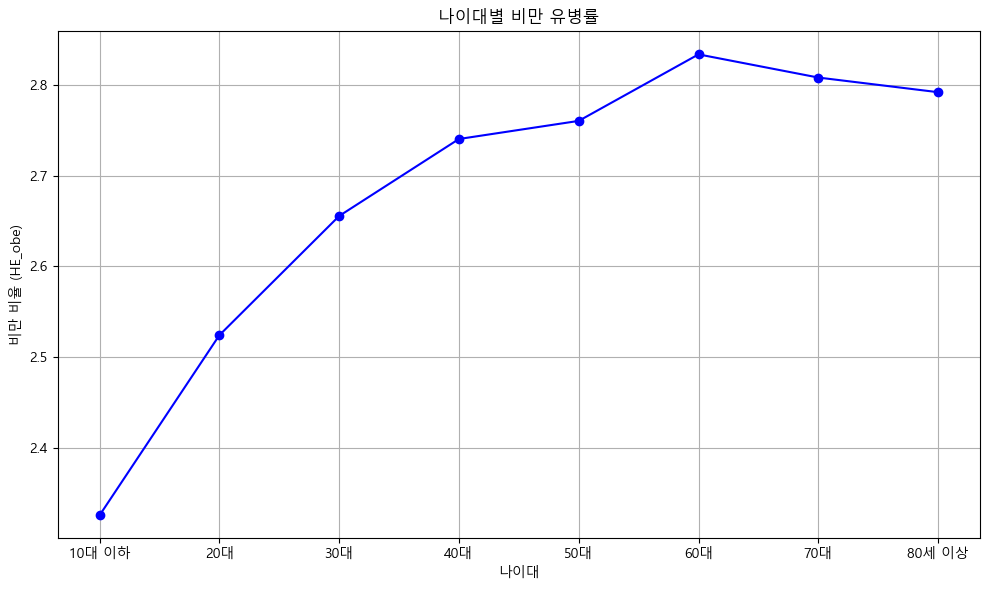

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. ÎÇòÏù¥ Í∑∏Î£π ÏÉùÏÑ± (AGE_GROUP Ïª¨Îüº Ï∂îÍ∞Ä)
bins = [0, 19, 29, 39, 49, 59, 69, 79, 120]  # 80ÏÑ∏ Ïù¥ÏÉÅ Ìè¨Ìï®
labels = ['10ÎåÄ Ïù¥Ìïò', '20ÎåÄ', '30ÎåÄ', '40ÎåÄ', '50ÎåÄ', '60ÎåÄ', '70ÎåÄ', '80ÏÑ∏ Ïù¥ÏÉÅ']

data['AGE_GROUP'] = pd.cut(data['age'], bins=bins, labels=labels, right=True)

# 2. ÎÇòÏù¥Í∑∏Î£πÎ≥Ñ ÎãπÎá®Î≥ë ÌèâÍ∑†Í∞í(= Ïú†Î≥ëÎ•†) Í≥ÑÏÇ∞
group_stats = data.groupby('AGE_GROUP')['HE_obe'].mean().reset_index()

# 3. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.plot(group_stats['AGE_GROUP'], group_stats['HE_obe'], marker='o', color='blue')
plt.xlabel('ÎÇòÏù¥ÎåÄ')
plt.ylabel('ÎπÑÎßå ÎπÑÏú® (HE_obe)')
plt.title('ÎÇòÏù¥ÎåÄÎ≥Ñ ÎπÑÎßå Ïú†Î≥ëÎ•†')
plt.grid(True)
plt.tight_layout()
plt.show()

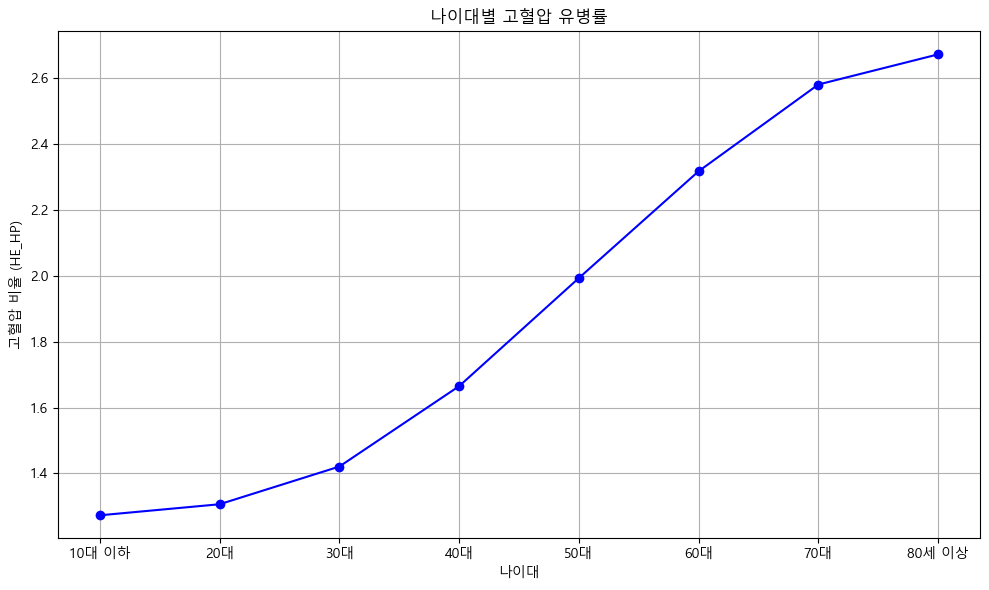

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. ÎÇòÏù¥ Í∑∏Î£π ÏÉùÏÑ± (AGE_GROUP Ïª¨Îüº Ï∂îÍ∞Ä)
bins = [0, 19, 29, 39, 49, 59, 69, 79, 120]  # 80ÏÑ∏ Ïù¥ÏÉÅ Ìè¨Ìï®
labels = ['10ÎåÄ Ïù¥Ìïò', '20ÎåÄ', '30ÎåÄ', '40ÎåÄ', '50ÎåÄ', '60ÎåÄ', '70ÎåÄ', '80ÏÑ∏ Ïù¥ÏÉÅ']

data['AGE_GROUP'] = pd.cut(data['age'], bins=bins, labels=labels, right=True)

# 2. ÎÇòÏù¥Í∑∏Î£πÎ≥Ñ ÎãπÎá®Î≥ë ÌèâÍ∑†Í∞í(= Ïú†Î≥ëÎ•†) Í≥ÑÏÇ∞
group_stats = data.groupby('AGE_GROUP')['HE_HP'].mean().reset_index()

# 3. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.plot(group_stats['AGE_GROUP'], group_stats['HE_HP'], marker='o', color='blue')
plt.xlabel('ÎÇòÏù¥ÎåÄ')
plt.ylabel('Í≥†ÌòàÏïï ÎπÑÏú® (HE_HP)')
plt.title('ÎÇòÏù¥ÎåÄÎ≥Ñ Í≥†ÌòàÏïï Ïú†Î≥ëÎ•†')
plt.grid(True)
plt.tight_layout()
plt.show()

**ÎãπÎá®Î≥ë ÏòàÏ∏° Î™®Îç∏ ÏÑ†Ï†ï**


‚ñ∂ Mean F1 score (CV) of D_tree: 92.35%
‚ñ∂ Test F1 score of D_tree: 38.03%
‚ñ∂ Test Accuracy of D_tree: 53.97%

‚ñ∂ Mean F1 score (CV) of RF: 92.78%
‚ñ∂ Test F1 score of RF: 38.03%
‚ñ∂ Test Accuracy of RF: 53.97%


  File "C:\Users\asia\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\anaconda3\envs\py312ff2\Lib\subprocess.py", line 550, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\anaconda3\envs\py312ff2\Lib\subprocess.py", line 1028, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\anaconda3\envs\py312ff2\Lib\subprocess.py", line 1540, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



‚ñ∂ Mean F1 score (CV) of HistGB: 95.60%
‚ñ∂ Test F1 score of HistGB: 38.03%
‚ñ∂ Test Accuracy of HistGB: 53.97%

‚ñ∂ Mean F1 score (CV) of XGB: 95.69%
‚ñ∂ Test F1 score of XGB: 3.98%
‚ñ∂ Test Accuracy of XGB: 15.14%
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 11188, number of used features: 11
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 11189, number of used features: 11
[LightGBM] [Info] Start training from scor

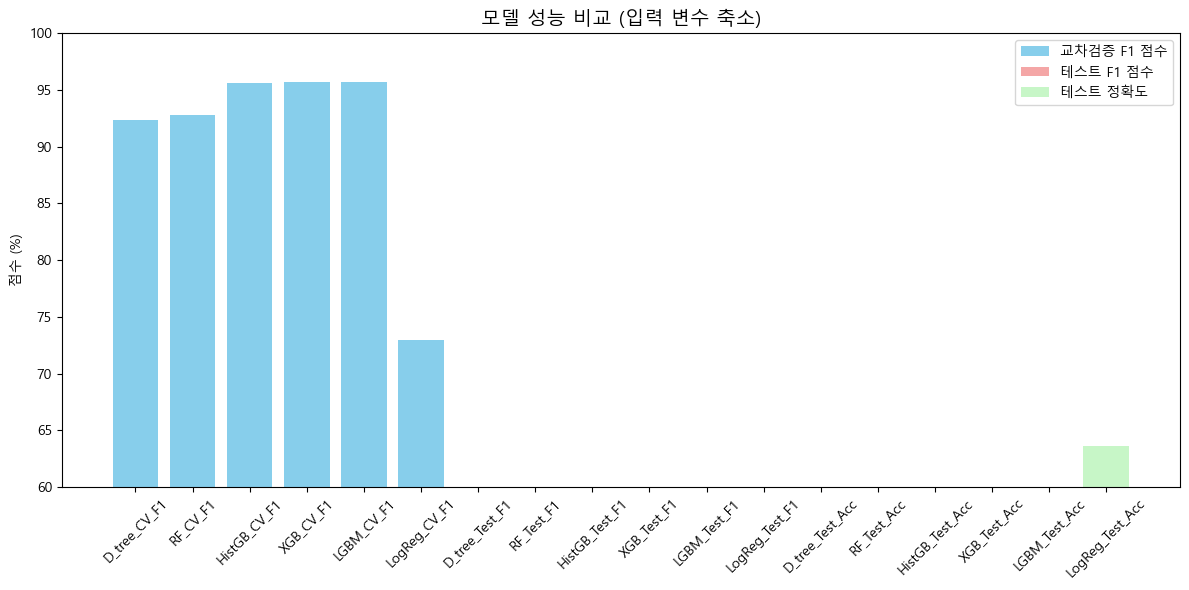

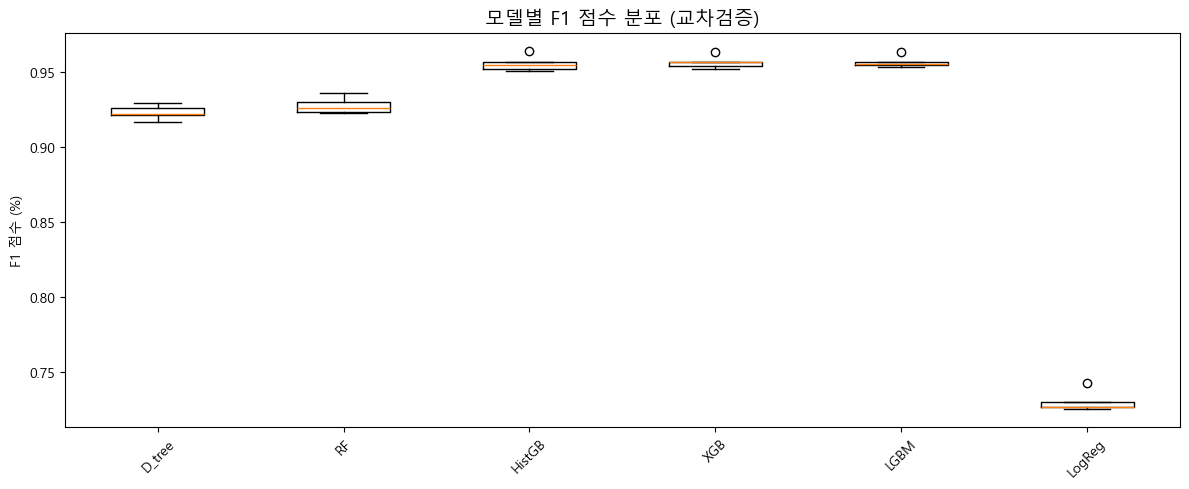

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# ÏûÖÎ†• ÌîºÏ≤ò Î∞è ÌÉÄÍ≤ü ÏÑ§Ï†ï
HE_DM_HbA1c_input_features = ['HE_HbA1c','HE_glu', 'HE_wc',  'HE_sbp1', 'HE_BMI', 'HE_TG', 'HE_chol', 'HE_LDL_drct', 'HE_HDL_st2', 'sex', 'age']
X = data[HE_DM_HbA1c_input_features]
y = data['HE_DM_HbA1c'].astype(int) - 1

# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# SMOTEÎ°ú Ïò§Î≤ÑÏÉòÌîåÎßÅ
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Î∂ÑÎ•òÍ∏∞ Ï†ïÏùò
classifiers = [
    ('D_tree', DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=0, class_weight='balanced')),
    ('RF', RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0, class_weight='balanced')),
    ('HistGB', HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=0)),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)),
    ('LGBM', LGBMClassifier(random_state=0, class_weight='balanced')),
    ('LogReg', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=0))
]

classifier_names = [name for name, _ in classifiers]
classifiers = [clf for _, clf in classifiers]

# Í≤∞Í≥º Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏
modelaccuracies = []
modelmeans = []
modelnames = []
modeltest_f1 = []
modeltest_acc = []

# Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä
for classifier_name, classifier in zip(classifier_names, classifiers):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = cross_val_score(classifier, X_train_smote, y_train_smote, cv=skf, scoring='f1_weighted')
    print(f"\n‚ñ∂ Mean F1 score (CV) of {classifier_name}: {accuracies.mean()*100:.2f}%")
    modelaccuracies.append(accuracies)
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100)

    classifier.fit(X_train_smote, y_train_smote)
    y_pred = classifier.predict(X_test_scaled)
    test_f1 = f1_score(y_test, y_pred, average='weighted')
    test_acc = accuracy_score(y_test, y_pred)
    modeltest_f1.append(test_f1*100)
    modeltest_acc.append(test_acc*100)
    print(f"‚ñ∂ Test F1 score of {classifier_name}: {test_f1*100:.2f}%")
    print(f"‚ñ∂ Test Accuracy of {classifier_name}: {test_acc*100:.2f}%")

# ÏÑ±Îä• Î∞î Ï∞®Ìä∏ (CV, Test F1, Test Accuracy)
plt.figure(figsize=(12, 6))
plt.ylim([60, 100])
plt.bar([name + "_CV_F1" for name in modelnames], modelmeans, color='skyblue', label='ÍµêÏ∞®Í≤ÄÏ¶ù F1 Ï†êÏàò')
plt.bar([name + "_Test_F1" for name in modelnames], modeltest_f1, color='lightcoral', label='ÌÖåÏä§Ìä∏ F1 Ï†êÏàò', alpha=0.7)
plt.bar([name + "_Test_Acc" for name in modelnames], modeltest_acc, color='lightgreen', label='ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ', alpha=0.5)

plt.xticks(rotation=45)
plt.ylabel('Ï†êÏàò (%)')
plt.title('Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê (ÏûÖÎ†• Î≥ÄÏàò Ï∂ïÏÜå)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

# Boxplot (CV F1 Î∂ÑÌè¨)
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames, rotation=45)
ax.set_ylabel('F1 Ï†êÏàò (%)')
ax.set_title('Î™®Îç∏Î≥Ñ F1 Ï†êÏàò Î∂ÑÌè¨ (ÍµêÏ∞®Í≤ÄÏ¶ù)', fontsize=14)
plt.tight_layout()
plt.show()


In [76]:
import pandas as pd
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np


# 2. XÏôÄ y Ï†ïÏùò
HE_DM_HbA1c_input_features = ['HE_glu', 'HE_wc', 'HE_sbp1', 'HE_BMI', 'HE_TG', 'HE_chol', 'HE_LDL_drct', 'HE_HDL_st2', 'sex', 'age']

X = data[HE_DM_HbA1c_input_features]
y = data['HE_DM_HbA1c'].astype(int) - 1 


# 3. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (ÌõàÎ†® ÏÑ∏Ìä∏, ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


# 4. Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. SMOTEÎ°ú Ïò§Î≤ÑÏÉòÌîåÎßÅ
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train) # Ïä§ÏºÄÏùºÎßÅÎêú Îç∞Ïù¥ÌÑ∞Ïóê SMOTE Ï†ÅÏö©


# 6. HistGradientBoostingClassifier Ï†ïÏùò Î∞è ÌïôÏäµ    0.1, 100, 0 Ïùº Îïå Ï†ïÌôïÎèÑ 76%,  0.44      0.42      0.43
hgb_clf = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=0)

# ÍµêÏ∞® Í≤ÄÏ¶ù (SMOTE Ï†ÅÏö© Îç∞Ïù¥ÌÑ∞Î°ú CV ÏàòÌñâ)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_f1_scores = cross_val_score(hgb_clf, X_train_smote, y_train_smote, cv=skf, scoring='f1_weighted', n_jobs=1)

print(f"‚ñ∂ HistGradientBoostingClassifierÏùò ÌèâÍ∑† F1 Ï†êÏàò (5-Fold CV): {cv_f1_scores.mean()*100:.2f}%")
print(f"Í∞Å Ìè¥ÎìúÏùò F1 Ï†êÏàò: {cv_f1_scores}")

# ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ (Ï†ÑÏ≤¥ SMOTE ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)
hgb_clf.fit(X_train_smote, y_train_smote)

# 7. ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = hgb_clf.predict(X_test_scaled)
y_proba = hgb_clf.predict_proba(X_test_scaled) # ÌôïÎ•† ÏòàÏ∏° (ÌïÑÏöîÏãú ÏûÑÍ≥ÑÍ∞í Ï°∞Ï†ïÏö©)

THRESHOLD_CLASS1 = 0.32
THRESHOLD_CLASS2 = 0.5  # Í∏∞Ï°¥ Ïú†ÏßÄ

y_pred_thresholded = []
for probs in y_proba:
    if probs[1] > THRESHOLD_CLASS1:
        y_pred_thresholded.append(1)
    elif probs[2] > THRESHOLD_CLASS2:
        y_pred_thresholded.append(2)
    else:
        y_pred_thresholded.append(0)




print("\n--- HistGradientBoostingClassifier ÏµúÏ¢Ö ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ ÌèâÍ∞Ä Í≤∞Í≥º ---")
target_names = ['Ï†ïÏÉÅ (Class 0)', 'ÎãπÎá®Î≥ëÏ†ÑÎã®Í≥Ñ (Class 1)', 'ÎãπÎá®Î≥ë (Class 2)']

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

test_f1 = f1_score(y_test, y_pred, average='weighted')
test_acc = accuracy_score(y_test, y_pred)
print(f"‚ñ∂ ÌÖåÏä§Ìä∏ F1 Ï†êÏàò (Weighted): {test_f1*100:.2f}%")
print(f"‚ñ∂ ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: {test_acc*100:.2f}%")

# ÌÅ¥ÎûòÏä§Î≥Ñ Ï†ïÎ∞ÄÎèÑ, Ïû¨ÌòÑÏú®, F1-score ÏÉÅÏÑ∏ Ï∂úÎ†•
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1, 2])
print("\nÌÅ¥ÎûòÏä§Î≥Ñ Ï†ïÎ∞ÄÎèÑ, Ïû¨ÌòÑÏú®, F1-score:")
for i, (p, r, f, s) in enumerate(zip(precision, recall, fscore, support)):
    print(f"  {target_names[i]}: Precision={p:.4f}, Recall={r:.4f}, F1-score={f:.4f}, Support={s}")

# ÌäπÌûà ÎãπÎá®Î≥ëÏ†ÑÎã®Í≥Ñ (Class 1)Ïùò ÏÑ±Îä• Í∞ïÏ°∞
pre_diabetes_precision = precision[1]
pre_diabetes_recall = recall[1]
pre_diabetes_f1 = fscore[1]
print(f"\n** ÎãπÎá®Î≥ëÏ†ÑÎã®Í≥Ñ (Class 1) ÏÑ±Îä•: **")
print(f"   Precision: {pre_diabetes_precision:.4f}")
print(f"   Recall: {pre_diabetes_recall:.4f}")
print(f"   F1-score: {pre_diabetes_f1:.4f}")

‚ñ∂ HistGradientBoostingClassifierÏùò ÌèâÍ∑† F1 Ï†êÏàò (5-Fold CV): 83.54%
Í∞Å Ìè¥ÎìúÏùò F1 Ï†êÏàò: [0.83471112 0.83731899 0.83912022 0.83285933 0.83301089]

--- HistGradientBoostingClassifier ÏµúÏ¢Ö ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ ÌèâÍ∞Ä Í≤∞Í≥º ---

Classification Report:
                  precision    recall  f1-score   support

    Ï†ïÏÉÅ (Class 0)       0.87      0.85      0.86      7917
ÎãπÎá®Î≥ëÏ†ÑÎã®Í≥Ñ (Class 1)       0.49      0.45      0.47      1759
   ÎãπÎá®Î≥ë (Class 2)       0.63      0.77      0.69      1378

        accuracy                           0.78     11054
       macro avg       0.66      0.69      0.67     11054
    weighted avg       0.78      0.78      0.78     11054

‚ñ∂ ÌÖåÏä§Ìä∏ F1 Ï†êÏàò (Weighted): 77.75%
‚ñ∂ ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: 77.77%

ÌÅ¥ÎûòÏä§Î≥Ñ Ï†ïÎ∞ÄÎèÑ, Ïû¨ÌòÑÏú®, F1-score:
  Ï†ïÏÉÅ (Class 0): Precision=0.8705, Recall=0.8527, F1-score=0.8615, Support=7917
  ÎãπÎá®Î≥ëÏ†ÑÎã®Í≥Ñ (Class 1): Precision=0.4895, Recall=0.4491, F1-score=0.4684, Support=1759
  ÎãπÎá®Î≥ë

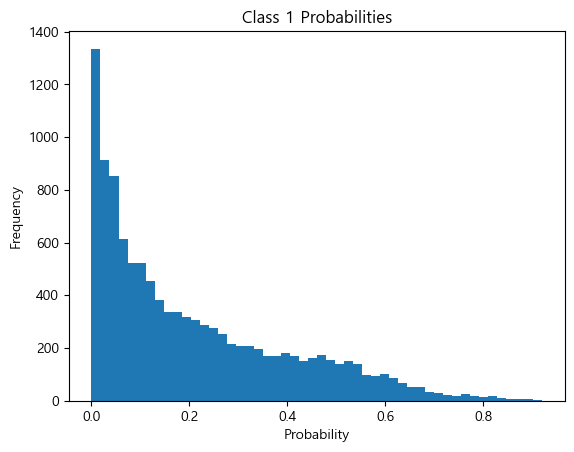

In [77]:
import matplotlib.pyplot as plt

class1_probs = y_proba[:, 1]
plt.hist(class1_probs, bins=50)
plt.title("Class 1 Probabilities")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()

xÏ∂ï (Probability): Î™®Îç∏Ïù¥ ÌÖåÏä§Ìä∏ ÏÉòÌîå Í∞ÅÍ∞ÅÏóê ÎåÄÌï¥ "Ïù¥ ÏÉòÌîåÏùÄ Class 1Ïùº ÌôïÎ•†"Ïù¥ÎùºÍ≥† ÌåêÎã®Ìïú Í∞í

yÏ∂ï (Frequency): Ìï¥Îãπ ÌôïÎ•†ÎåÄÏóê ÏÜçÌïú ÏÉòÌîåÏùò Ïàò  
üìå Í¥ÄÏ∞∞Îêú Ìå®ÌÑ¥:
ÎåÄÎ∂ÄÎ∂ÑÏùò ÏÉòÌîåÏù¥ 0.0 ~ 0.2 ÏÇ¨Ïù¥Ïóê Î™∞Î†§ ÏûàÏùå

0.4 Ïù¥ÏÉÅÏù∏ ÏÉòÌîåÏùÄ Í±∞Ïùò ÏóÜÏùå

ÌïòÏßÄÎßå 0.3~0.5ÏóêÎèÑ Ïñ¥Îäê Ï†ïÎèÑ ÏÉòÌîåÏù¥ ÏûàÏùå ‚Üí Ïû†Ïû¨Ï†ÅÏúºÎ°ú Class 1Ïùº Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÎäî ÏòÅÏó≠

In [101]:
print(data['HE_DM_HbA1c'].value_counts(dropna=False))

HE_DM_HbA1c
1.0    41727
2.0     8801
3.0     7348
Name: count, dtype: int64


In [116]:
print(data['HE_HP'].value_counts(dropna=False))


HE_HP
1.0    25102
3.0    17861
2.0    12987
4.0     1926
Name: count, dtype: int64


Î™®Îç∏ ÏÑ†Ï†ï : HistGB vs XGBoost

In [ ]:
import pandas as pd
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np

# 2. XÏôÄ y Ï†ïÏùò
HE_DM_HbA1c_input_features = ['HE_glu', 'HE_wc', 'HE_sbp1', 'HE_BMI', 'HE_TG', 'HE_chol', 'HE_LDL_drct', 'HE_HDL_st2', 'sex', 'age']

X = data[HE_DM_HbA1c_input_features]
y = data['HE_DM_HbA1c'].astype(int) - 1 


# 3. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (ÌõàÎ†® ÏÑ∏Ìä∏, ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


# 4. Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. SMOTEÎ°ú Ïò§Î≤ÑÏÉòÌîåÎßÅ
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train) # Ïä§ÏºÄÏùºÎßÅÎêú Îç∞Ïù¥ÌÑ∞Ïóê SMOTE Ï†ÅÏö©


# 6. HistGradientBoostingClassifier Ï†ïÏùò Î∞è ÌïôÏäµ    0.1, 100, 0 Ïùº Îïå Ï†ïÌôïÎèÑ 76%,  0.44      0.42      0.43
hgb_clf = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=0)

# ÍµêÏ∞® Í≤ÄÏ¶ù (SMOTE Ï†ÅÏö© Îç∞Ïù¥ÌÑ∞Î°ú CV ÏàòÌñâ)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_f1_scores = cross_val_score(hgb_clf, X_train_smote, y_train_smote, cv=skf, scoring='f1_weighted', n_jobs=-1)

print(f"‚ñ∂ HistGradientBoostingClassifierÏùò ÌèâÍ∑† F1 Ï†êÏàò (5-Fold CV): {cv_f1_scores.mean()*100:.2f}%")
print(f"Í∞Å Ìè¥ÎìúÏùò F1 Ï†êÏàò: {cv_f1_scores}")

# ÏµúÏ¢Ö Î™®Îç∏ ÌïôÏäµ (Ï†ÑÏ≤¥ SMOTE ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)
hgb_clf.fit(X_train_smote, y_train_smote)

# 7. ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = hgb_clf.predict(X_test_scaled)
y_proba = hgb_clf.predict_proba(X_test_scaled) # ÌôïÎ•† ÏòàÏ∏° (ÌïÑÏöîÏãú ÏûÑÍ≥ÑÍ∞í Ï°∞Ï†ïÏö©)

print("\n--- HistGradientBoostingClassifier ÏµúÏ¢Ö ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ ÌèâÍ∞Ä Í≤∞Í≥º ---")
target_names = ['Ï†ïÏÉÅ (Class 0)', 'ÎãπÎá®Î≥ëÏ†ÑÎã®Í≥Ñ (Class 1)', 'ÎãπÎá®Î≥ë (Class 2)']

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

test_f1 = f1_score(y_test, y_pred, average='weighted')
test_acc = accuracy_score(y_test, y_pred)
print(f"‚ñ∂ ÌÖåÏä§Ìä∏ F1 Ï†êÏàò (Weighted): {test_f1*100:.2f}%")
print(f"‚ñ∂ ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: {test_acc*100:.2f}%")

# ÌÅ¥ÎûòÏä§Î≥Ñ Ï†ïÎ∞ÄÎèÑ, Ïû¨ÌòÑÏú®, F1-score ÏÉÅÏÑ∏ Ï∂úÎ†•
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average=None, labels=[0, 1, 2])
print("\nÌÅ¥ÎûòÏä§Î≥Ñ Ï†ïÎ∞ÄÎèÑ, Ïû¨ÌòÑÏú®, F1-score:")
for i, (p, r, f, s) in enumerate(zip(precision, recall, fscore, support)):
    print(f"  {target_names[i]}: Precision={p:.4f}, Recall={r:.4f}, F1-score={f:.4f}, Support={s}")

# ÌäπÌûà ÎãπÎá®Î≥ëÏ†ÑÎã®Í≥Ñ (Class 1)Ïùò ÏÑ±Îä• Í∞ïÏ°∞
pre_diabetes_precision = precision[1]
pre_diabetes_recall = recall[1]
pre_diabetes_f1 = fscore[1]
print(f"\n** ÎãπÎá®Î≥ëÏ†ÑÎã®Í≥Ñ (Class 1) ÏÑ±Îä•: **")
print(f"   Precision: {pre_diabetes_precision:.4f}")
print(f"   Recall: {pre_diabetes_recall:.4f}")
print(f"   F1-score: {pre_diabetes_f1:.4f}")

**Í≥†ÌòàÏïï Îã§Ï§ë Î™®Îç∏ ÎπÑÍµê**


‚ñ∂ Mean F1 score (CV) of D_tree: 64.50%
‚ñ∂ Test F1 score of D_tree: 62.61%
‚ñ∂ Test Accuracy of D_tree: 58.55%

‚ñ∂ Mean F1 score (CV) of RF: 69.05%
‚ñ∂ Test F1 score of RF: 69.26%
‚ñ∂ Test Accuracy of RF: 67.80%

‚ñ∂ Mean F1 score (CV) of HistGB: 73.55%
‚ñ∂ Test F1 score of HistGB: 74.16%
‚ñ∂ Test Accuracy of HistGB: 74.00%

‚ñ∂ Mean F1 score (CV) of XGB: 73.32%
‚ñ∂ Test F1 score of XGB: 73.98%
‚ñ∂ Test Accuracy of XGB: 74.04%
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000766 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3534
[LightGBM] [Info] Number of data points in the train set: 35369, number of used features: 16
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Auto-choosing col-wise multi-threading, th

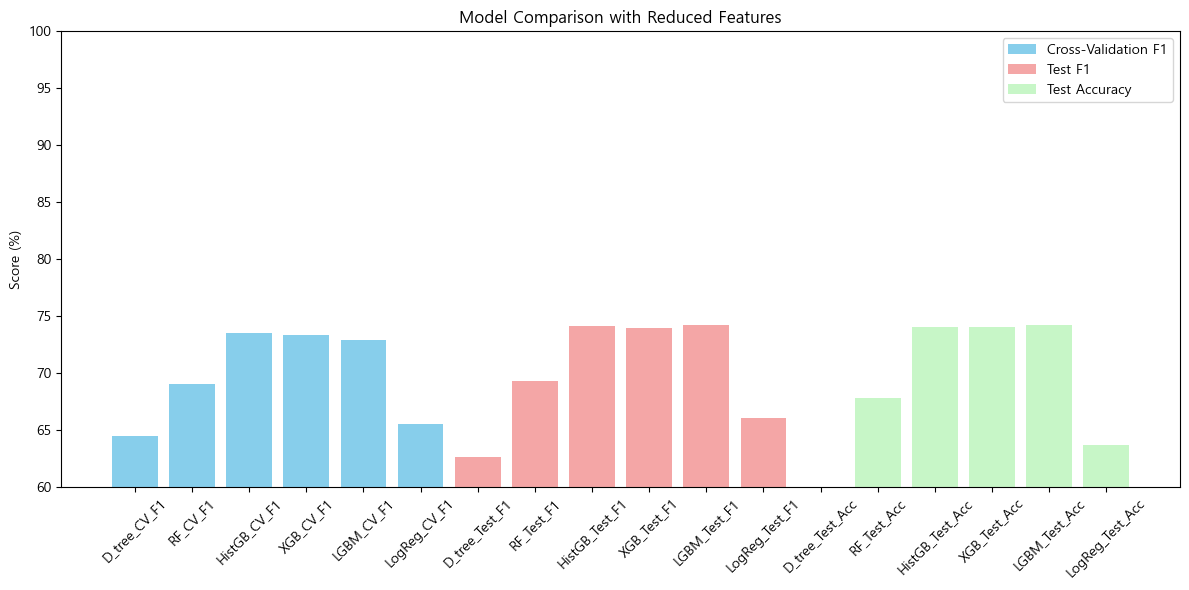

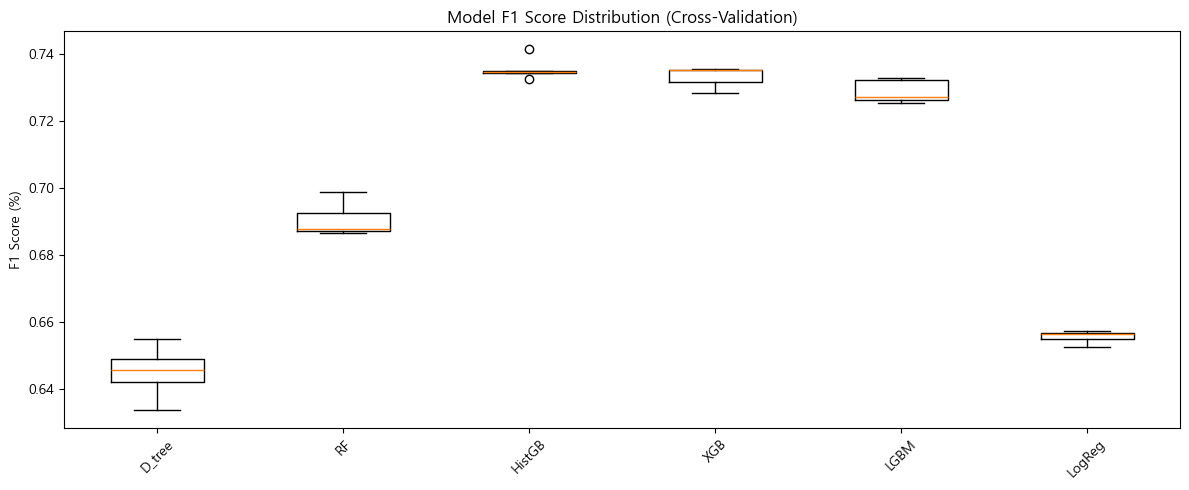

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


# ÏûÖÎ†• ÌîºÏ≤ò Î∞è ÌÉÄÍ≤ü ÏÑ§Ï†ï
HE_HP_input_features= ['age','HE_sbp1', 'HE_dbp1',  'HE_wc', 'HE_glu', 'HE_BMI', 'HE_TG', 'HE_crea', 'HE_ast', 'HE_chol', 'HE_LDL_drct', 'HE_HDL_st2']

# XÏôÄ y Ï†ïÏùò
X = data[HE_HP_input_features]
y = data['HE_HP'].astype(int) - 1

# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SMOTEÎ°ú Ïò§Î≤ÑÏÉòÌîåÎßÅ
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Î∂ÑÎ•òÍ∏∞ Ï†ïÏùò
classifiers = [
    ('D_tree', DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=0, class_weight='balanced')),
    ('RF', RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0, class_weight='balanced')),
    ('HistGB', HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=0)),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)),
    ('LGBM', LGBMClassifier(random_state=0, class_weight='balanced')),
    ('LogReg', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=0))
]

classifier_names = [name for name, _ in classifiers]
classifiers = [clf for _, clf in classifiers]

# Í≤∞Í≥º Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏
modelaccuracies = []
modelmeans = []
modelnames = []
modeltest_f1 = []
modeltest_acc = []

# Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä
for classifier_name, classifier in zip(classifier_names, classifiers):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = cross_val_score(classifier, X_train, y_train, cv=skf, scoring='f1_weighted')
    print(f"\n‚ñ∂ Mean F1 score (CV) of {classifier_name}: {accuracies.mean()*100:.2f}%")
    modelaccuracies.append(accuracies)
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100)

    classifier.fit(X_train_smote, y_train_smote)
    y_pred = classifier.predict(X_test)
    test_f1 = f1_score(y_test, y_pred, average='weighted')
    test_acc = accuracy_score(y_test, y_pred)
    modeltest_f1.append(test_f1*100)
    modeltest_acc.append(test_acc*100)
    print(f"‚ñ∂ Test F1 score of {classifier_name}: {test_f1*100:.2f}%")
    print(f"‚ñ∂ Test Accuracy of {classifier_name}: {test_acc*100:.2f}%")

# ÏÑ±Îä• ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
plt.ylim([60, 100])
plt.bar([name + "_CV_F1" for name in modelnames], modelmeans, color='skyblue', label='Cross-Validation F1')
plt.bar([name + "_Test_F1" for name in modelnames], modeltest_f1, color='lightcoral', label='Test F1', alpha=0.7)
plt.bar([name + "_Test_Acc" for name in modelnames], modeltest_acc, color='lightgreen', label='Test Accuracy', alpha=0.5)
plt.xticks(rotation=45)
plt.ylabel('Score (%)')
plt.title('Model Comparison with Reduced Features')
plt.legend()
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames, rotation=45)
ax.set_ylabel('F1 Score (%)')
ax.set_title('Model F1 Score Distribution (Cross-Validation)')
plt.tight_layout()
plt.show()


**Í≥†ÌòàÏïï Î™®Îç∏ ÏÑ†Ï†ï = HistGB**

In [180]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt


# ÏûÖÎ†• ÌîºÏ≤ò Î∞è ÌÉÄÍ≤ü ÏÑ§Ï†ï
HE_HP_input_features= ['HE_sbp1', 'HE_BMI','HE_dbp1',  'HE_wc', 'HE_glu', 'HE_TG', 'HE_crea', 'HE_ast', 'HE_chol', 'HE_LDL_drct', 'HE_HDL_st2']

# XÏôÄ y Ï†ïÏùò
X = data[HE_HP_input_features]
y = data['HE_HP'].astype(int) - 1

# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï† Î®ºÏ†Ä ÏàòÌñâ
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÎßå fit_transform
X_test_scaled = scaler.transform(X_test)  # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÎäî transformÎßå Ï†ÅÏö©


from sklearn.metrics import classification_report

from sklearn.utils.class_weight import compute_class_weight

# ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞ ('balanced'Îäî ÎπàÎèÑÏàòÏóê Î∞òÎπÑÎ°ÄÌïòÏó¨ ÏûêÎèô Í≥ÑÏÇ∞)
# compute_class_weight Ìï®ÏàòÏóê ÏõêÎ≥∏ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò y Í∞íÏùÑ Ï†ÑÎã¨Ìï¥Ïïº Ìï©ÎãàÎã§.
# ÎßåÏïΩ SMOTE Ï†ÅÏö© ÌõÑÏùò Îç∞Ïù¥ÌÑ∞Î°ú Í∞ÄÏ§ëÏπòÎ•º Í≥ÑÏÇ∞ÌïòÍ≥† Ïã∂Îã§Î©¥ y_train_smoteÎ•º Ï†ÑÎã¨Ìï©ÎãàÎã§.
classes = np.unique(y_train) # ÏõêÎ≥∏ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò ÌÅ¥ÎûòÏä§ Î†àÏù¥Î∏î
weights = compute_class_weight('balanced', classes=classes, y=y_train)

# Í≥ÑÏÇ∞Îêú Í∞ÄÏ§ëÏπòÎ•º ÎîïÏÖîÎÑàÎ¶¨ ÌòïÌÉúÎ°ú Î≥ÄÌôò {ÌÅ¥ÎûòÏä§_ÎùºÎ≤®: Í∞ÄÏ§ëÏπò}
class_weights_dict = dict(zip(classes, weights))

print(f"Í≥ÑÏÇ∞Îêú ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò: {class_weights_dict}")


# HistGradientBoostingClassifier Î™®Îç∏ ÌïôÏäµ (class_weight Ï†ÅÏö©)
# best_model = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42) # Í∏∞Ï°¥ Î™®Îç∏
# class_weight Îß§Í∞úÎ≥ÄÏàò Ï∂îÍ∞Ä
best_model_weighted = HistGradientBoostingClassifier(
    learning_rate=0.1,
    max_iter=100,
    random_state=42,
    class_weight=class_weights_dict # ÎòêÎäî 'balanced' Î¨∏ÏûêÏó¥ ÏÇ¨Ïö© Í∞ÄÎä•
)

# Ïä§ÏºÄÏùºÎßÅÎêú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµ (SMOTE ÎØ∏Ï†ÅÏö© Ïãú X_train_scaled ÏÇ¨Ïö©)
# ÎßåÏïΩ SMOTE Í≤∞Í≥ºÎ•º ÏÇ¨Ïö©ÌïúÎã§Î©¥ X_train_smote_scaled (SMOTE ÌõÑ Ïä§ÏºÄÏùºÎßÅÎêú Îç∞Ïù¥ÌÑ∞) ÏÇ¨Ïö©
best_model_weighted.fit(X_train_scaled, y_train)

# Ïä§ÏºÄÏùºÎßÅÎêú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú ÏòàÏ∏°
y_pred_weighted = best_model_weighted.predict(X_test_scaled)

# ÏÑ±Îä• ÌèâÍ∞Ä
print("\nClass Weight Ï†ÅÏö© ÌõÑ Classification Report:")
# y_testÎäî ÏõêÎ≥∏ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò ÎùºÎ≤®ÏûÖÎãàÎã§. ÏòàÏ∏° Í≤∞Í≥ºÏôÄ ÎπÑÍµêÌï©ÎãàÎã§.
print(classification_report(y_test, y_pred_weighted))

# Ï∂îÍ∞ÄÏ†ÅÏúºÎ°ú F1 Ïä§ÏΩîÏñ¥Î•º Í∞Å ÌÅ¥ÎûòÏä§Î≥ÑÎ°ú ÌôïÏù∏ÌïòÏó¨ Í∞úÏÑ†ÎêòÏóàÎäîÏßÄ ÎπÑÍµêÌï©ÎãàÎã§.
f1_weighted = f1_score(y_test, y_pred_weighted, average=None)
print(f"\nClass Weight Ï†ÅÏö© ÌõÑ ÌÅ¥ÎûòÏä§Î≥Ñ F1-score: {f1_weighted}")

Í≥ÑÏÇ∞Îêú ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò: {np.int64(0): np.float64(0.5643564356435643), np.int64(1): np.float64(3.1528384279475983), np.int64(2): np.float64(1.78125), np.int64(3): np.float64(0.7410195005131714)}

Class Weight Ï†ÅÏö© ÌõÑ Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       959
           1       0.34      0.49      0.40       172
           2       0.54      0.64      0.59       304
           3       0.73      0.63      0.67       731

    accuracy                           0.71      2166
   macro avg       0.62      0.65      0.63      2166
weighted avg       0.73      0.71      0.71      2166


Class Weight Ï†ÅÏö© ÌõÑ ÌÅ¥ÎûòÏä§Î≥Ñ F1-score: [0.84004237 0.4        0.58558559 0.67452135]


**Í≥†ÌòàÏïï Î™®Îç∏ ÏÑ†Ï†ï = HistGB + ÌååÏÉùÎ≥ÄÏàò Ï∂îÍ∞Ä**

In [97]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/102.4 MB ? eta -:--:--
   --- ------------------------------------ 9.7/102.4 MB 54.9 MB/s eta 0:00:02
   ---- ----------------------------------- 10.5/102.4 MB 36.3 MB/s eta 0:00:03
   ---- ----------------------------------- 11.5/102.4 MB 18.5 MB/s eta 0:00:05
   --------- ------------------------------ 24.4/102.4 MB 29.7 MB/s eta 0:00:03
   --------------- ------------------------ 39.8/102.4 MB 39.6 MB/s eta 0:00:02
   ------------------- -------------------- 50.6/102.4 MB 40.8 MB/s eta 0:00:02
   ----------------------- ---------------- 59.0/102.4 MB 41.3 MB/s eta 0:00:02
   -------------------------- ------------- 67.1/102.4 MB 40.3 MB/s eta 0:00:01
   -------------------------------- ------- 82.3/102.4 MB 43.8 MB/s eta 0:00:01
   -------------------------------------- - 97.8/102.4 MB 46.6 MB/s eta 0:00:01
   --------------------------------------  102.2/102

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
import shap

# 1. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (ÏòàÏãú Îç∞Ïù¥ÌÑ∞ Î°úÎìú, Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Î°ú ÎåÄÏ≤¥ ÌïÑÏöî)
# X, yÎäî Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Î°ú ÎåÄÏ≤¥Ìï¥Ïïº Ìï©ÎãàÎã§.
# Ïòà: df = pd.read_csv('your_data.csv')
HE_HP_input_features = ['HE_sbp1', 'HE_dbp1', 'HE_wc', 'HE_glu', 'HE_BMI', 
                        'HE_TG', 'HE_crea', 'HE_ast', 'HE_chol', 'HE_LDL_drct', 'HE_HDL_st2','age']

# XÏôÄ y Ï†ïÏùò
X = data[HE_HP_input_features]
y = data['HE_HP'].astype(int) - 1



# 2. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. ÌîºÏ≤ò Ï†ÑÏ≤òÎ¶¨: ÌëúÏ§ÄÌôî
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_train = pd.DataFrame(X_train_scaled, columns=HE_HP_input_features)
X_val = pd.DataFrame(X_val_scaled, columns=HE_HP_input_features)

# ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò ÏàòÎèô Ï°∞Ï†ï (ÌÅ¥ÎûòÏä§ 3 Í∞ÄÏ§ëÏπòÎ•º Îçî ÎÜíÍ≤å ÏÑ§Ï†ï)
class_weights = [1.0, 1.0, 1.0, 10.0]  # ÌÅ¥ÎûòÏä§ 3Ïóê 5Î∞∞ Í∞ÄÏ§ëÏπò Î∂ÄÏó¨

# 5. CatBoost Î™®Îç∏ Ï†ïÏùò Î∞è ÌïôÏäµ
model = CatBoostClassifier(
    # iterations=1000,
    # learning_rate=0.05,
    # depth=6,
    # class_weights=class_weights,
    # eval_metric='MultiClass',
    # random_seed=42,
    # verbose=100,
    # early_stopping_rounds=50
    iterations=1000,
    learning_rate=0.03,
    depth=6,
    class_weights=class_weights,
    eval_metric='MultiClass',
    random_seed=42,
    verbose=100,
    early_stopping_rounds=50
)
model.fit(X_train, y_train, eval_set=(X_val, y_val))

# 6. ÏÑ±Îä• ÌèâÍ∞Ä
y_pred = model.predict(X_val)
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))


0:	learn: 1.3583753	test: 1.3583893	best: 1.3583893 (0)	total: 8.77ms	remaining: 8.76s
100:	learn: 0.8067331	test: 0.8191734	best: 0.8191734 (100)	total: 473ms	remaining: 4.21s
200:	learn: 0.7439286	test: 0.7738662	best: 0.7738662 (200)	total: 928ms	remaining: 3.69s
300:	learn: 0.7116814	test: 0.7564964	best: 0.7564964 (300)	total: 1.38s	remaining: 3.21s
400:	learn: 0.6841577	test: 0.7446773	best: 0.7446773 (400)	total: 1.82s	remaining: 2.72s
500:	learn: 0.6580274	test: 0.7339113	best: 0.7339113 (500)	total: 2.25s	remaining: 2.24s
600:	learn: 0.6356619	test: 0.7271453	best: 0.7271453 (600)	total: 2.68s	remaining: 1.78s
700:	learn: 0.6164486	test: 0.7236535	best: 0.7235086 (690)	total: 3.11s	remaining: 1.33s
800:	learn: 0.5987552	test: 0.7204558	best: 0.7204010 (799)	total: 3.55s	remaining: 883ms
900:	learn: 0.5830293	test: 0.7189527	best: 0.7188633 (896)	total: 3.99s	remaining: 438ms
999:	learn: 0.5678944	test: 0.7173853	best: 0.7172271 (992)	total: 4.43s	remaining: 0us

bestTest = 0.7

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier # LightGBM (LGBM)
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier # HistGradientBoostingClassifier (HistGB)
from sklearn.ensemble import VotingClassifier, StackingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline # imblearnÏùò ÌååÏù¥ÌîÑÎùºÏù∏
from sklearn.pipeline import Pipeline # sklearnÏùò ÌååÏù¥ÌîÑÎùºÏù∏

# Í≤ΩÍ≥† Î©îÏãúÏßÄ Î¨¥Ïãú (ÏÑ†ÌÉù ÏÇ¨Ìï≠)
import warnings
warnings.filterwarnings('ignore')

# --- 0. Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ± (Ïù¥Ï†Ñ ÏΩîÎìúÏóêÏÑú Í∞ÄÏ†∏Ïò§Í∏∞) ---
# 'data' DataFrameÏù¥ Ïù¥ÎØ∏ Î°úÎìúÎêòÏñ¥ ÏûàÎã§Í≥† Í∞ÄÏ†ïÌï©ÎãàÎã§.
# Ïòà: data = pd.read_csv('Í±¥Í∞ïÏ°∞ÏÇ¨_2012~2022_ÌÜµÌï©(Í∞ÄÍ≥µÎêú).csv')



# ÏûÖÎ†• ÌîºÏ≤ò Î∞è ÌÉÄÍ≤ü ÏÑ§Ï†ï
HE_HP_input_features = [
     'age',
    'HE_sbp1', 'HE_dbp1', 'HE_wc', 'HE_glu', 'HE_BMI', 'HE_TG',
    'HE_crea', 'HE_ast', 'HE_chol', 'HE_LDL_drct', 'HE_HDL_st2'
] # 'age'Í∞Ä Ìè¨Ìï®ÎêòÏñ¥ ÏûàÎäîÏßÄ Îã§Ïãú ÌôïÏù∏

# XÏôÄ y Ï†ïÏùò
X = data[HE_HP_input_features]
y = data['HE_HP'].astype(int) - 1

# --- 1. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- 2. Ï†ÑÏ≤òÎ¶¨ Î∞è ÏÉòÌîåÎßÅ ÌååÏù¥ÌîÑÎùºÏù∏ Ï†ïÏùò ---
# Ïä§ÏºÄÏùºÎßÅ -> SMOTE (Ïò§Î≤ÑÏÉòÌîåÎßÅ) -> RandomUnderSampler (Ïñ∏ÎçîÏÉòÌîåÎßÅ)

# Î™©Ìëú ÌÅ¥ÎûòÏä§ Î∂ÑÌè¨ ÏÑ§Ï†ï (Ïù¥Ï†ÑÍ≥º ÎèôÏùºÌïòÍ≤å ÌÅ¥ÎûòÏä§ 1Ïùò ÏàòÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÎßûÏ∂∞Î¥ÖÎãàÎã§. Ïù¥ ÎπÑÏú®ÏùÄ ÌäúÎãù ÌïÑÏöî!)
# ÌòÑÏû¨ ÌÅ¥ÎûòÏä§ Ïàò (ÏòàÏãú): 0:4830, 1:2501, 2:3360, 3:363
sampling_strategy = {
    0: 3000,  # ÌÅ¥ÎûòÏä§ 0ÏùÑ 3000Í∞úÎ°ú Ïñ∏ÎçîÏÉòÌîåÎßÅ (Ï°∞Ï†à Í∞ÄÎä•)
    1: 2501,  # ÌÅ¥ÎûòÏä§ 1ÏùÄ Í∑∏ÎåÄÎ°ú Ïú†ÏßÄ
    2: 3000,  # ÌÅ¥ÎûòÏä§ 2Î•º 3000Í∞úÎ°ú Ïñ∏ÎçîÏÉòÌîåÎßÅ (Ï°∞Ï†à Í∞ÄÎä•)
    3: 1500   # ÌÅ¥ÎûòÏä§ 3ÏùÑ 1500Í∞úÎ°ú Ïò§Î≤ÑÏÉòÌîåÎßÅ (Ï°∞Ï†à Í∞ÄÎä•)
}

preprocessor_pipeline = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('rus', RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42))
])

# Ï†ÑÏ≤òÎ¶¨ Î∞è ÏÉòÌîåÎßÅ Ï†ÅÏö©
X_train_processed, y_train_processed = preprocessor_pipeline.fit_resample(X_train, y_train)
X_test_processed = preprocessor_pipeline.named_steps['scaler'].transform(X_test) # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Îäî Ïä§ÏºÄÏùºÎßÅÎßå

print(f"Original train set shape: {X_train.shape}, {y_train.shape}")
print(f"Resampled train set shape: {X_train_processed.shape}, {y_train_processed.shape}")
print(f"Resampled class distribution:\n{pd.Series(y_train_processed).value_counts().sort_index()}")


# --- 3. Í∞úÎ≥Ñ Í∏∞Î≥∏ Î™®Îç∏ Ï†ïÏùò (HistGB Î∞è LGBM Ìè¨Ìï®) ---
estimators = [
    ('catboost', CatBoostClassifier(iterations=500, learning_rate=0.03, depth=6,
                                    eval_metric='MultiClass', random_seed=42, verbose=0, early_stopping_rounds=50)),
    ('histgb', HistGradientBoostingClassifier(learning_rate=0.1, max_iter=300, random_state=42)), # HistGradientBoostingClassifier Ï∂îÍ∞Ä
    ('xgb', XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=6,
                          use_label_encoder=False, eval_metric='mlogloss', random_state=42)),
    ('lgbm', LGBMClassifier(n_estimators=300, learning_rate=0.05, num_leaves=31,
                            random_state=42, class_weight='balanced')) # LightGBM Ïú†ÏßÄ
]

# --- 4. Î≥¥ÌåÖ Î∂ÑÎ•òÍ∏∞ (VotingClassifier) ---
print("\n--- VotingClassifier ÌïôÏäµ Î∞è ÌèâÍ∞Ä ---")
# ÏÜåÌîÑÌä∏ Î≥¥ÌåÖ: Í∞Å Î™®Îç∏Ïùò ÏòàÏ∏° ÌôïÎ•†ÏùÑ ÌèâÍ∑†ÌïòÏó¨ ÏµúÏ¢Ö ÏòàÏ∏° (Îçî Ïú†Ïó∞Ìï®)
# weights: Í∞Å Î™®Îç∏Ïóê Î∂ÄÏó¨Ìï† Í∞ÄÏ§ëÏπò (ÏÑ±Îä•Ïóê Îî∞Îùº Ï°∞Ï†à Í∞ÄÎä•)
# ÌòÑÏû¨Îäî 4Í∞ú Î™®Îç∏Ïù¥ÎØÄÎ°ú Í∞ÄÏ§ëÏπòÎèÑ 4Í∞úÎ°ú ÏÑ§Ï†ï. CatBoost, XGBoost, LGBM, HistGB ÏàúÏÑúÏûÖÎãàÎã§.
voting_clf = VotingClassifier(estimators=estimators, voting='soft', weights=[1.2, 1.0, 1.1, 1.0], n_jobs=-1)

# ÌïôÏäµÏùÄ ÏÉòÌîåÎßÅÎêú Îç∞Ïù¥ÌÑ∞Î°ú!
voting_clf.fit(X_train_processed, y_train_processed)
y_pred_voting = voting_clf.predict(X_test_processed)

print("VotingClassifier Classification Report:")
print(classification_report(y_test, y_pred_voting))
print("VotingClassifier F1-scores per class:", f1_score(y_test, y_pred_voting, average=None))


# --- 5. Ïä§ÌÉúÌÇπ Î∂ÑÎ•òÍ∏∞ (StackingClassifier) ---
print("\n--- StackingClassifier ÌïôÏäµ Î∞è ÌèâÍ∞Ä ---")
# ÏµúÏ¢Ö ÏòàÏ∏°ÏùÑ Îã¥ÎãπÌï† Î©îÌÉÄ Î™®Îç∏ (final_estimator)
# Î©îÌÉÄ Î™®Îç∏ÏùÄ Í∞ÑÎã®Ìïú Î™®Îç∏Ïù¥ Ï¢ãÏäµÎãàÎã§. (Ïòà: LogisticRegression, ÎòêÎäî Îã§Î•∏ Ìä∏Î¶¨ Î™®Îç∏)
stacking_clf = StackingClassifier(
    estimators=estimators, # 4Í∞ú Î™®Îç∏ Ìè¨Ìï®
    final_estimator=LGBMClassifier(n_estimators=100, learning_rate=0.05, random_state=42), # Î©îÌÉÄ Î™®Îç∏ÏùÑ LGBMÏúºÎ°ú ÏÑ§Ï†ï
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), # CVÎ•º ÌÜµÌï¥ Î©îÌÉÄ Î™®Îç∏ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
    n_jobs=-1,
    passthrough=True # Í∏∞Î≥∏ Î™®Îç∏Ïùò ÏõêÎûò ÌäπÏÑ±ÏùÑ Î©îÌÉÄ Î™®Îç∏Ïóê Ï†ÑÎã¨Ìï†ÏßÄ Ïó¨Î∂Ä
)

# ÌïôÏäµÏùÄ ÏÉòÌîåÎßÅÎêú Îç∞Ïù¥ÌÑ∞Î°ú!
stacking_clf.fit(X_train_processed, y_train_processed)
y_pred_stacking = stacking_clf.predict(X_test_processed)

print("StackingClassifier Classification Report:")
print(classification_report(y_test, y_pred_stacking))
print("StackingClassifier F1-scores per class:", f1_score(y_test, y_pred_stacking, average=None))

# --- 6. SHAPÏùÑ Ïù¥Ïö©Ìïú Ìï¥ÏÑù (ÏÉùÎûµ Í∞ÄÎä•, ÌïÑÏöî Ïãú Í∞úÎ≥Ñ Î™®Îç∏Ïóê ÎåÄÌï¥ ÏàòÌñâ) ---
# ÏïôÏÉÅÎ∏î Î™®Îç∏ÏùÄ SHAP Ìï¥ÏÑùÏù¥ Î≥µÏû°Ìï† Ïàò ÏûàÏäµÎãàÎã§.
# Í∞Å Í∞úÎ≥Ñ Î™®Îç∏Ïóê ÎåÄÌï¥ SHAPÏùÑ ÏàòÌñâÌïòÍ±∞ÎÇò, StackingClassifierÏùò final_estimatorÏóê ÎåÄÌï¥ ÏàòÌñâÌï† Ïàò ÏûàÏäµÎãàÎã§.
# explainer = shap.TreeExplainer(stacking_clf.final_estimator) # StackingÏùò ÏµúÏ¢Ö Î™®Îç∏ Ìï¥ÏÑù ÏòàÏãú
# shap_values = explainer.shap_values(X_test_processed)
# shap.summary_plot(shap_values, X_test_processed, feature_names=HE_HP_input_features)

Original train set shape: (44212, 12), (44212,)
Resampled train set shape: (10001, 12), (10001,)
Resampled class distribution:
HE_HP
0    3000
1    2501
2    3000
3    1500
Name: count, dtype: int64

--- VotingClassifier ÌïôÏäµ Î∞è ÌèâÍ∞Ä ---
VotingClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4830
           1       0.60      0.62      0.61      2501
           2       0.70      0.72      0.71      3360
           3       0.31      0.22      0.26       363

    accuracy                           0.74     11054
   macro avg       0.62      0.60      0.61     11054
weighted avg       0.74      0.74      0.74     11054

VotingClassifier F1-scores per class: [0.86538862 0.60978966 0.70802705 0.26086957]

--- StackingClassifier ÌïôÏäµ Î∞è ÌèâÍ∞Ä ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001041 seconds.
You can set `force_col_wise=true` to remove the 

ÏÜåÏàòÌÅ¥ÎûòÏä§ Î¨∏Ï†ú Ìï¥Í≤∞ÌïòÍ∏∞ Ï≤´Î≤à Ïß∏. smote 

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_sample_weight
from imblearn.over_sampling import SMOTE


# ÌîºÏ≤ò/ÌÉÄÍ≤ü ÏßÄÏ†ï
features = ['HE_sbp1', 'HE_dbp1', 'HE_wc', 'HE_glu', 'HE_BMI',
            'HE_TG', 'HE_crea', 'HE_ast', 'HE_chol', 'HE_LDL_drct', 'HE_HDL_st2', 'age']
X = data[features]
y = data['HE_HP'].astype(int)

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# ÌëúÏ§ÄÌôî
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE Ï†ÅÏö©
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

# Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞
weights = compute_sample_weight(class_weight='balanced', y=y_res)

# HistGradientBoostingClassifier ÌïôÏäµ
model = HistGradientBoostingClassifier(random_state=42)
model.fit(X_res, y_res, sample_weight=weights)

# ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.87      0.86      0.86      4830
           2       0.60      0.65      0.62      2501
           3       0.73      0.69      0.71      3360
           4       0.32      0.34      0.33       363

    accuracy                           0.74     11054
   macro avg       0.63      0.63      0.63     11054
weighted avg       0.75      0.74      0.74     11054



**ÎπÑÎßå**


‚ñ∂ Mean F1 score (CV) of D_tree: 63.58%
‚ñ∂ Test F1 score of D_tree: 87.92%
‚ñ∂ Test Accuracy of D_tree: 91.60%

‚ñ∂ Mean F1 score (CV) of RF: 98.86%
‚ñ∂ Test F1 score of RF: 98.89%
‚ñ∂ Test Accuracy of RF: 98.89%

‚ñ∂ Mean F1 score (CV) of HistGB: 99.16%
‚ñ∂ Test F1 score of HistGB: 98.75%
‚ñ∂ Test Accuracy of HistGB: 98.75%

‚ñ∂ Mean F1 score (CV) of XGB: 99.16%
‚ñ∂ Test F1 score of XGB: 98.52%
‚ñ∂ Test Accuracy of XGB: 98.52%
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2014
[LightGBM] [Info] Number of data points in the train set: 6931, number of used features: 13
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightG

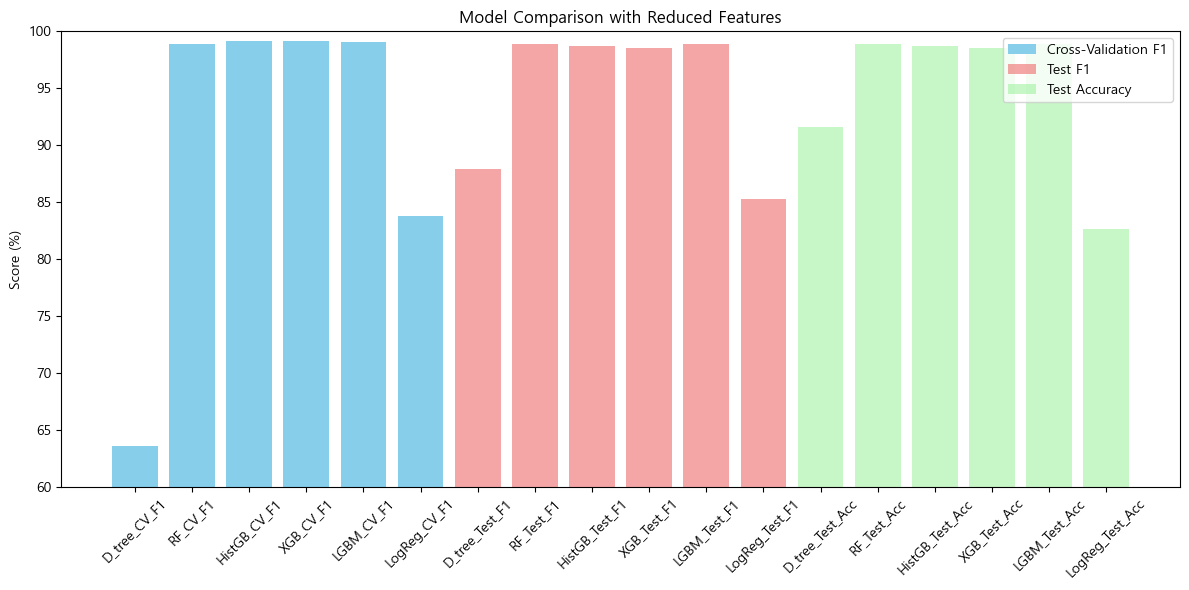

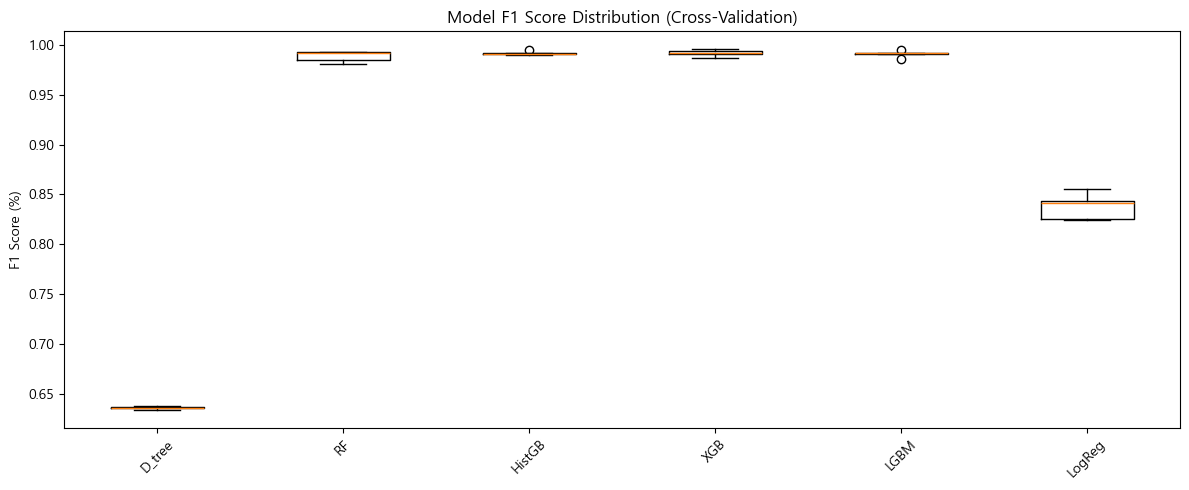

In [182]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# ÏûÖÎ†• ÌîºÏ≤ò Î∞è ÌÉÄÍ≤ü ÏÑ§Ï†ï
HE_obe_input_features= [ 'HE_wc', 'HE_wt', 'HE_sbp1', 'HE_ht', 'HE_dbp1',  'HE_glu', 'HE_alt', 'HE_crea', 'HE_TG', 'HE_HDL_st2', "HE_BMI", 'age', 'sex']

# XÏôÄ y Ï†ïÏùò
X = data[HE_obe_input_features]
y = data['HE_obe'].astype(int) - 1

# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SMOTEÎ°ú Ïò§Î≤ÑÏÉòÌîåÎßÅ
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Î∂ÑÎ•òÍ∏∞ Ï†ïÏùò
classifiers = [
    ('D_tree', DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=0, class_weight='balanced')),
    ('RF', RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0, class_weight='balanced')),
    ('HistGB', HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=0)),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)),
    ('LGBM', LGBMClassifier(random_state=0, class_weight='balanced')),
    ('LogReg', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=0))
]

classifier_names = [name for name, _ in classifiers]
classifiers = [clf for _, clf in classifiers]

# Í≤∞Í≥º Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏
modelaccuracies = []
modelmeans = []
modelnames = []
modeltest_f1 = []
modeltest_acc = []

# Î™®Îç∏ ÌõàÎ†® Î∞è ÌèâÍ∞Ä
for classifier_name, classifier in zip(classifier_names, classifiers):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = cross_val_score(classifier, X_train, y_train, cv=skf, scoring='f1_weighted')
    print(f"\n‚ñ∂ Mean F1 score (CV) of {classifier_name}: {accuracies.mean()*100:.2f}%")
    modelaccuracies.append(accuracies)
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100)

    classifier.fit(X_train_smote, y_train_smote)
    y_pred = classifier.predict(X_test)
    test_f1 = f1_score(y_test, y_pred, average='weighted')
    test_acc = accuracy_score(y_test, y_pred)
    modeltest_f1.append(test_f1*100)
    modeltest_acc.append(test_acc*100)
    print(f"‚ñ∂ Test F1 score of {classifier_name}: {test_f1*100:.2f}%")
    print(f"‚ñ∂ Test Accuracy of {classifier_name}: {test_acc*100:.2f}%")

# ÏÑ±Îä• ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
plt.ylim([60, 100])
plt.bar([name + "_CV_F1" for name in modelnames], modelmeans, color='skyblue', label='Cross-Validation F1')
plt.bar([name + "_Test_F1" for name in modelnames], modeltest_f1, color='lightcoral', label='Test F1', alpha=0.7)
plt.bar([name + "_Test_Acc" for name in modelnames], modeltest_acc, color='lightgreen', label='Test Accuracy', alpha=0.5)
plt.xticks(rotation=45)
plt.ylabel('Score (%)')
plt.title('Model Comparison with Reduced Features')
plt.legend()
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames, rotation=45)
ax.set_ylabel('F1 Score (%)')
ax.set_title('Model F1 Score Distribution (Cross-Validation)')
plt.tight_layout()
plt.show()


                     precision    recall  f1-score   support

      Class 0 (Low)       0.90      0.99      0.94        90
   Class 1 (Normal)       0.98      0.97      0.97       797
Class 2 (Pre-obese)       0.93      0.94      0.94       480
   Class 2 (Obese1)       0.97      0.94      0.95       624
   Class 3 (Obese2)       0.83      0.92      0.87       115
   Class 4 (Obese3)       0.92      0.95      0.93        60

           accuracy                           0.95      2166
          macro avg       0.92      0.95      0.94      2166
       weighted avg       0.95      0.95      0.95      2166



<Figure size 600x600 with 0 Axes>

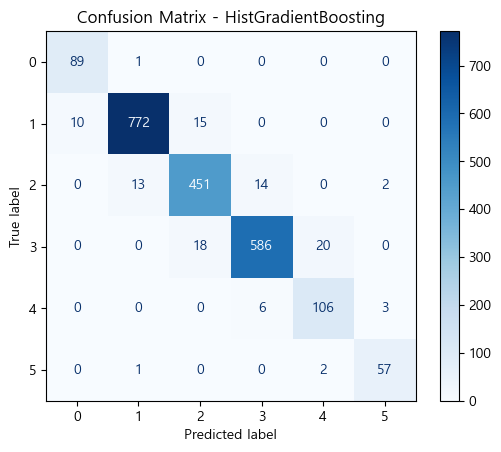

In [177]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
import shap
import matplotlib.pyplot as plt

# ÏûÖÎ†• ÌîºÏ≤ò Î∞è ÌÉÄÍ≤ü ÏÑ§Ï†ï
HE_obe_input_features= ['HE_wc', 'HE_wt', 'HE_sbp1', 'HE_ht', 'HE_dbp1',  'HE_glu', 'HE_alt', 'HE_crea', 'HE_TG', 'HE_HDL_st2', 'age', 'sex']

# XÏôÄ y Ï†ïÏùò
X = data[HE_obe_input_features]
y = data['HE_obe'].astype(int) - 1

# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Î∂ÑÌï† Î®ºÏ†Ä ÏàòÌñâ
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏóêÎßå fit_transform
X_test_scaled = scaler.transform(X_test)  # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏóêÎäî transformÎßå Ï†ÅÏö©

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
# SMOTEÎ•º Ïä§ÏºÄÏùºÎßÅÎêú ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÏö©
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


from sklearn.metrics import classification_report

# HistGradientBoostingClassifierÎ°ú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
best_model = HistGradientBoostingClassifier(learning_rate=0.1, max_iter=100, random_state=42)
best_model.fit(X_train_smote, y_train_smote)
y_pred = best_model.predict(X_test_scaled)

# ÌÅ¥ÎûòÏä§Î≥Ñ F1 Ïä§ÏΩîÏñ¥ Ï∂úÎ†•
print(classification_report(y_test, y_pred, target_names=['Class 0 (Low)', 'Class 1 (Normal)', 'Class 2 (Pre-obese)', 'Class 2 (Obese1)', 'Class 3 (Obese2)', 'Class 4 (Obese3)']))
'Low', 'Normal', 'Pre-obese', 'Obese1', 'Obese2', 'Obese3'
# ÌèâÍ∞Ä ÏßÄÌëú Î∞è ÌòºÎèôÌñâÎ†¨
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(class_report).transpose()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - HistGradientBoosting")
plt.show()